# 1. Imports, Data Loading, and Dataset Creation

In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
reviews = LoadReviews()

utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


review_id                 user_id             business_id  \
2    saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
14   UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
75   ymhbOMW63B_vGaRFR3XT0A  yZdAhQ_KmKuCZmbBy9YDQg  5Ce3lZksYVkCbrihqylVHQ   
93   onlgwy5qGDEzddsrnIvtWg  pYXeL0RCqus2IfhthYCOyA  W7NxQw8UYFR0HLPrI08tvw   
147  ypFqmURIY41F4pWaMW1VrQ  hToW2eoTAYlOcuNz7I73Cg  7L1kXfwU5XM6f6Jxo_L7Yg   

     stars  useful  funny  cool  \
2        3       0      0     0   
14       4       0      2     0   
75       5       0      0     0   
93       4       0      0     0   
147      5       1      0     0   

                                                  text                date  
2    Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
14   The bun makes the Sonoran Dog. It's like a snu... 2011-10-27 17:12:05  
75   I just started going to Sushi Nara this month ... 2014-07-25 17:56:26  
93   Don't know what it is but If my tummy's feelin... 2012-02-01 14:21:25  
147  We've been coming here since I was a kid. The ... 2015-07-03 22:36:04

In [ ]:
reviews = reviews.sample(n = 50000, random_state = 42)
display(reviews)

review_id                 user_id  \
3072330  0MFy30StA0Ns8ILccsowyA  S-cMvM-TbIg1oYMLPneoBg   
3716689  LWER5lk9yGVoKr36yYxKsQ  RIXIoCTafjr1auUJkV3fLg   
6289074  pIdyWcCclKeplPN8D4Ft2A  a2DGFEIov1L7X9rKdVmN6A   
3245132  hWhJGNQEZRXWiBDp2XR2sw  DT0Elf41cptTnuz16auxKQ   
442448   fOKCRjS5DMGj4uCKvkcNUA  7F7Z-PCZjfxie15f9vl8ww   
...                         ...                     ...   
6573320  K_7mBVWW7WpvrRIoehN2tg  1h-qSEwbpis0msbeIv15hQ   
1273507  soYb-5uBROQ9l3xSl5sTFw  EAHCCgMFoJxlOPcCPQ91SQ   
2026866  C-cz-XICTQxE_mcpTCjhdQ  RSHYLY1ypXEBd8pckrZfiA   
1665638  Az6XBFwUXXp5tPOVGbvt2g  Vk8vZOJn2aFgRa-N6bmC6g   
6857335  7EXQcD3gyjoAHlKayy8AYw  EAHCCgMFoJxlOPcCPQ91SQ   

                    business_id  stars  useful  funny  cool  \
3072330  43MDfrU28FYjfpamNfL9GA      4       2      0     0   
3716689  r6Unwg-mxv_3JrEjQ24_TQ      4       0      0     0   
6289074  xuYPogbBSHAtOebONVhprA      5       3      0     3   
3245132  lC0_e8F1zAstzhj-O3eQZg      5       0      0     0   
442448   8QJTzIaR5FceGds8HBSIig      5       0      0     0   
...                         ...    ...     ...    ...   ...   
6573320  tszRCO-RchPXPZlsTCYgbA      1       1      0     0   
1273507  8YM2oTP6LZYQlwB6Hk9lLA      5       2      0     1   
2026866  xNZMbdl8ga_wjBPFMZOsyQ      1       2      0     0   
1665638  3pamD1Qj7MXrF6dglK_guQ      3       0      1     0   
6857335  Ruc9mHL5JkOE6PHWghx2gQ      5       5      0     3   

                                                      text                date  
3072330  Great food and environment. Loved the wine.\n\... 2013-11-30 22:31:33  
3716689  This Costco has very helpful staff and is alwa... 2014-06-06 23:02:11  
6289074  We have been coming here our whole lives and w... 2021-06-23 02:54:36  
3245132  This place is a must when you come Tucson! I'm... 2020-01-23 20:10:01  
442448   We loved our visit at Barrio today. They had a... 2017-09-17 22:39:09  
...                                                    ...                 ...  
6573320  SO disappointing. Took out of town guests afte... 2013-12-02 04:26:34  
1273507  Came on a Wednesday night with friends from th... 2019-12-24 23:33:52  
2026866  Absolutely terrible service, dead bug in my ri... 2019-06-16 07:45:49  
1665638  The atmosphere at Club Congress is awesome, ve... 2008-07-07 22:38:01  
6857335  I seriously cannot say enough good things abou... 2021-07-27 16:11:51  

[50000 rows x 9 columns]

In [3]:
#1 and 2 stars = -1 while 4 and 5 stars = +1
df = reviews.copy()
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

df_num = df.copy()

# Assuming replacing -1 and 1 with negative and positive respectively
df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})

df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df_num['date'] = pd.to_datetime(df_num['date']).dt.strftime('%Y-%m')

# Dividing the reviews to positive and negative
pos = df[df['sentiment']=='positive'][['review_id','business_id','date','sentiment']]
neg = df[df['sentiment']=='negative'][['review_id','business_id','date','sentiment']]

#Preprocessing data
# change the structure of date column
#group by date and review_id to get the number of reviews per month and year
pos_pp = utils.preprocess_sentiment_df(pos)
neg_pp = utils.preprocess_sentiment_df(neg)

#Here we are going to sum the number of positive and negative reviews per month and year
#group by date and review_id to get the number of reviews per month and year
df_num = df_num.groupby(['date'])['sentiment'].sum().reset_index()
df_num['date'] = pd.to_datetime(df_num['date'])
df_num = df_num.sort_values(by='date')
df_num.rename(columns={'sentiment': 'sentiment_count_diff'}, inplace=True)

In [4]:
# change the structure of date column
reviews['date'] = pd.to_datetime(reviews['date']).dt.strftime('%Y-%m')
#group by date and review_id to get the number of reviews per month and year
reviews_per_month = reviews.groupby(['date'])['review_id'].count().reset_index()
reviews_per_month.columns = ['date', 'count']
reviews_per_month['date'] = pd.to_datetime(reviews_per_month['date'])
reviews_per_month = reviews_per_month.sort_values(by='date')
# Extract the year and month from the 'date' column
reviews_per_month['year'] = reviews_per_month['date'].dt.year
reviews_per_month['month'] = reviews_per_month['date'].dt.month

In [5]:
# Extracting the year from the date
count_rev_bus = reviews.groupby(['business_id', 'date'])['review_id'].count().reset_index()
count_rev_bus.columns = ['business_id', 'date', 'count']
count_rev_bus['date'] = pd.to_datetime(count_rev_bus['date'])
count_rev_bus = count_rev_bus.sort_values(by=['date','business_id'])
count_rev_bus['year'] = count_rev_bus['date'].dt.year

In [6]:
pos_pp_reg = utils.PrepareDataRegression(pos_pp, n_lag_features = 36)
neg_pp_reg = utils.PrepareDataRegression(neg_pp, n_lag_features = 36)

# 2. EDA - Exploratory Data Analysis

## 2.1. EDA - Times series analysis using ACF

<Figure size 1200x3000 with 0 Axes>

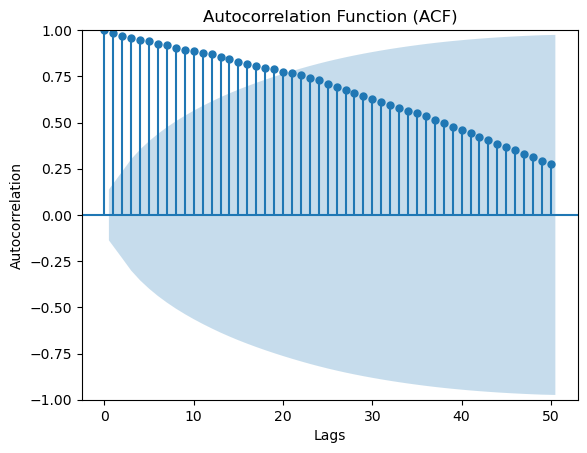

In [7]:
plt.figure(figsize=(12, 30))
plot_acf(pos_pp['review_id'].values.squeeze(), lags=50)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(False)
plt.show()

<Figure size 1200x600 with 0 Axes>

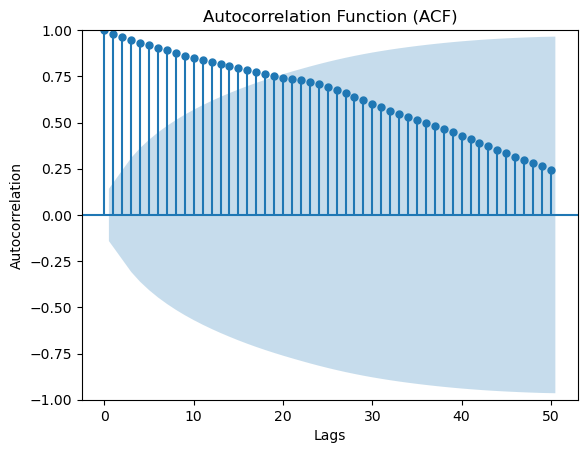

In [8]:
plt.figure(figsize=(12, 6))
plot_acf(neg_pp['review_id'].values.squeeze(), lags=50)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(False)
plt.show()

<Figure size 1200x600 with 0 Axes>

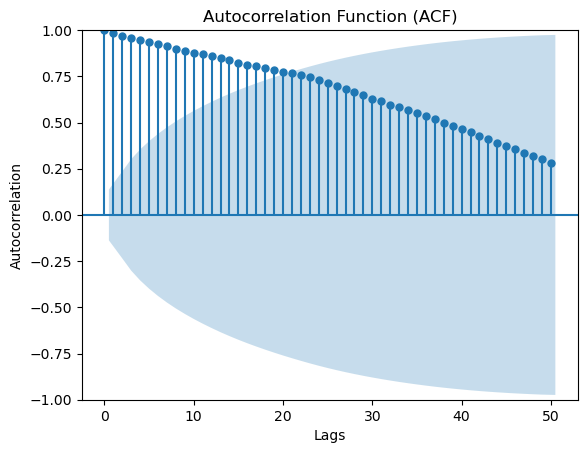

In [9]:
plt.figure(figsize=(12, 6))
plot_acf(reviews_per_month['count'].values.squeeze(), lags=50)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(False)
plt.show()

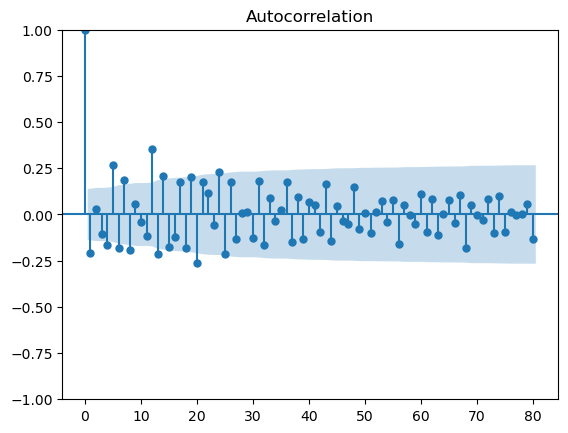

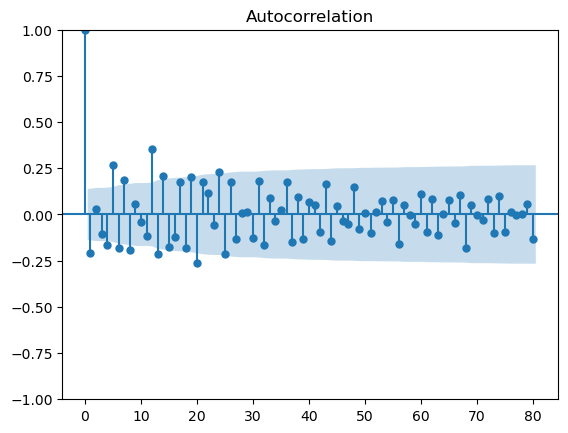

In [7]:
#pos['date'] = pos['date'].apply(lambda x: x.timestamp())
# Assuming your time series is stored in 'ts'
ts_diff = pos_pp['review_id'].diff().dropna()  # Differencing to achieve stationarity

# Plot ACF and PACF
#fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(12, 8))
plot_acf(ts_diff, lags=80)

## 2.2. EDA - Times series for Number of Reviews (regardless of the sentiment)

In [10]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Number of reviews', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

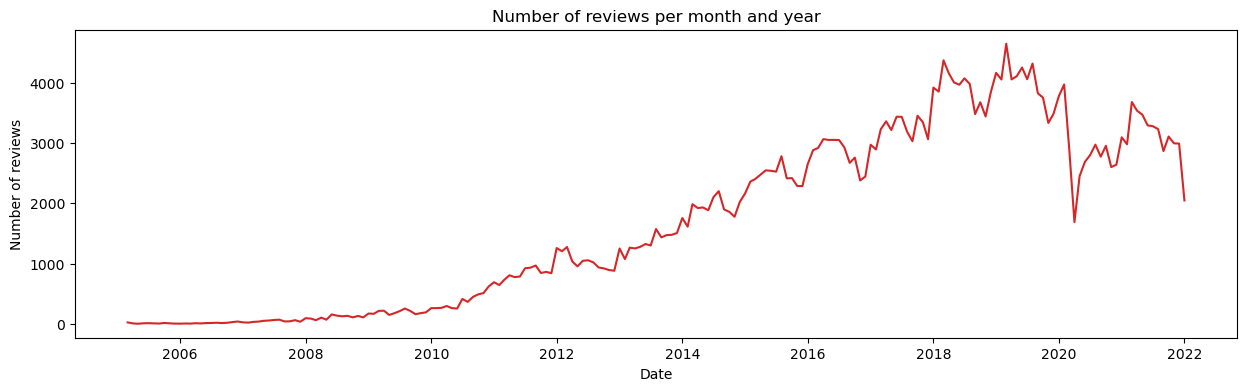

In [11]:
plot_df(x=reviews_per_month['date'], y=reviews_per_month['count'], title='Number of reviews per month and year')

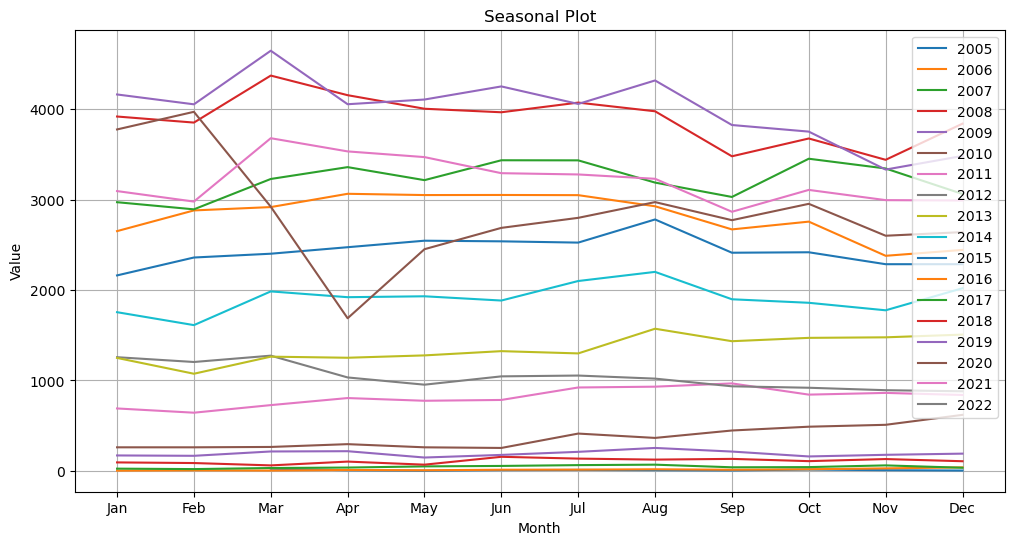

In [12]:
utils.SeasonalPlot(reviews_per_month)

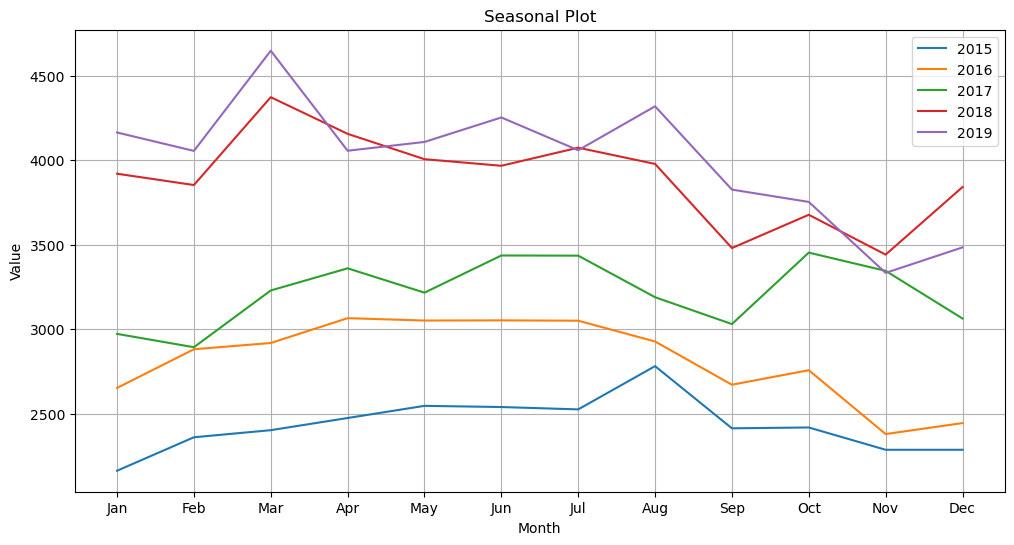

In [13]:
utils.SeasonalPlot(reviews_per_month, [2015, 2016, 2017, 2018, 2019])

### 2.2.1. EDA - Times series for Top 5 businesses in Tucson with the highest ammount of reviews 

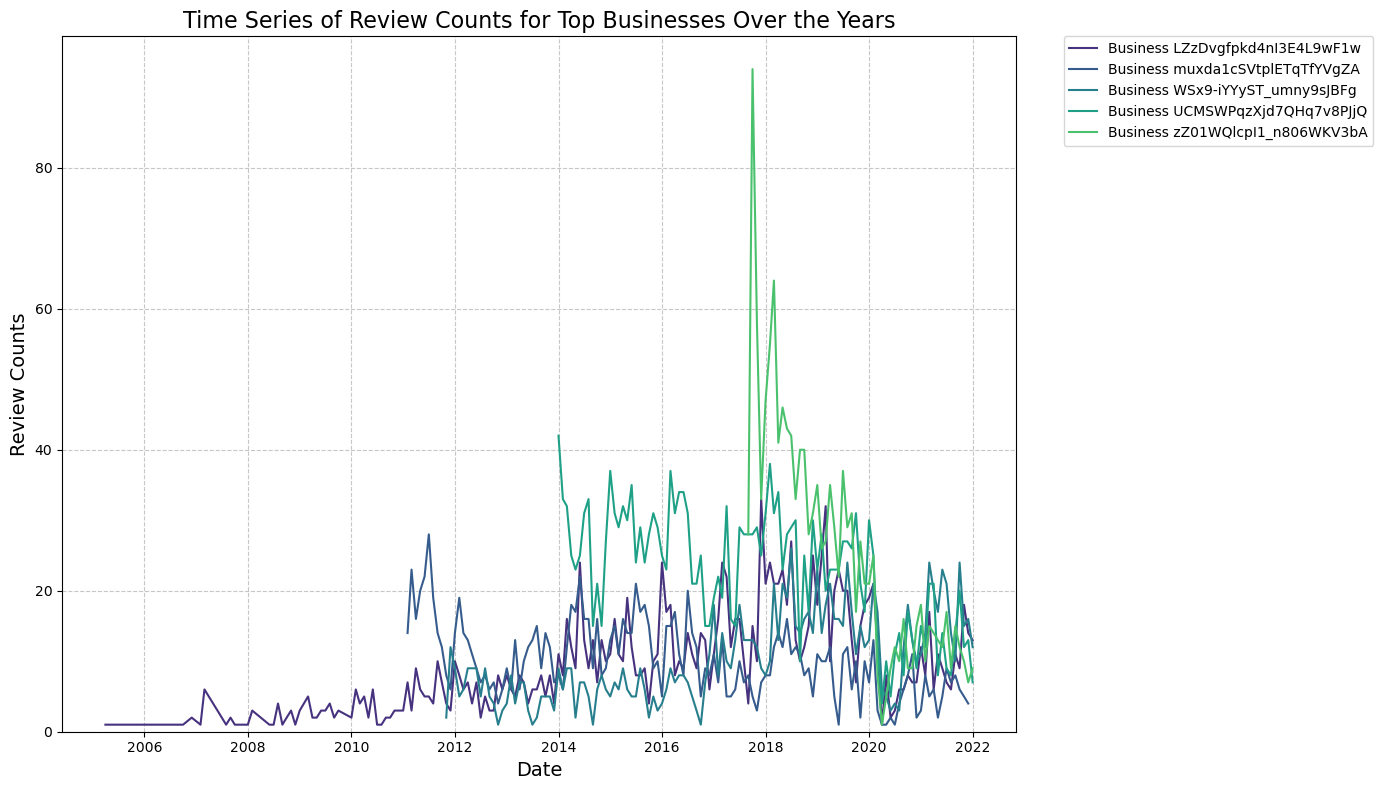

In [14]:
# Assuming you have a list of top businesses called 'top_businesses_list'
top_businesses_series = count_rev_bus.groupby(['business_id'])['count'].sum().sort_values(ascending=False).head(5)
utils.plot_top_businesses_over_time(count_rev_bus, top_businesses_series)

### 2.2.2. EDA - Times series decomposition

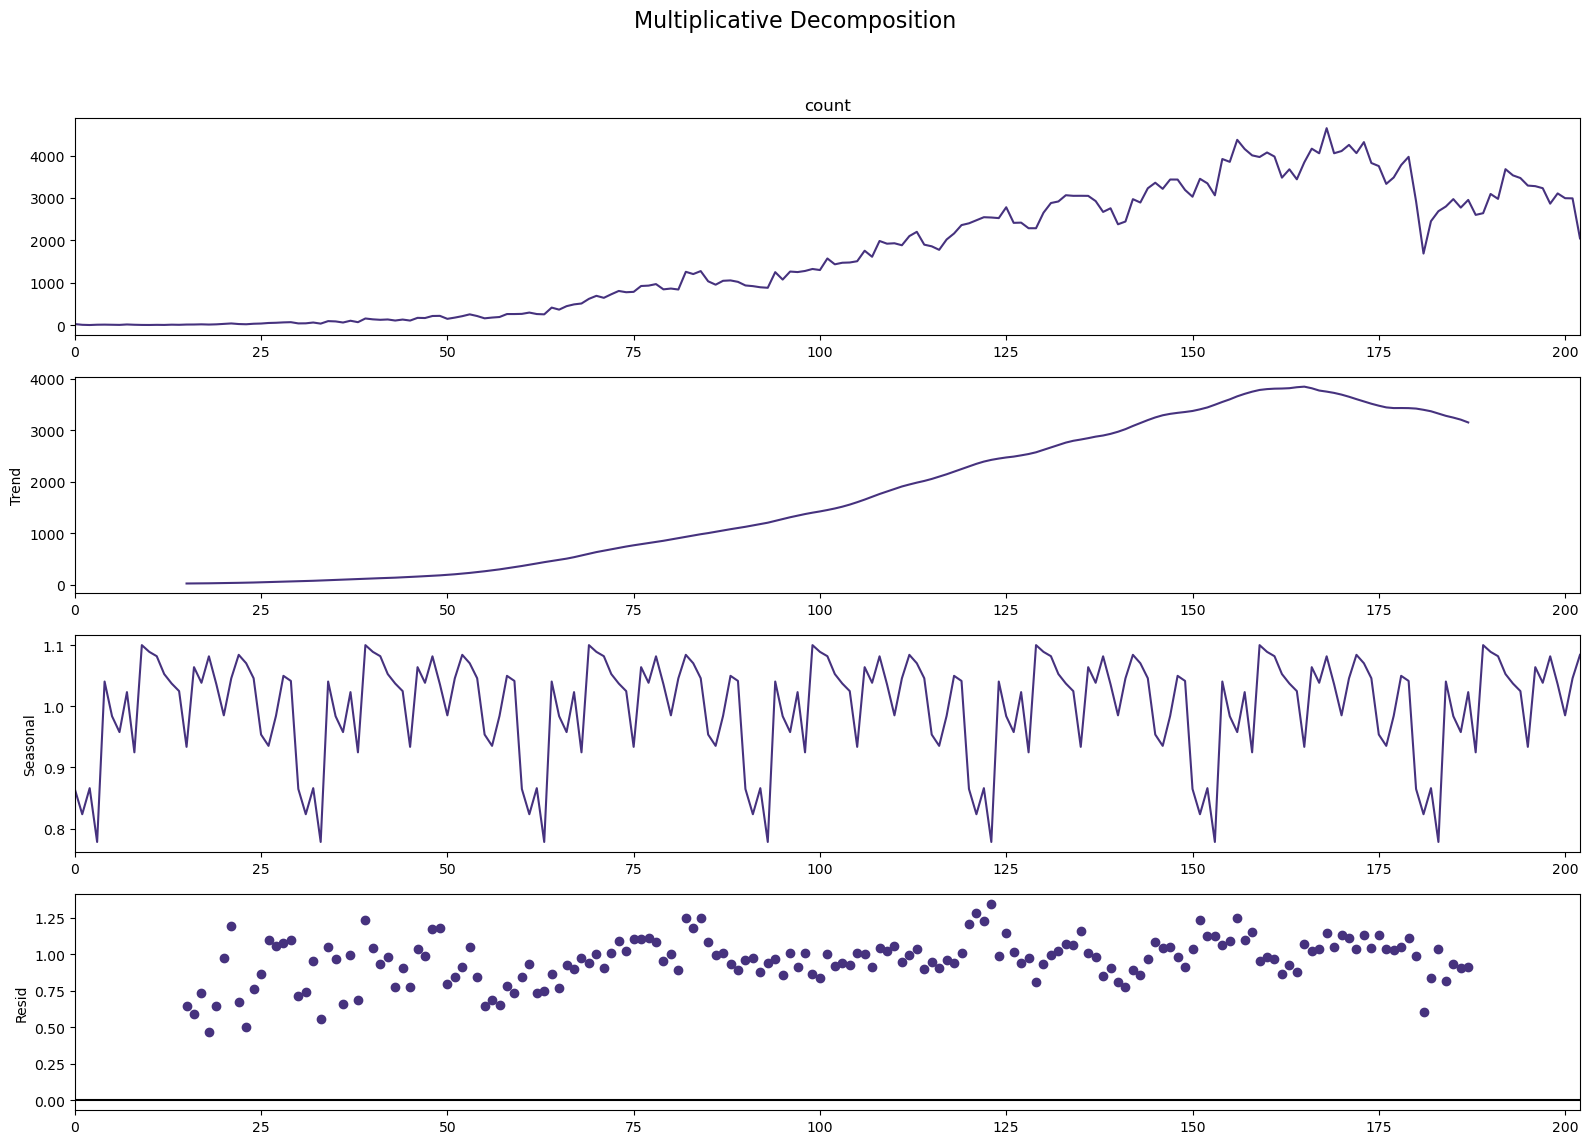

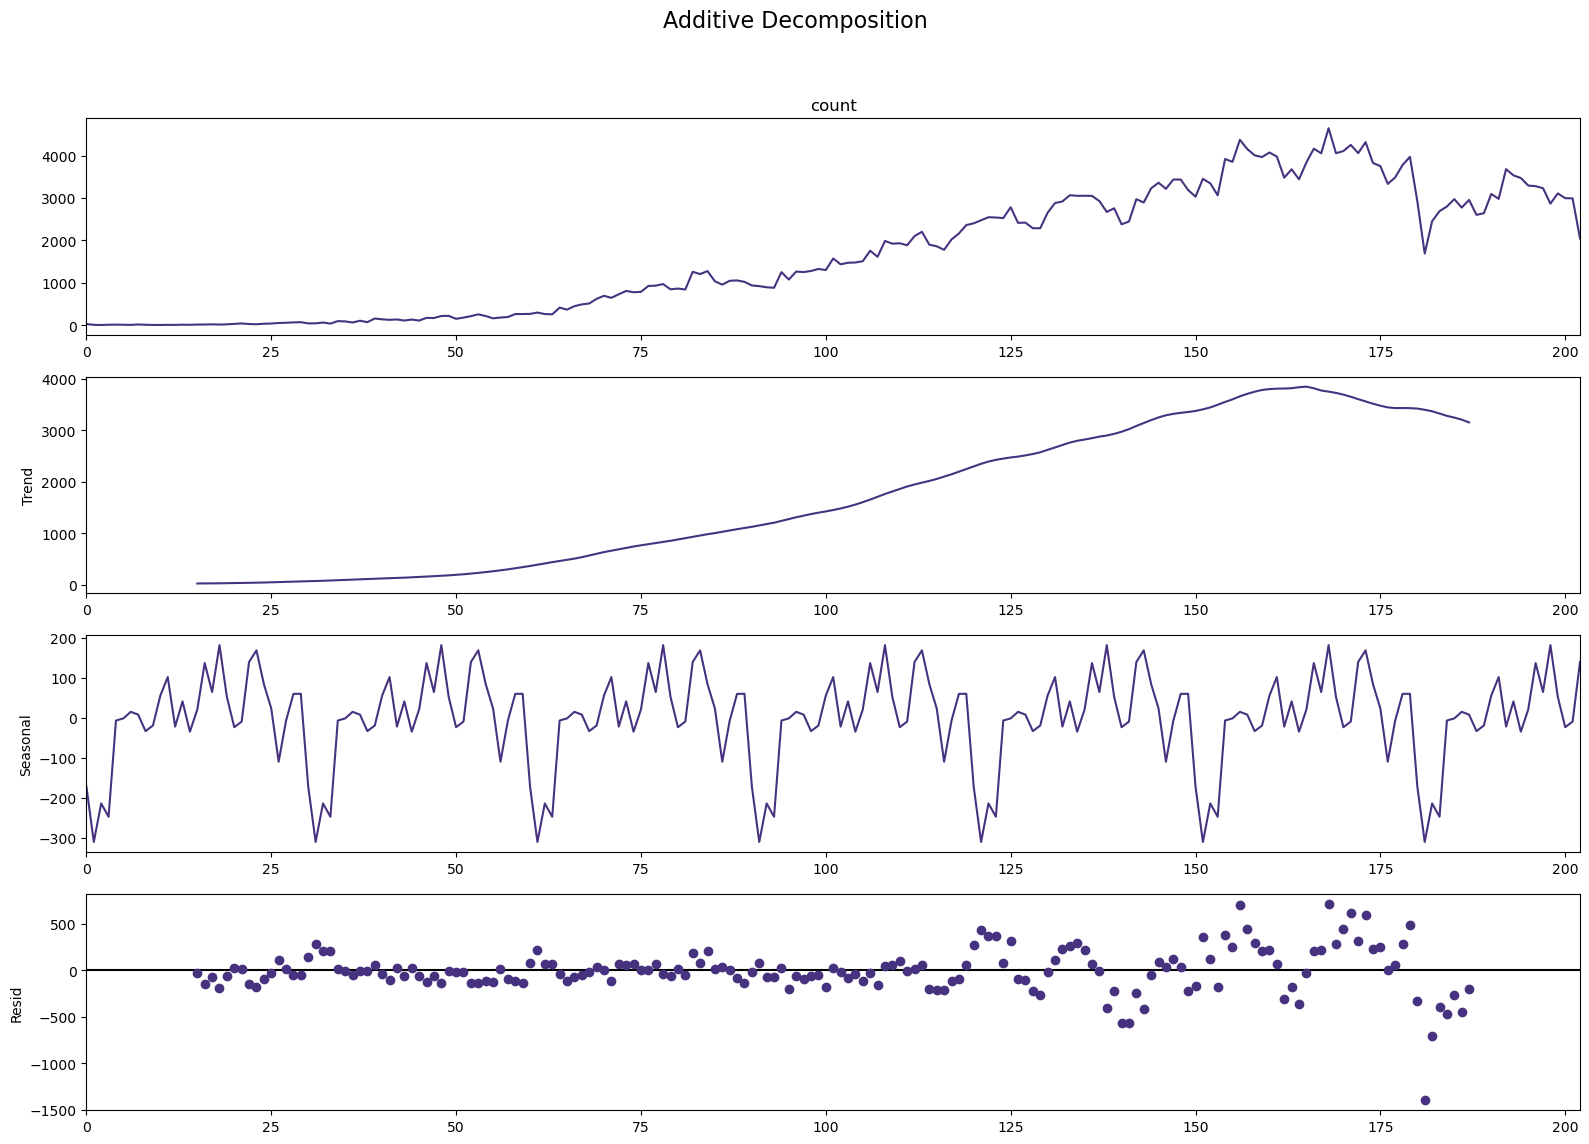

In [15]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(reviews_per_month['count'], model='multiplicative', period=30)
# Additive Decomposition
additive_decomposition = seasonal_decompose(reviews_per_month['count'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## EDA 2.3. - Time series of review counts segregated by sentiments

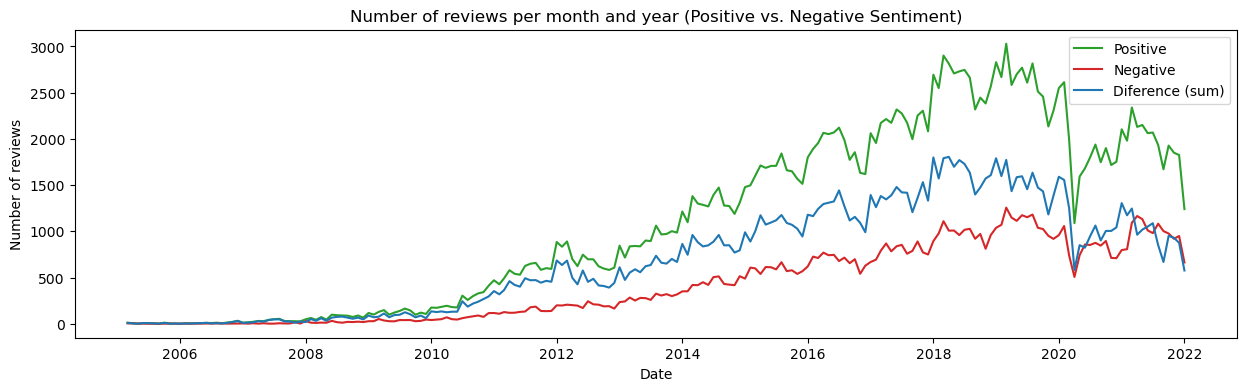

In [16]:
#Visualize the number of reviews per month and year (Positive vs. Negative Sentiment) and the sentiment sum 
utils.plot_df(x_pos=pos_pp['date'], y_pos=pos_pp['review_id'],
              x_neg=neg_pp['date'], y_neg=neg_pp['review_id'],
              x_df_num=df_num['date'], y_df_num=df_num['sentiment_count_diff'],
              title='Number of reviews per month and year (Positive vs. Negative Sentiment)')

### EDA 2.3.1. - Time series decomposition

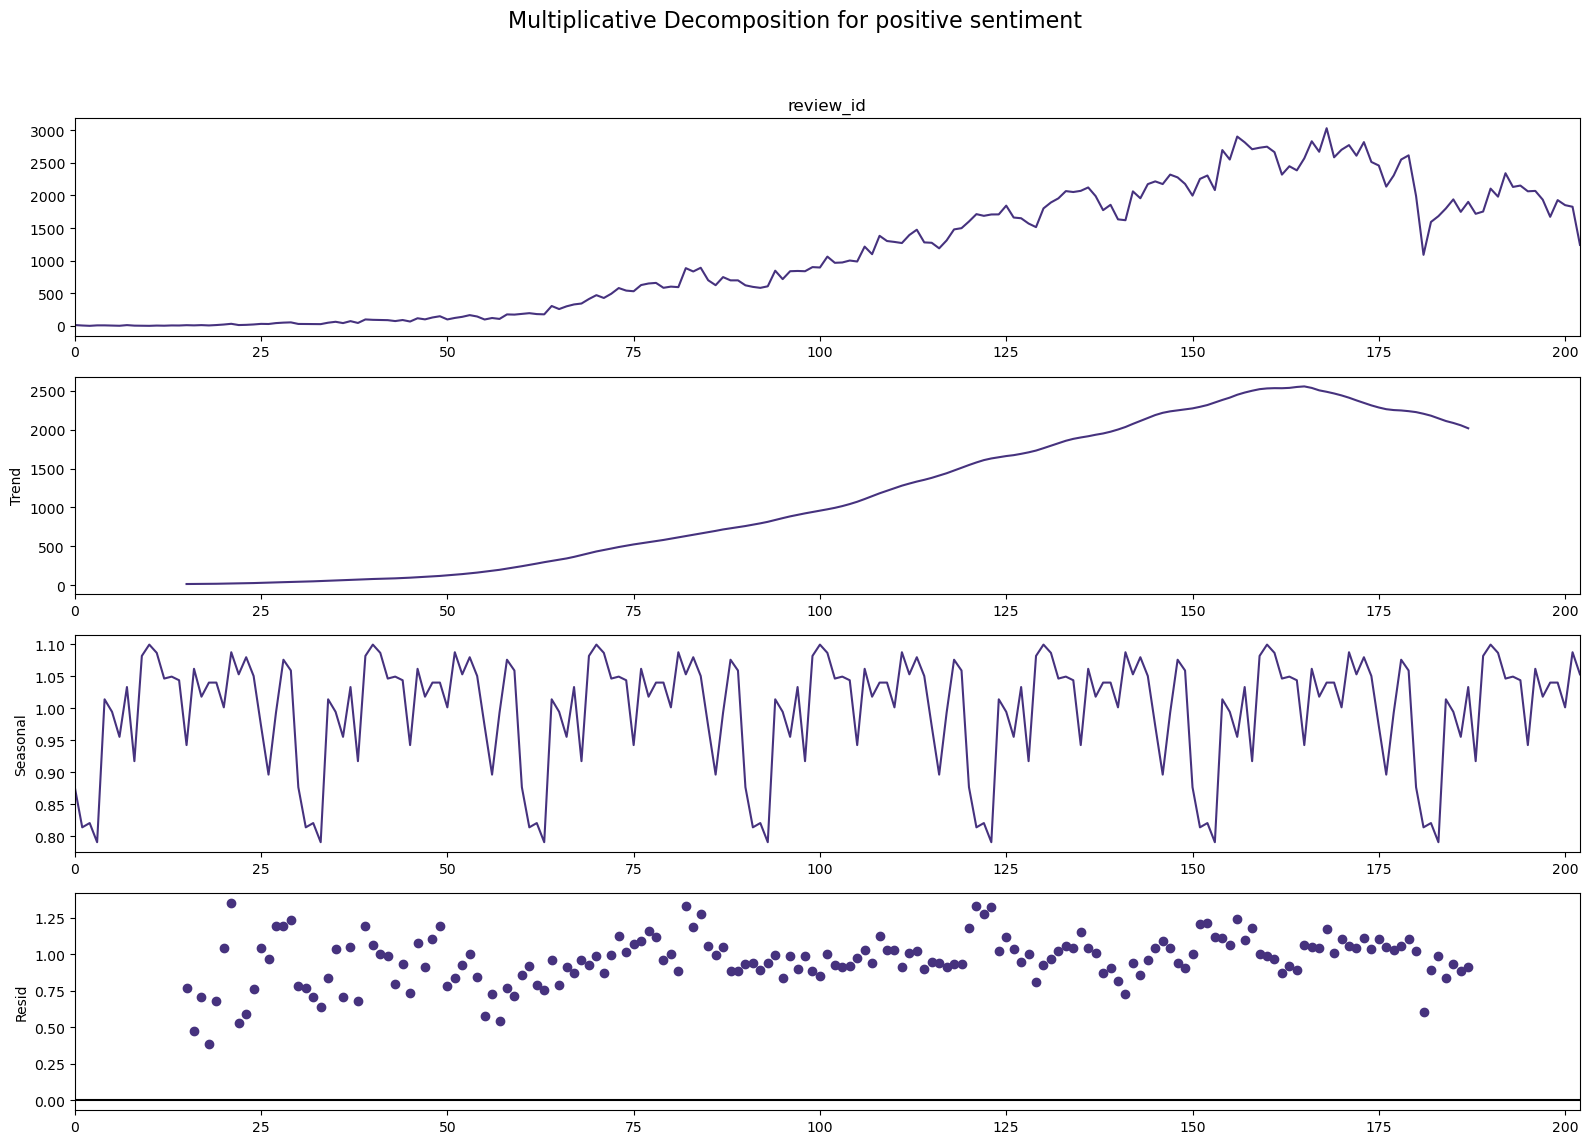

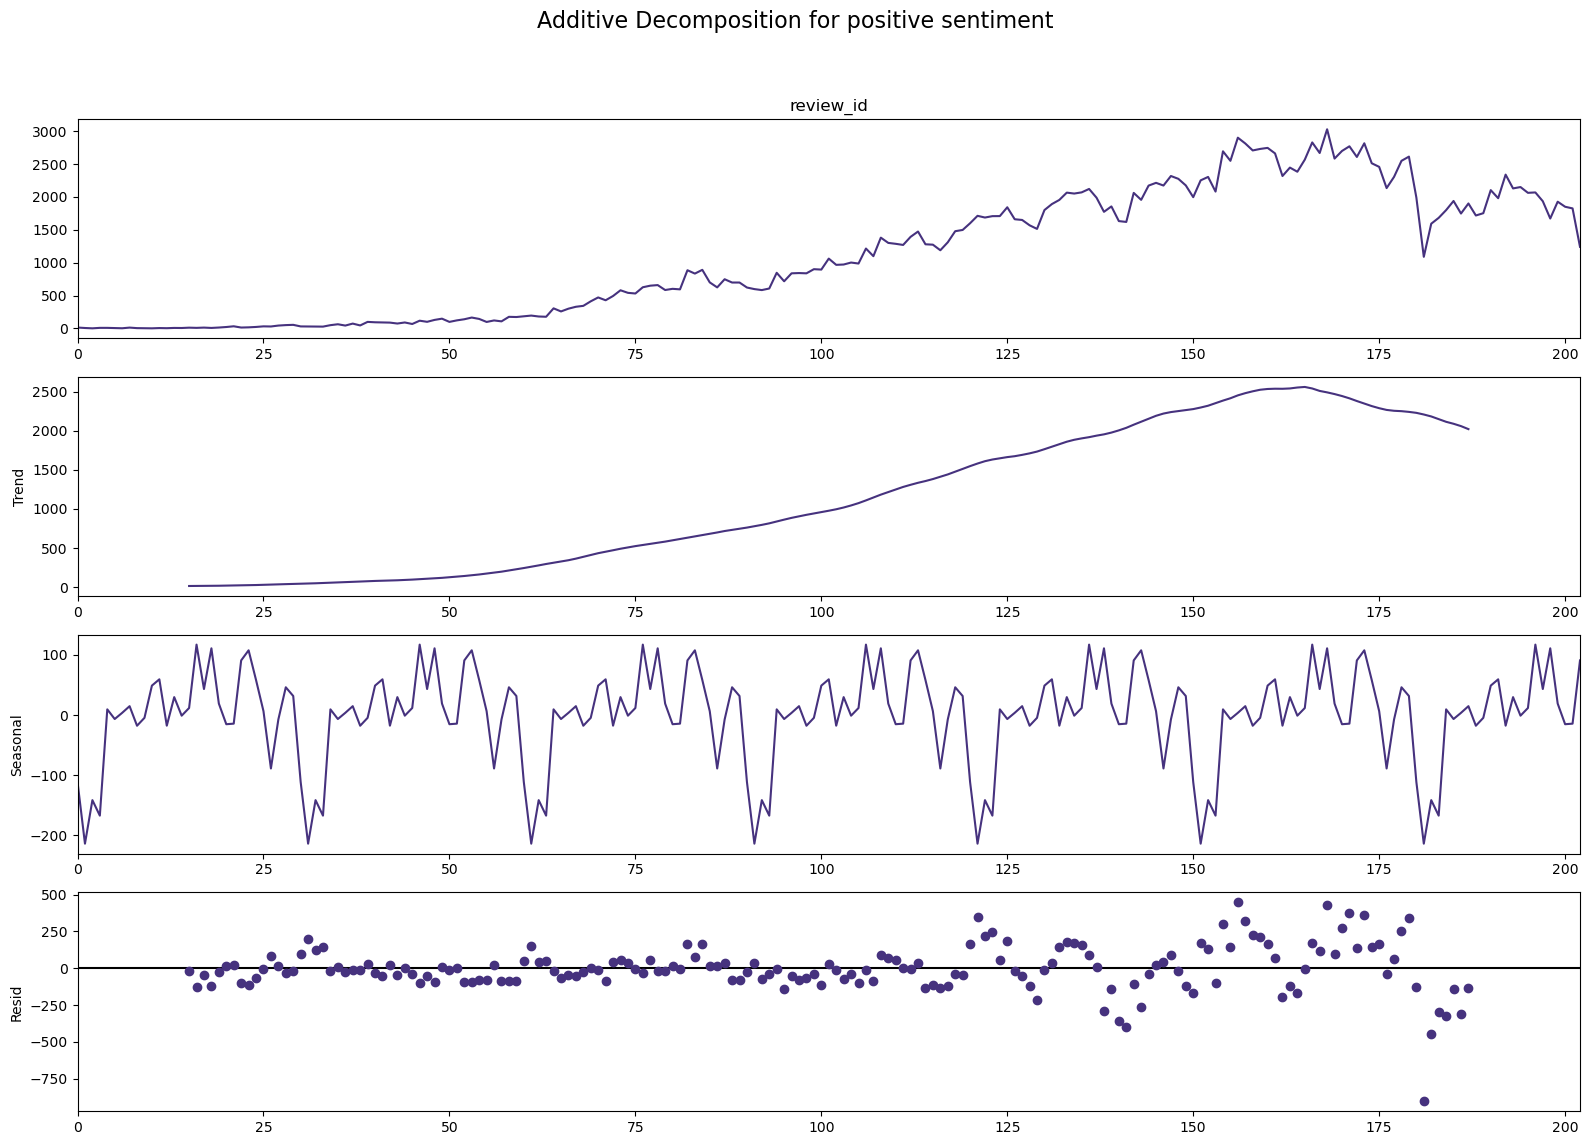

In [17]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(pos_pp['review_id'], model='multiplicative', period=30)
# Additive Decomposition
additive_decomposition = seasonal_decompose(pos_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_decomposition.plot().suptitle('Additive Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

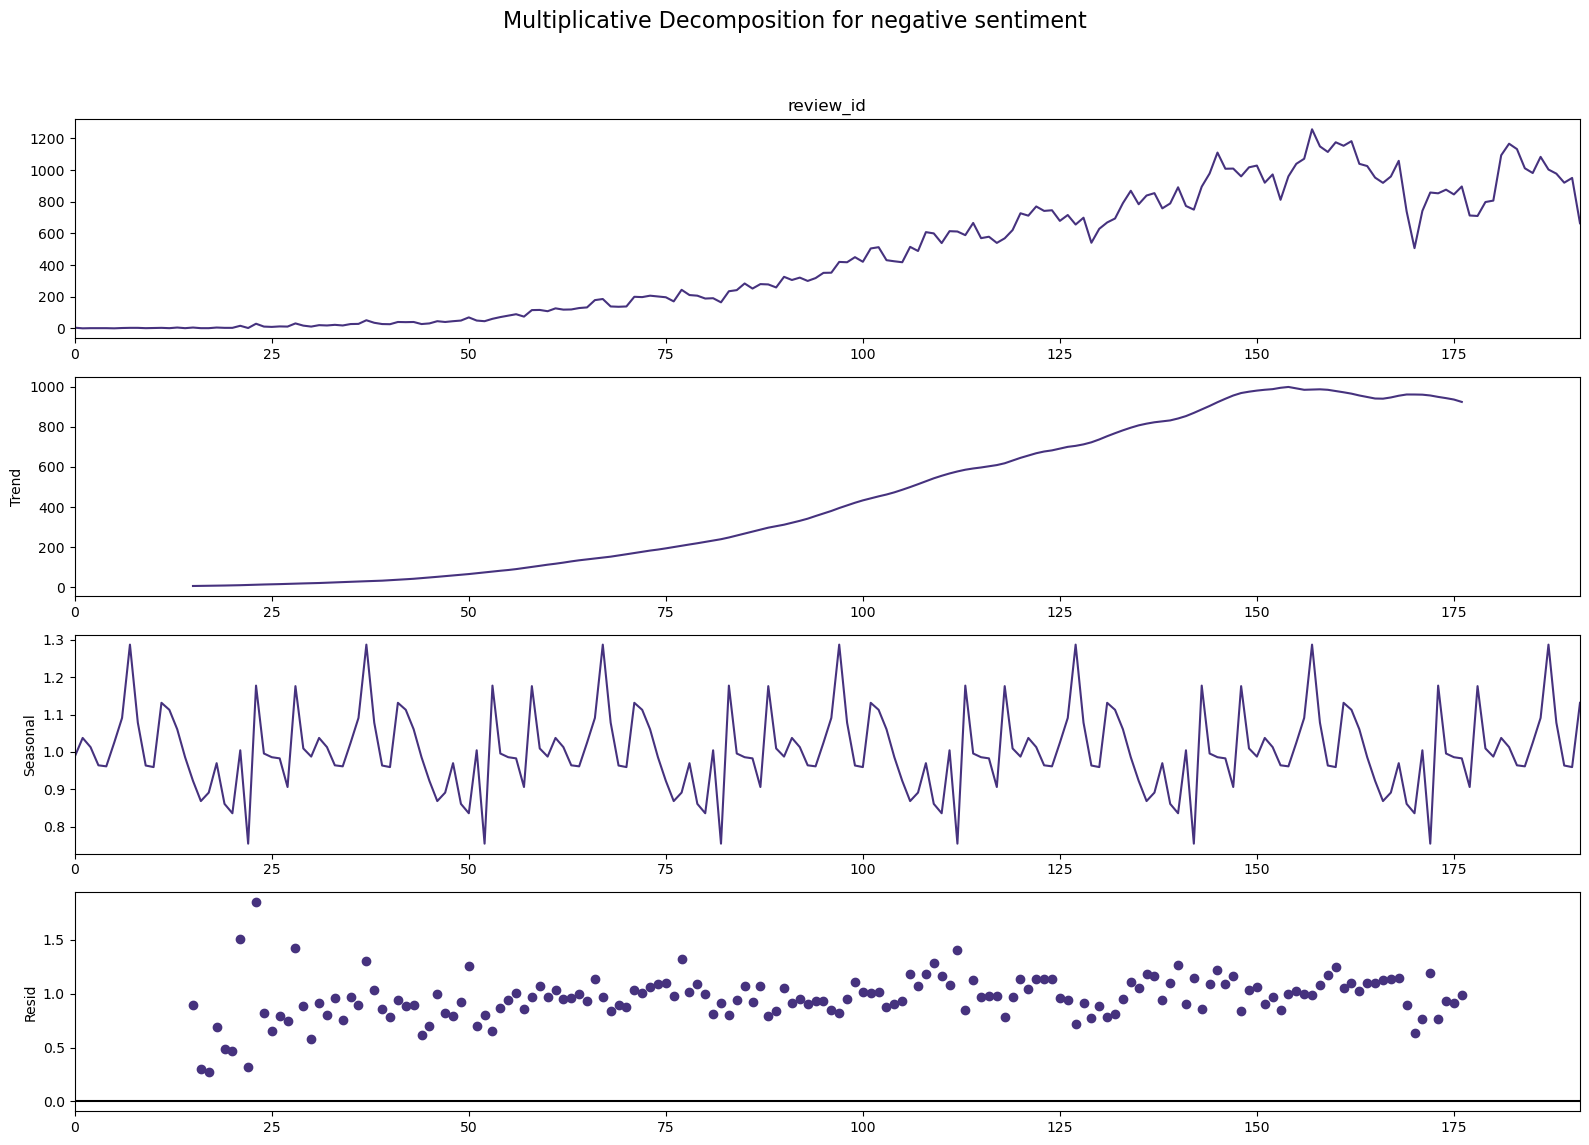

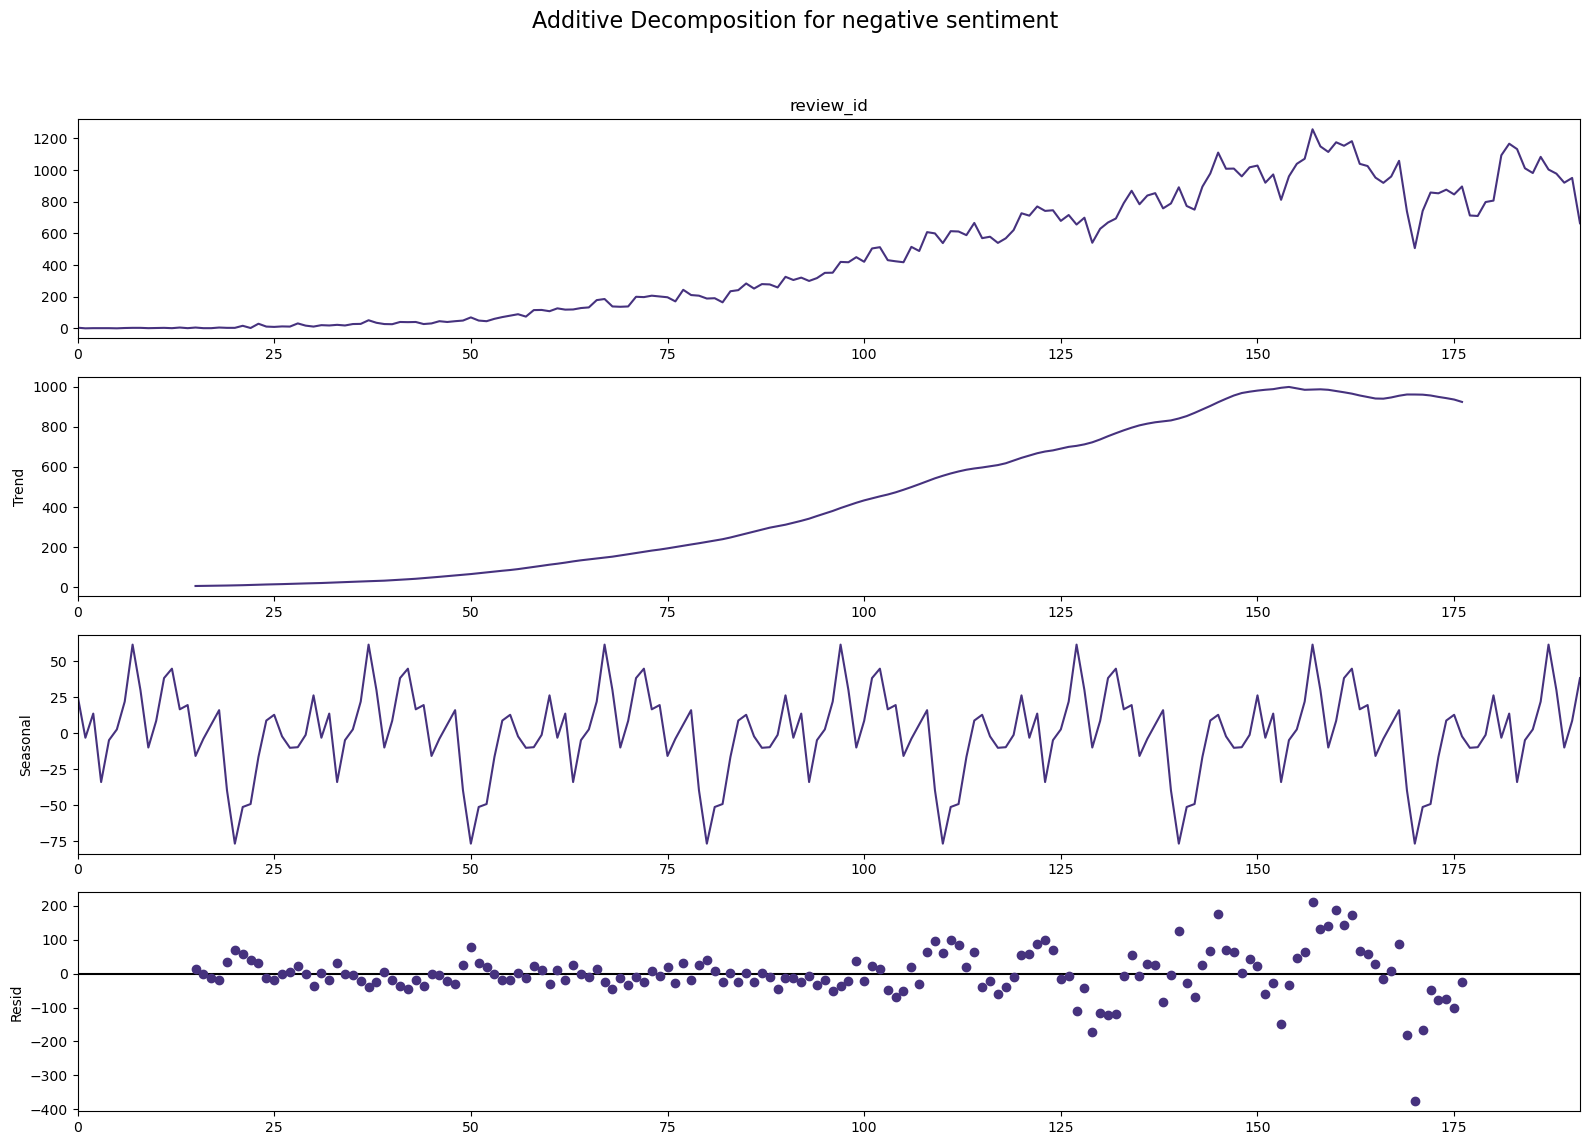

In [18]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(neg_pp['review_id'], model='multiplicative', period=30)
# Additive Decomposition
additive_decomposition = seasonal_decompose(neg_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_decomposition.plot().suptitle('Additive Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

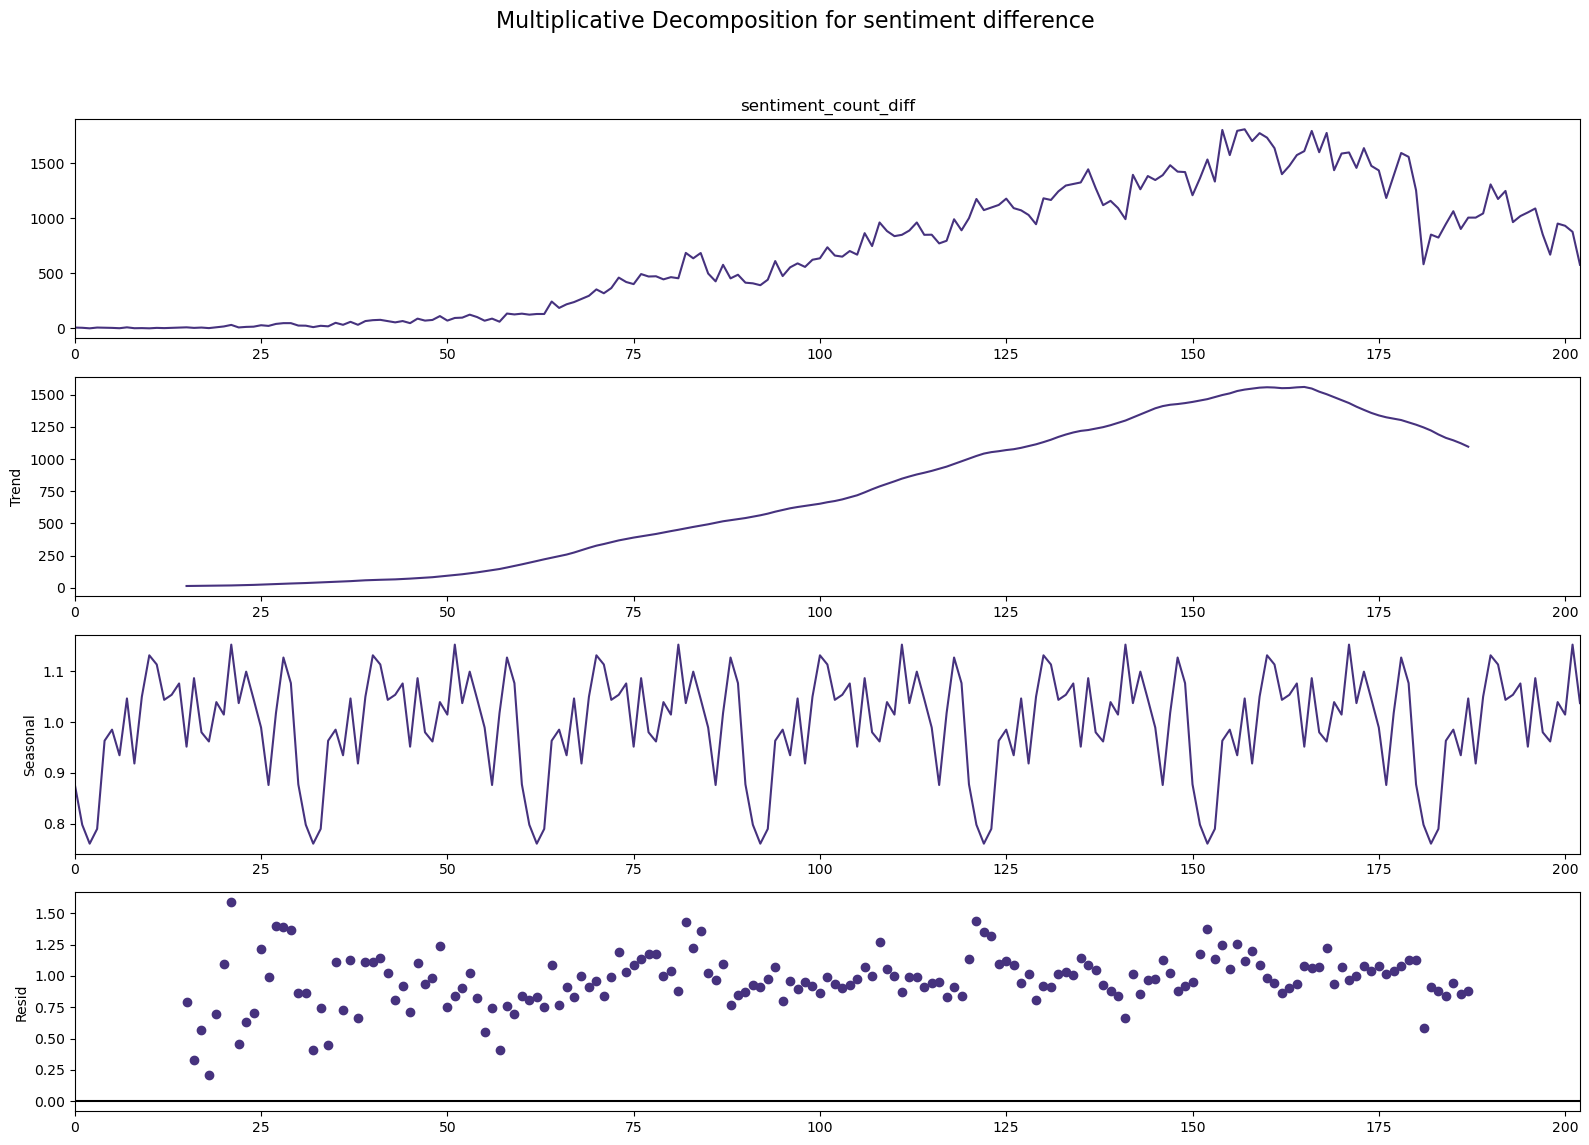

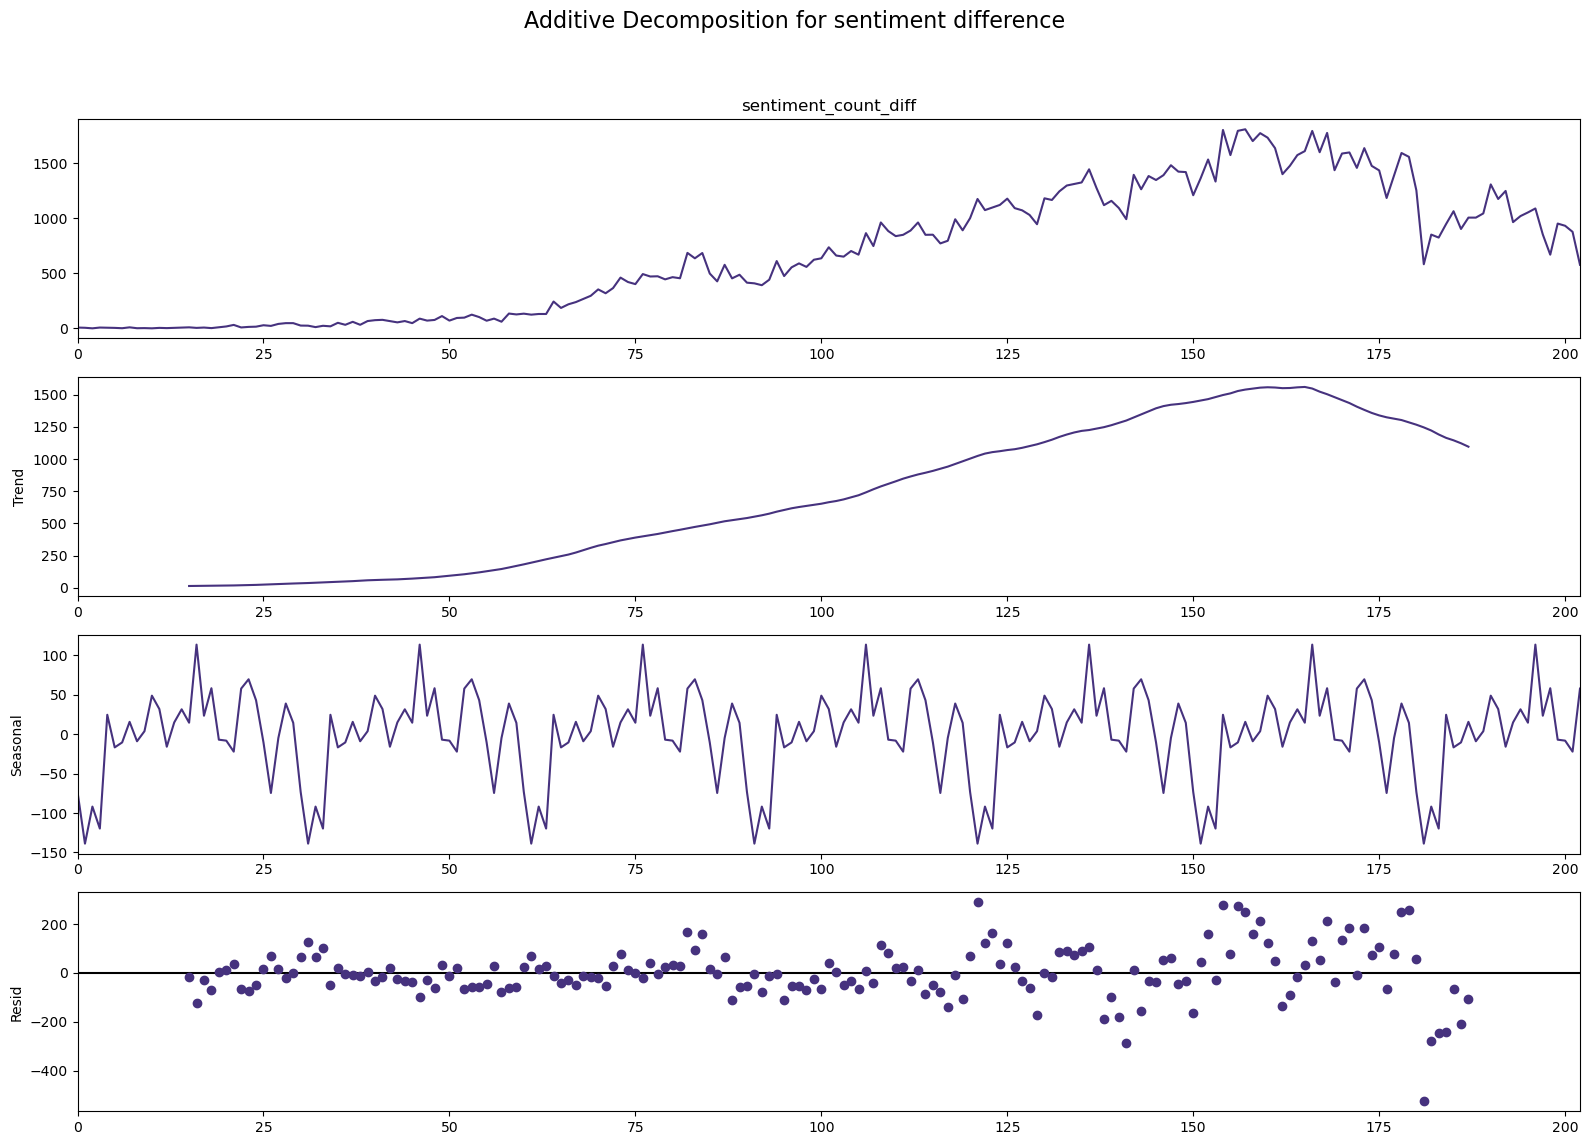

In [19]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='multiplicative', period=30)
# Additive Decomposition
additive_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_decomposition.plot().suptitle('Additive Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. DM - Data Modeling

In [20]:
pos_train = pos_pp[pos_pp['date'] < '2021-01-01']
pos_test = pos_pp[pos_pp['date'] >= '2021-01-01']

neg_train = neg_pp[neg_pp['date'] < '2021-01-01']
neg_test = neg_pp[neg_pp['date'] >= '2021-01-01']

## 3.1. DM - Baseline

### 3.1.1. DM - Baseline - Mean

In [21]:
pos_mean = pos_train['review_id'].mean()
neg_mean = neg_train['review_id'].mean()

### 3.1.2. DM - Baseline - Naive

In [22]:
pos_naive = pos_train['review_id'].values[-1]
neg_naive = neg_train['review_id'].values[-1]

## 3.2. DM - Exponential Smoothing

In [23]:
alpha = 0.5
beta = 0.2
gamma = 0.9

### 3.2.1. DM - Exponential Smoothing - Simple Exponential Smoothing

In [24]:
SimpleExpSmoothing_pos_model, SimpleExpSmoothing_pos_results = utils.ExponentialSmoothingModeling(model_type = 'simple', 
                                                                                    sentiment_data = pos_train, 
                                                                                    alpha = alpha)

In [25]:
SimpleExpSmoothing_neg_model, SimpleExpSmoothing_neg_results = utils.ExponentialSmoothingModeling(model_type = 'simple', 
                                                                                                  sentiment_data = neg_train, 
                                                                                                  alpha = alpha)

### 3.2.2. DM - Exponential Smoothing - Holt Exponential Smoothing

In [26]:
Holt_NotDamped_pos_model, Holt_NotDamped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                            sentiment_data = pos_train,
                                                                            alpha = alpha, 
                                                                            beta = beta,
                                                                            damped = False)

Holt_Damped_pos_model, Holt_Damped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                      sentiment_data = pos_train, 
                                                                      alpha = alpha, 
                                                                      beta = beta,
                                                                      damped = True)

In [27]:
Holt_NotDamped_neg_model, Holt_NotDamped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                          sentiment_data = neg_train,
                                                                                          alpha = alpha, 
                                                                                          beta = beta,
                                                                                          damped = False)

Holt_Damped_neg_model, Holt_Damped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                sentiment_data = neg_train, 
                                                                                alpha = alpha, 
                                                                                beta = beta,
                                                                                damped = True)

### 3.2.3. DM - Exponential Smoothing - Holt-Winters Exponential Smoothing

In [28]:
HoltWinters_Add_NotDamped_pos_model, HoltWinters_Add_NotDamped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                          sentiment_data = pos_train, 
                                                                                          decomposition_type = 'additive',
                                                                                          alpha = alpha, 
                                                                                          beta = beta, 
                                                                                          gamma = gamma,
                                                                                          damped = False)

HoltWinters_Add_Damped_pos_model, HoltWinters_Add_Damped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                    sentiment_data = pos_train, 
                                                                                    alpha = alpha, 
                                                                                    beta = beta, 
                                                                                    gamma = gamma,
                                                                                    decomposition_type = 'additive', 
                                                                                    damped = True)


HoltWinters_Multi_NotDamped_pos_model, HoltWinters_Multi_NotDamped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                          sentiment_data = pos_train, 
                                                                                          decomposition_type = 'multiplicative',
                                                                                          alpha = alpha, 
                                                                                          beta = beta, 
                                                                                          gamma = gamma,
                                                                                          damped = False)

HoltWinters_Multi_Damped_pos_model, HoltWinters_Multi_Damped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                    sentiment_data = pos_train, 
                                                                                    alpha = alpha, 
                                                                                    beta = beta, 
                                                                                    gamma = gamma,
                                                                                    decomposition_type = 'multiplicative', 
                                                                                    damped = True)

In [29]:
HoltWinters_Add_NotDamped_neg_model, HoltWinters_Add_NotDamped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                        sentiment_data = neg_train, 
                                                                                                        decomposition_type = 'additive',
                                                                                                        alpha = alpha, 
                                                                                                        beta = beta, 
                                                                                                        gamma = gamma,
                                                                                                        damped = False)

HoltWinters_Add_Damped_neg_model, HoltWinters_Add_Damped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                  sentiment_data = neg_train, 
                                                                                                  alpha = alpha, 
                                                                                                  beta = beta, 
                                                                                                  gamma = gamma,
                                                                                                  decomposition_type = 'additive', 
                                                                                                  damped = True)


HoltWinters_Multi_NotDamped_neg_model, HoltWinters_Multi_NotDamped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                        sentiment_data = neg_train, 
                                                                                                        decomposition_type = 'multiplicative',
                                                                                                        alpha = alpha, 
                                                                                                        beta = beta, 
                                                                                                        gamma = gamma,
                                                                                                        damped = False)

HoltWinters_Multi_Damped_neg_model, HoltWinters_Multi_Damped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                  sentiment_data = neg_train, 
                                                                                                  alpha = alpha, 
                                                                                                  beta = beta, 
                                                                                                  gamma = gamma,
                                                                                                  decomposition_type = 'multiplicative', 
                                                                                                  damped = True)

## 3.3. DM - ARIMA

In [30]:
# fit model
arima_pos = ARIMA(pos_train['review_id'], order=(5,1,0))  #p,d,q
arima_results_pos = arima_pos.fit()
# summary of fit model
print(arima_results_pos.summary())

                               SARIMAX Results                                
Dep. Variable:              review_id   No. Observations:                  190
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1206.218
Date:                Thu, 05 Oct 2023   AIC                           2424.436
Time:                        13:56:24   BIC                           2443.886
Sample:                             0   HQIC                          2432.316
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1863      0.042     -4.487      0.000      -0.268      -0.105
ar.L2         -0.0429      0.055     -0.775      0.438      -0.151       0.066
ar.L3         -0.1384      0.076     -1.817      0.0

In [31]:
# fit model
arima_neg = ARIMA(neg_train['review_id'], order=(5,1,0))  #p,d,q
arima_results_neg = arima_neg.fit()
# summary of fit model
print(arima_results_neg.summary())

                               SARIMAX Results                                
Dep. Variable:              review_id   No. Observations:                  179
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -986.671
Date:                Thu, 05 Oct 2023   AIC                           1985.342
Time:                        13:56:26   BIC                           2004.433
Sample:                             0   HQIC                          1993.084
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1775      0.040     -4.450      0.000      -0.256      -0.099
ar.L2         -0.1900      0.056     -3.405      0.001      -0.299      -0.081
ar.L3         -0.0959      0.076     -1.255      0.2

## 3.4. DM - Regression

In [32]:
pos_pp_reg_train = pos_pp_reg[pos_pp_reg['date'] < '2021-01-01']
pos_pp_reg_test = pos_pp_reg[pos_pp_reg['date'] >= '2021-01-01']

neg_pp_reg_train = neg_pp_reg[pos_pp_reg['date'] < '2021-01-01']
neg_pp_reg_test = neg_pp_reg[neg_pp_reg['date'] >= '2021-01-01']

X_train_pos, y_train_pos = pos_pp_reg_train.drop(columns=['review_id', 'date']), pos_pp_reg_train['review_id']
X_train_neg, y_train_neg = neg_pp_reg_train.drop(columns=['review_id', 'date']), neg_pp_reg_train['review_id']

scaler_pos = StandardScaler()
scaler_pos.fit(X_train_pos)
X_train_pos = scaler_pos.transform(X_train_pos)

scaler_neg = StandardScaler()
scaler_neg.fit(X_train_neg)
X_train_neg = scaler_neg.transform(X_train_neg)

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_11604/3158071143.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_pp_reg_train = neg_pp_reg[pos_pp_reg['date'] < '2021-01-01']


In [33]:
model_pos = LinearRegression()
LineaRegression_pos = model_pos.fit(X_train_pos, y_train_pos)

model_neg = LinearRegression()
LineaRegression_neg = model_neg.fit(X_train_neg, y_train_neg)

# 4. ME - Model Evaluation

In [34]:
y_true_pos = pos_test['review_id'].values
y_true_neg = neg_test['review_id'].values

## 4.1. ME - Baseline

### 4.1.1. ME - Baseline - Mean

In [35]:
print('Positive Sentiment')
y_hat_pos = utils.EvaluateBaseline(pos_mean, y_true_pos)
print('\nNegative Sentiment')
y_hat_neg = utils.EvaluateBaseline(neg_mean, y_true_neg)

Positive Sentiment
RMSE: 923.38
MAE: 885.88
MAPE: 0.44

Negative Sentiment
RMSE: 575.17
MAE: 558.33
MAPE: 0.57


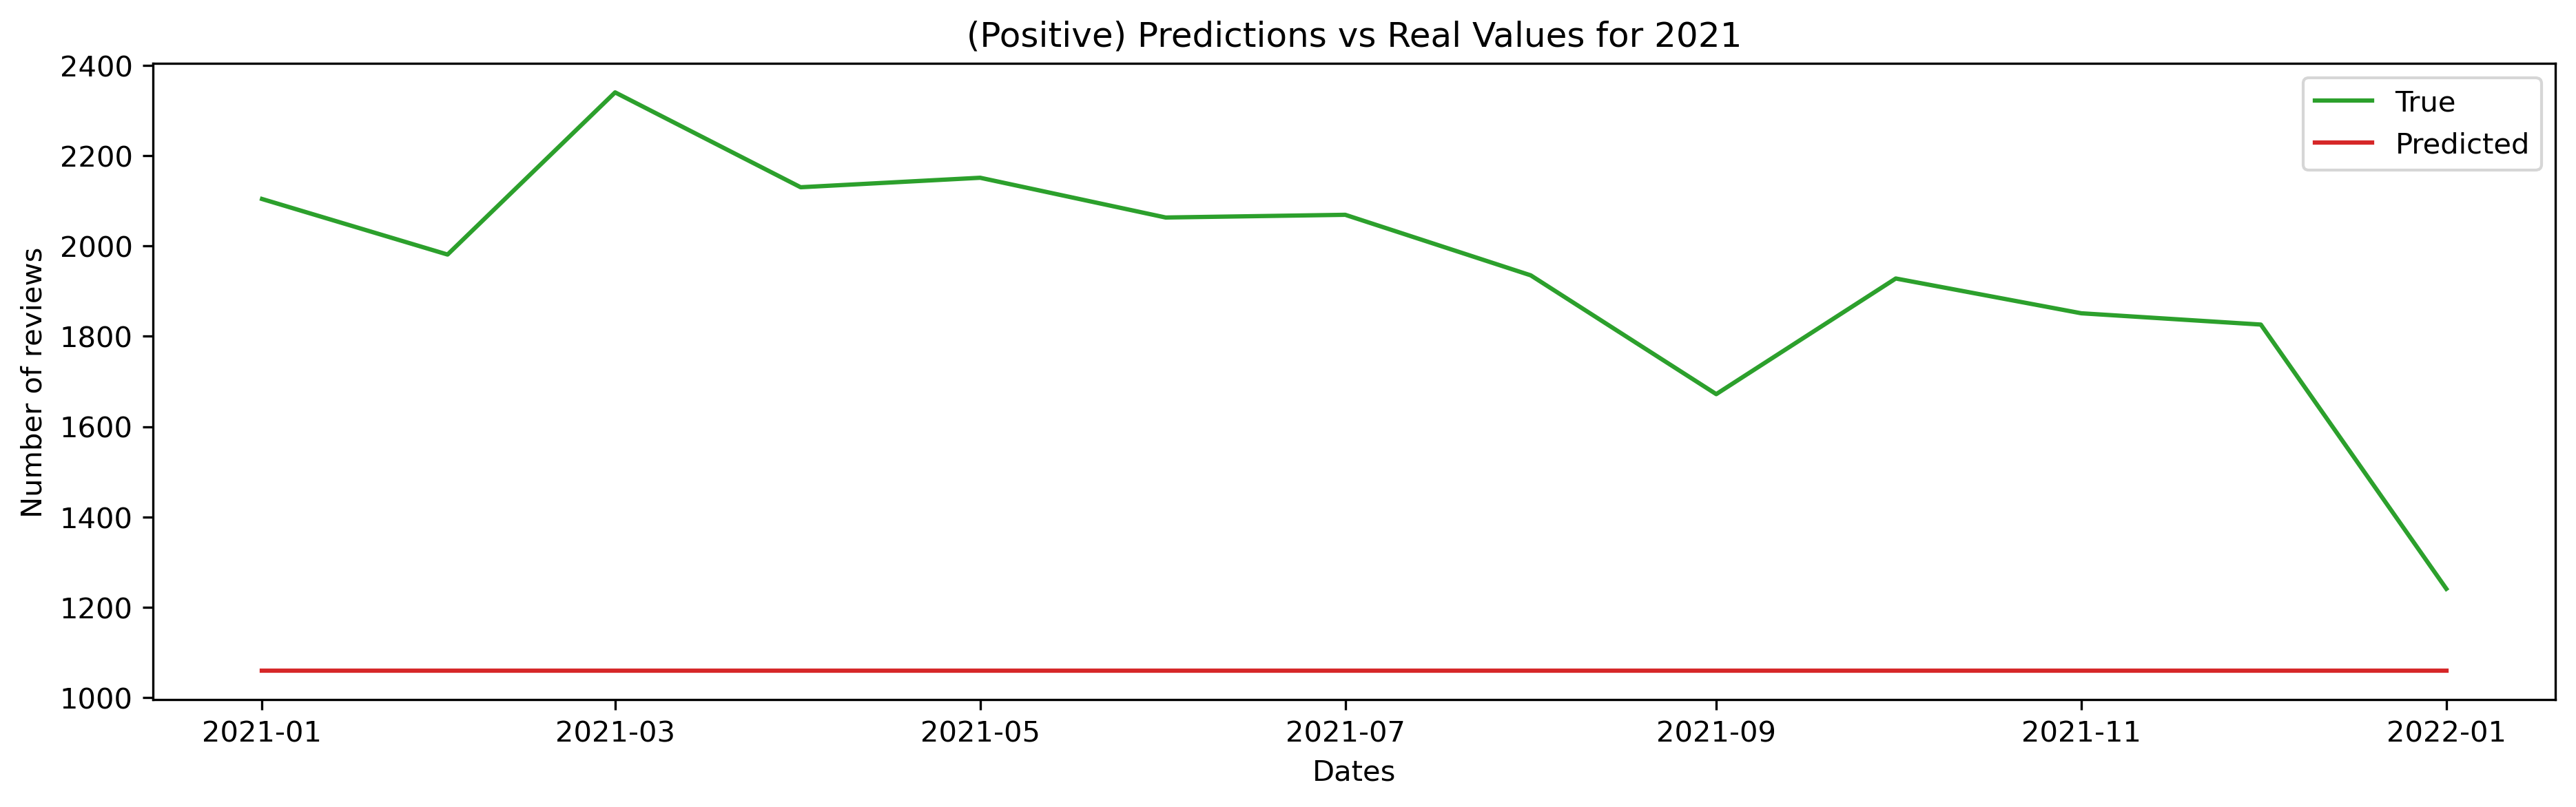

None

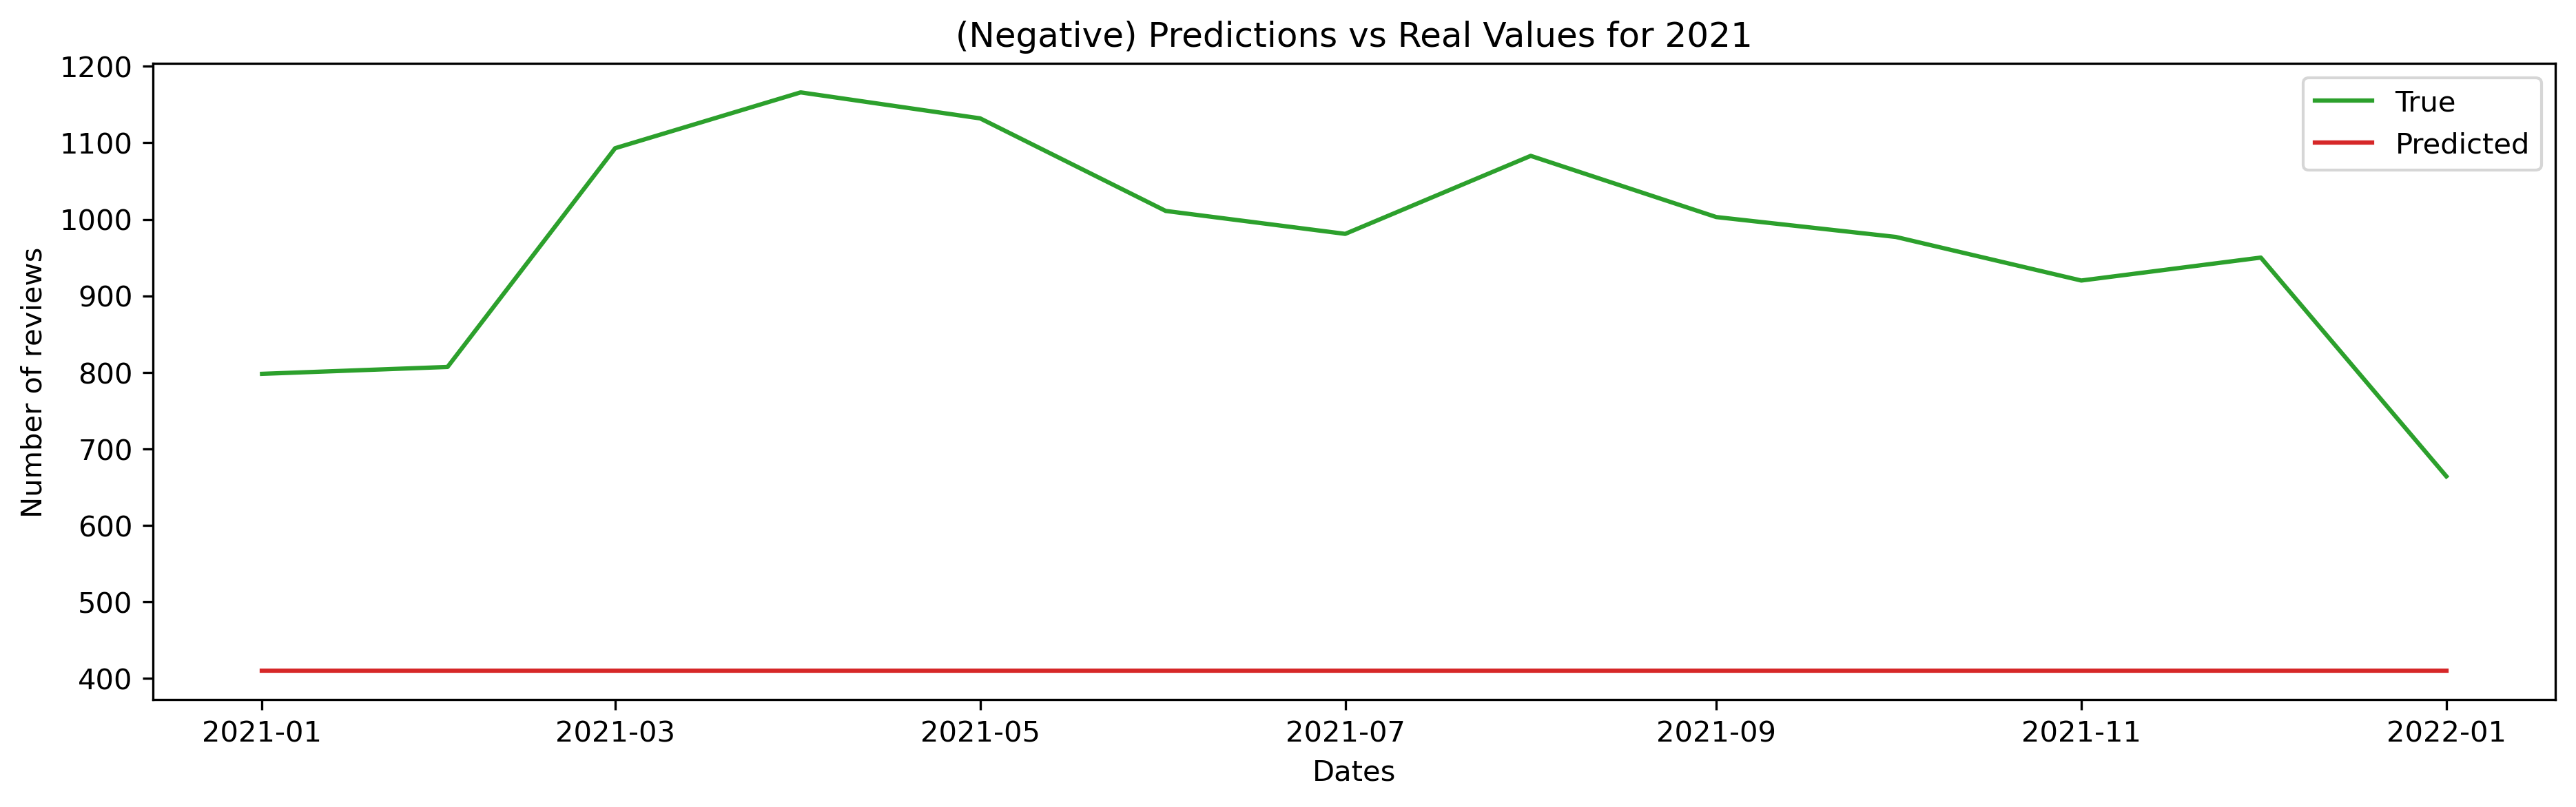

None

In [36]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_pos, title = '(Positive) Predictions vs Real Values for 2021 with Baseline (mean)'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_neg, title = '(Negative) Predictions vs Real Values for 2021 with Baseline (mean)'))

### 4.1.1. ME - Baseline - Naive

In [37]:
print('Positive Sentiment')
y_hat_pos = utils.EvaluateBaseline(pos_naive, y_true_pos)
print('\nNegative Sentiment')
y_hat_neg = utils.EvaluateBaseline(neg_naive, y_true_neg)

Positive Sentiment
RMSE: 323.87
MAE: 283.69
MAPE: 0.15

Negative Sentiment
RMSE: 292.73
MAE: 265.15
MAPE: 0.26


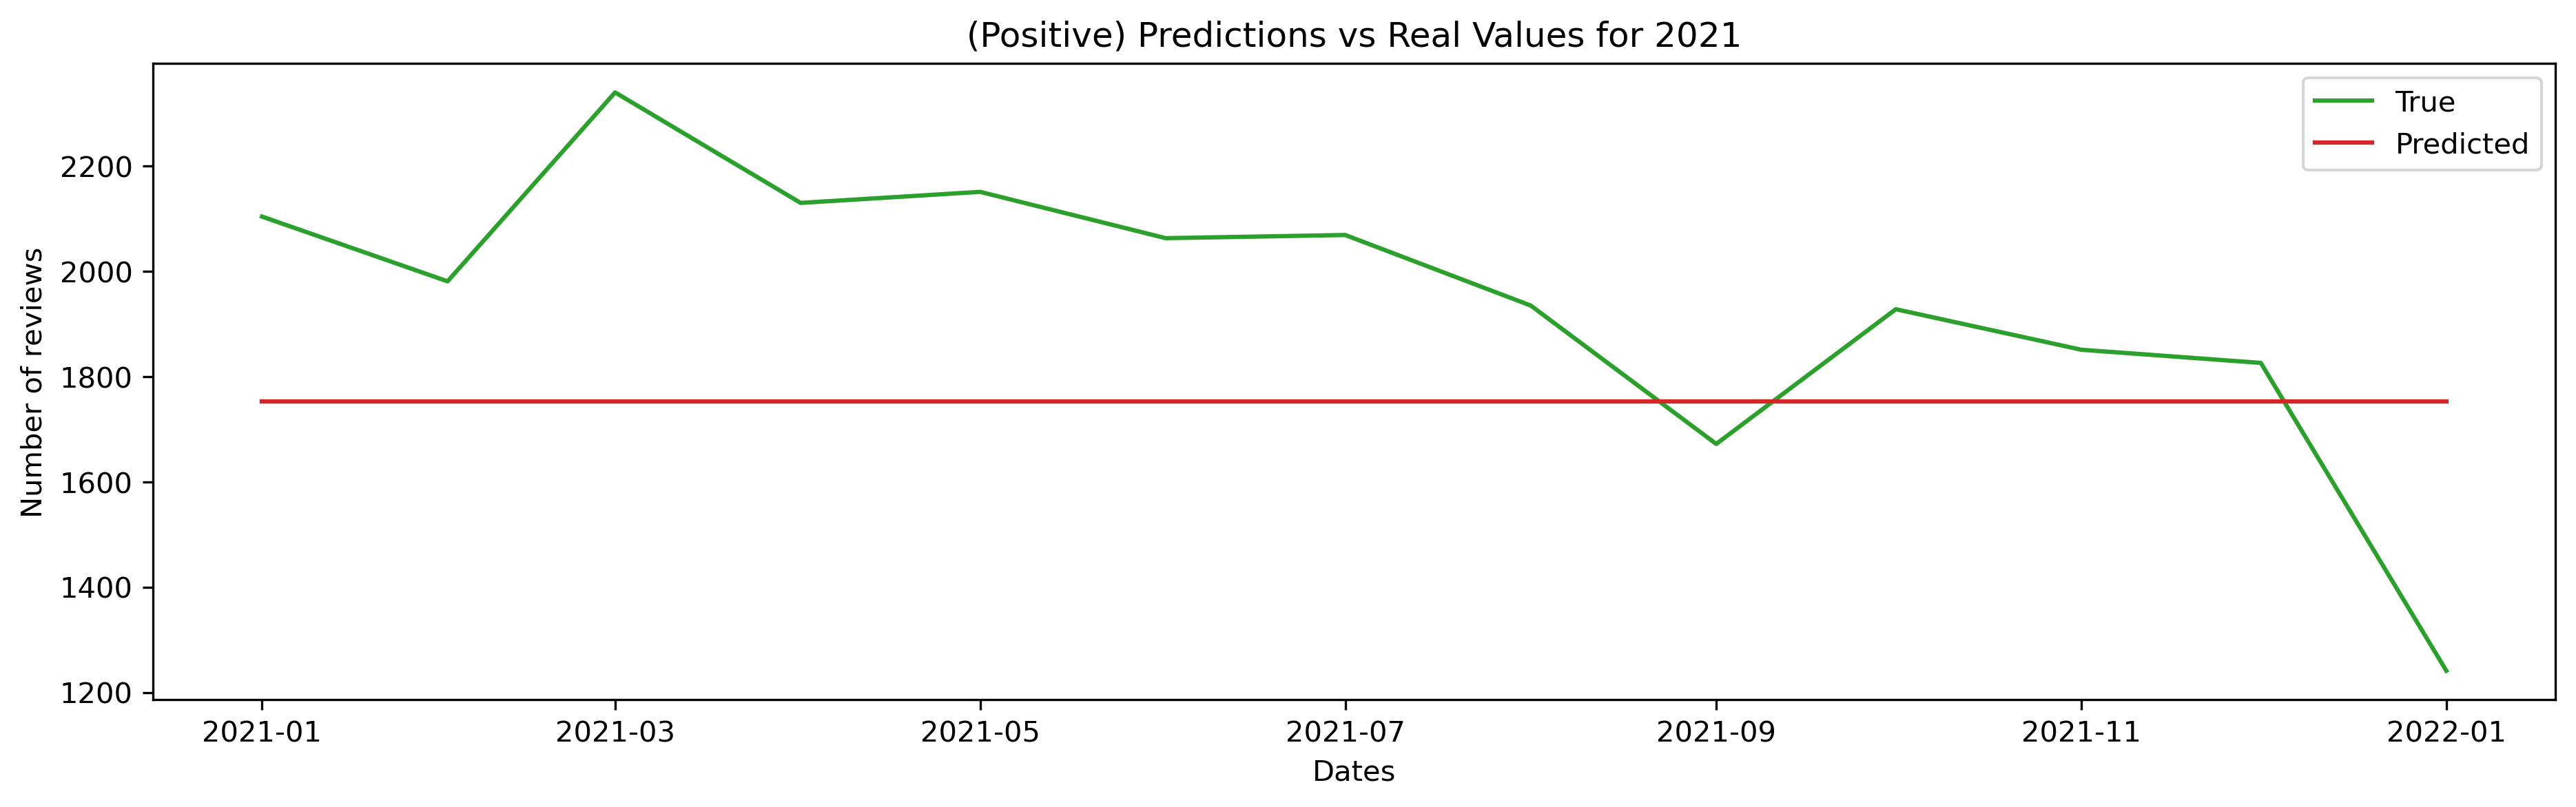

None

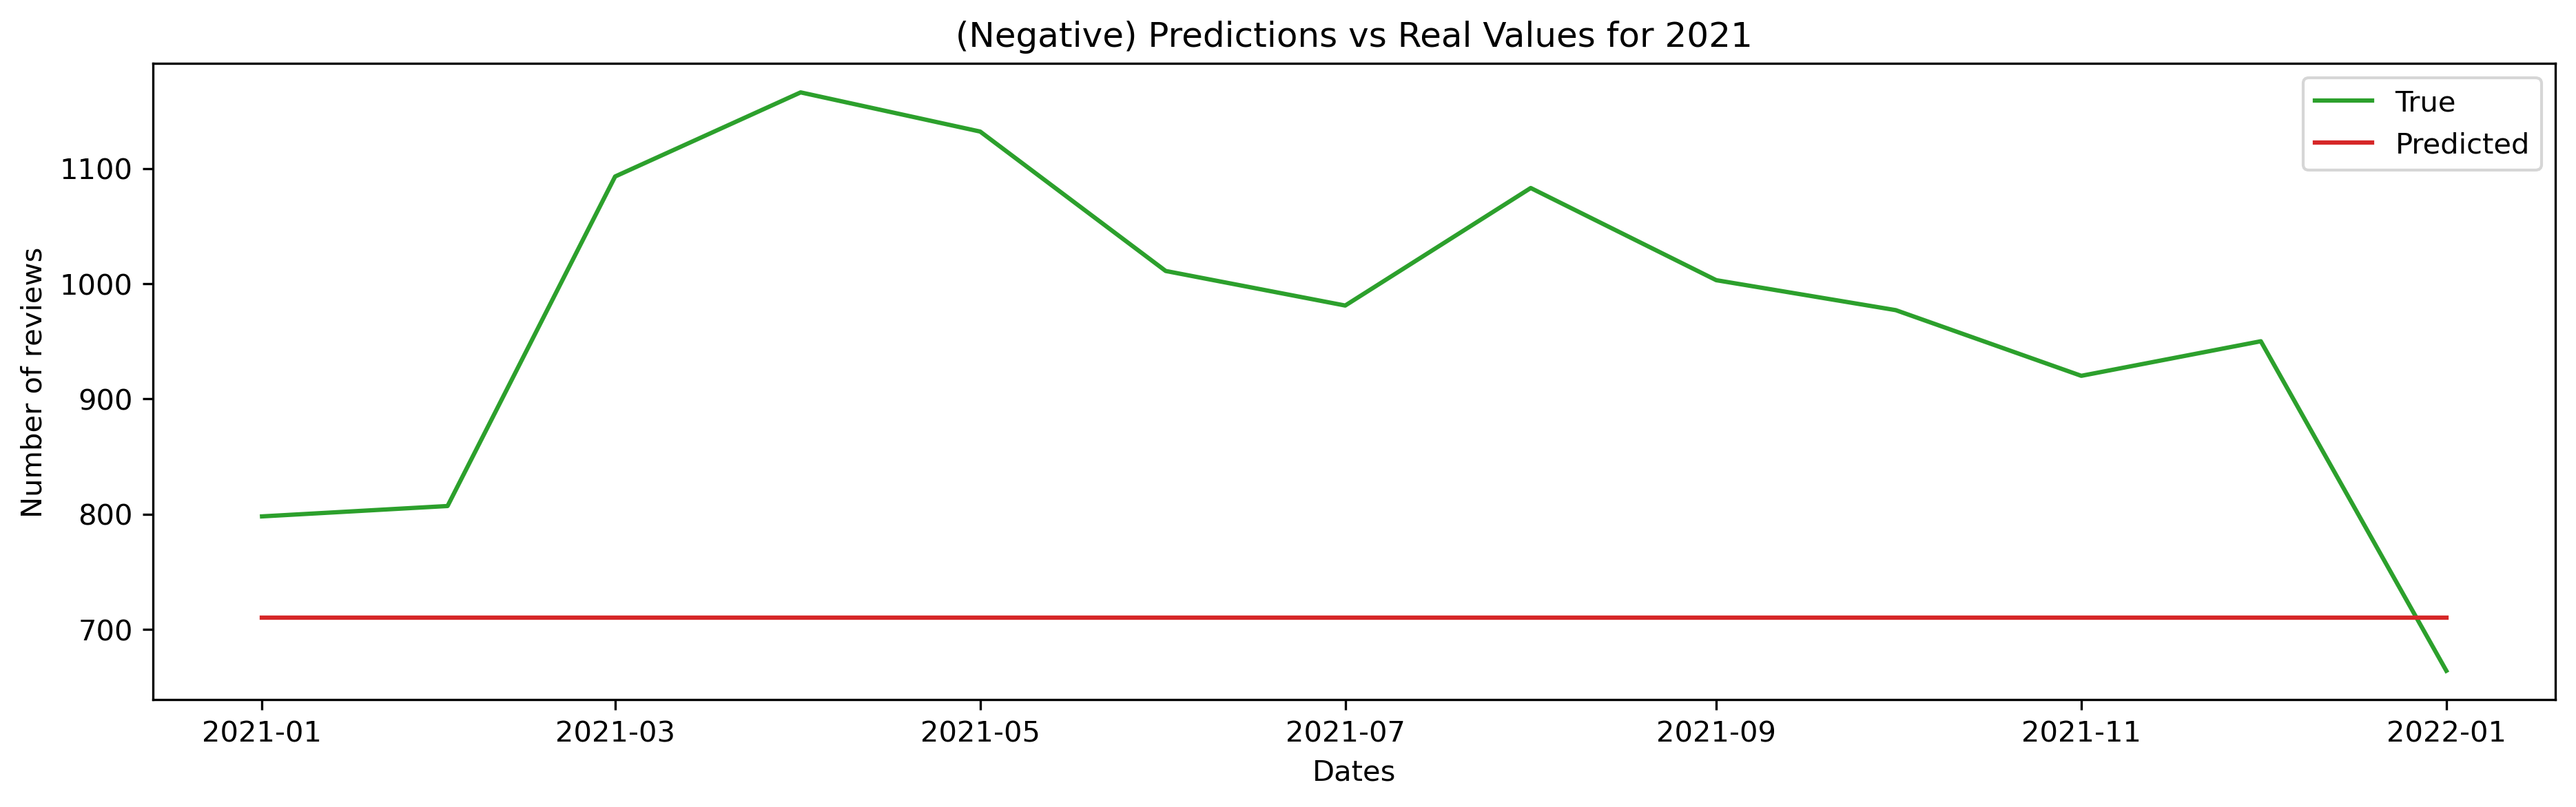

None

In [38]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_pos, title = '(Positive) Predictions vs Real Values for 2021 with Baseline (naive)'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_neg, title = '(Negative) Predictions vs Real Values for 2021 with Baseline (naive)'))

## 4.2. ME - Exponential Smoothing

### 4.2.1. ME - Exponential Smoothing - Simple Exponential Smoothing

In [39]:
print('Positive Sentiment')
y_hat_SimpleExpSmooth_pos = utils.EvaluateETS(SimpleExpSmoothing_pos_results, y_true_pos)
print('\nNegative Sentiment')
y_hat_SimpleExpSmooth_neg = utils.EvaluateETS(SimpleExpSmoothing_neg_results, y_true_neg)

Positive Sentiment
RMSE: 315.48
MAE: 273.66
MAPE: 0.14

Negative Sentiment
RMSE: 257.21
MAE: 230.35
MAPE: 0.23


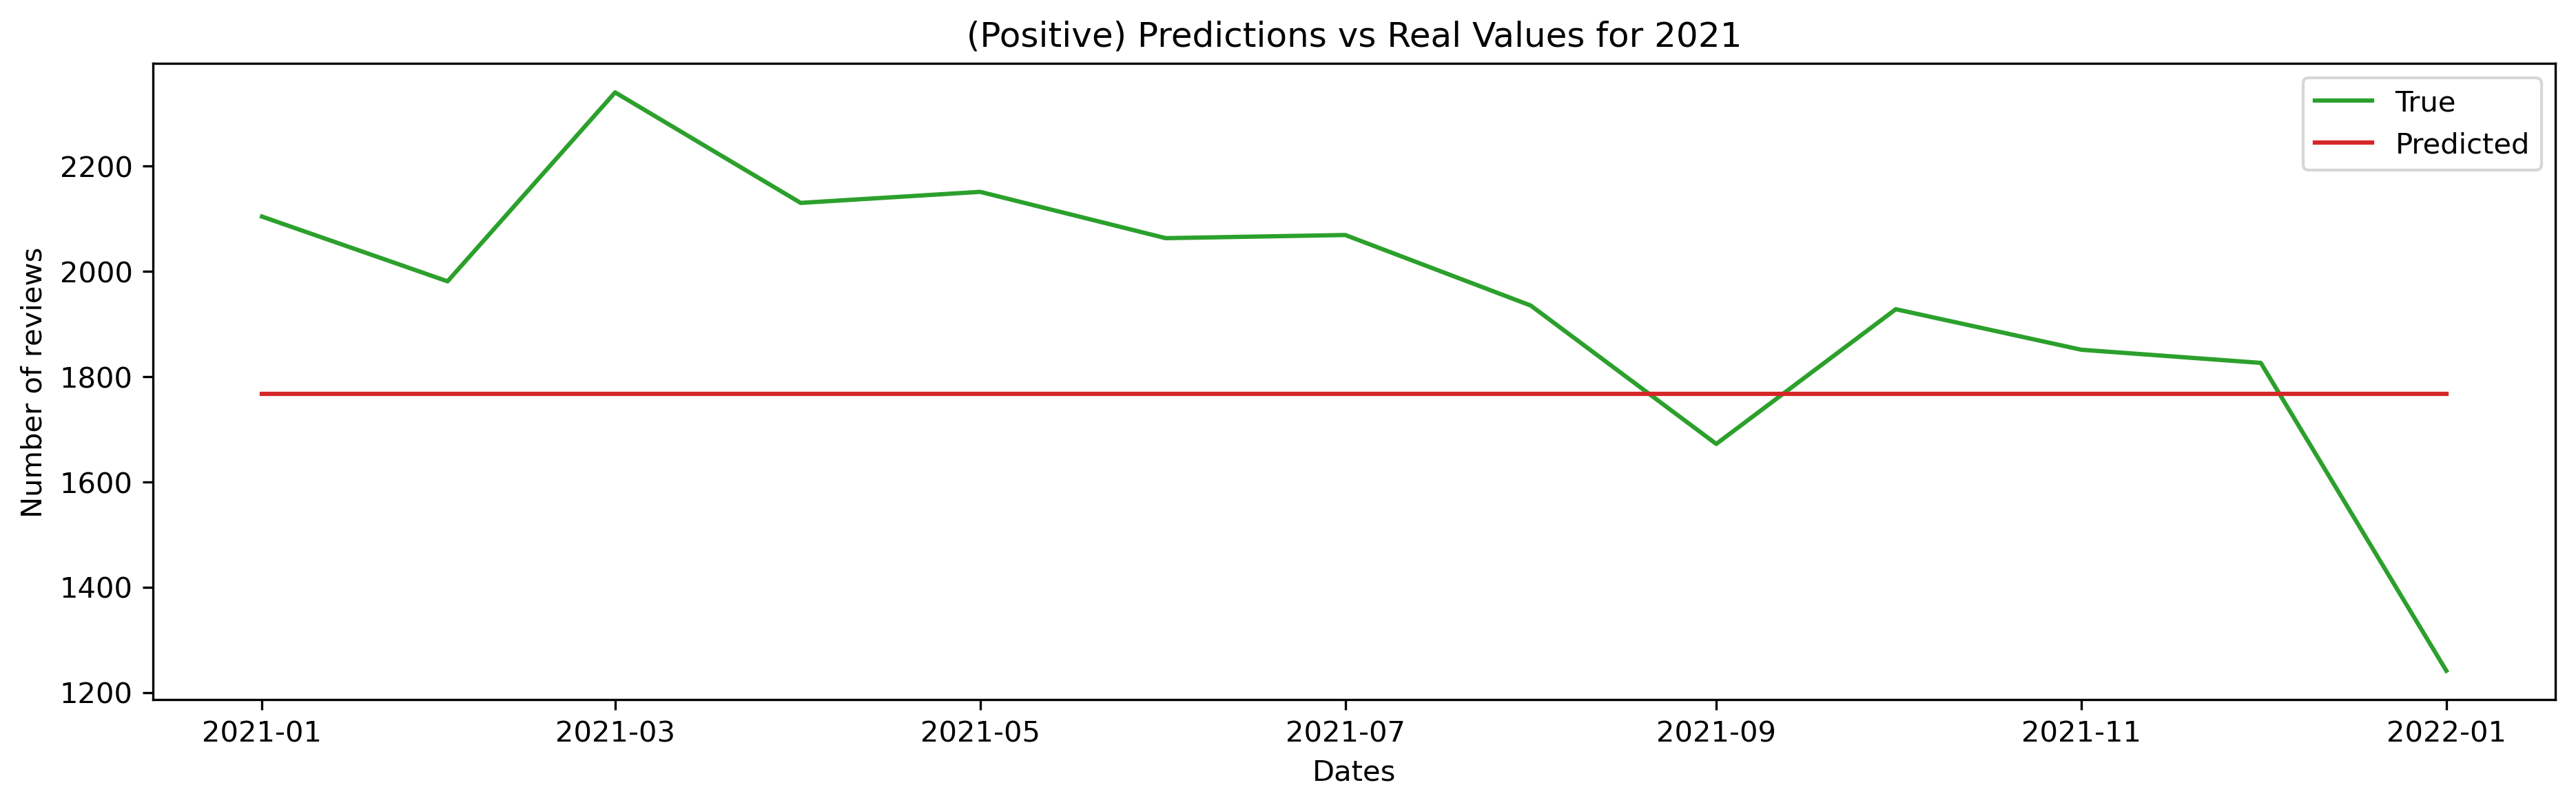

None

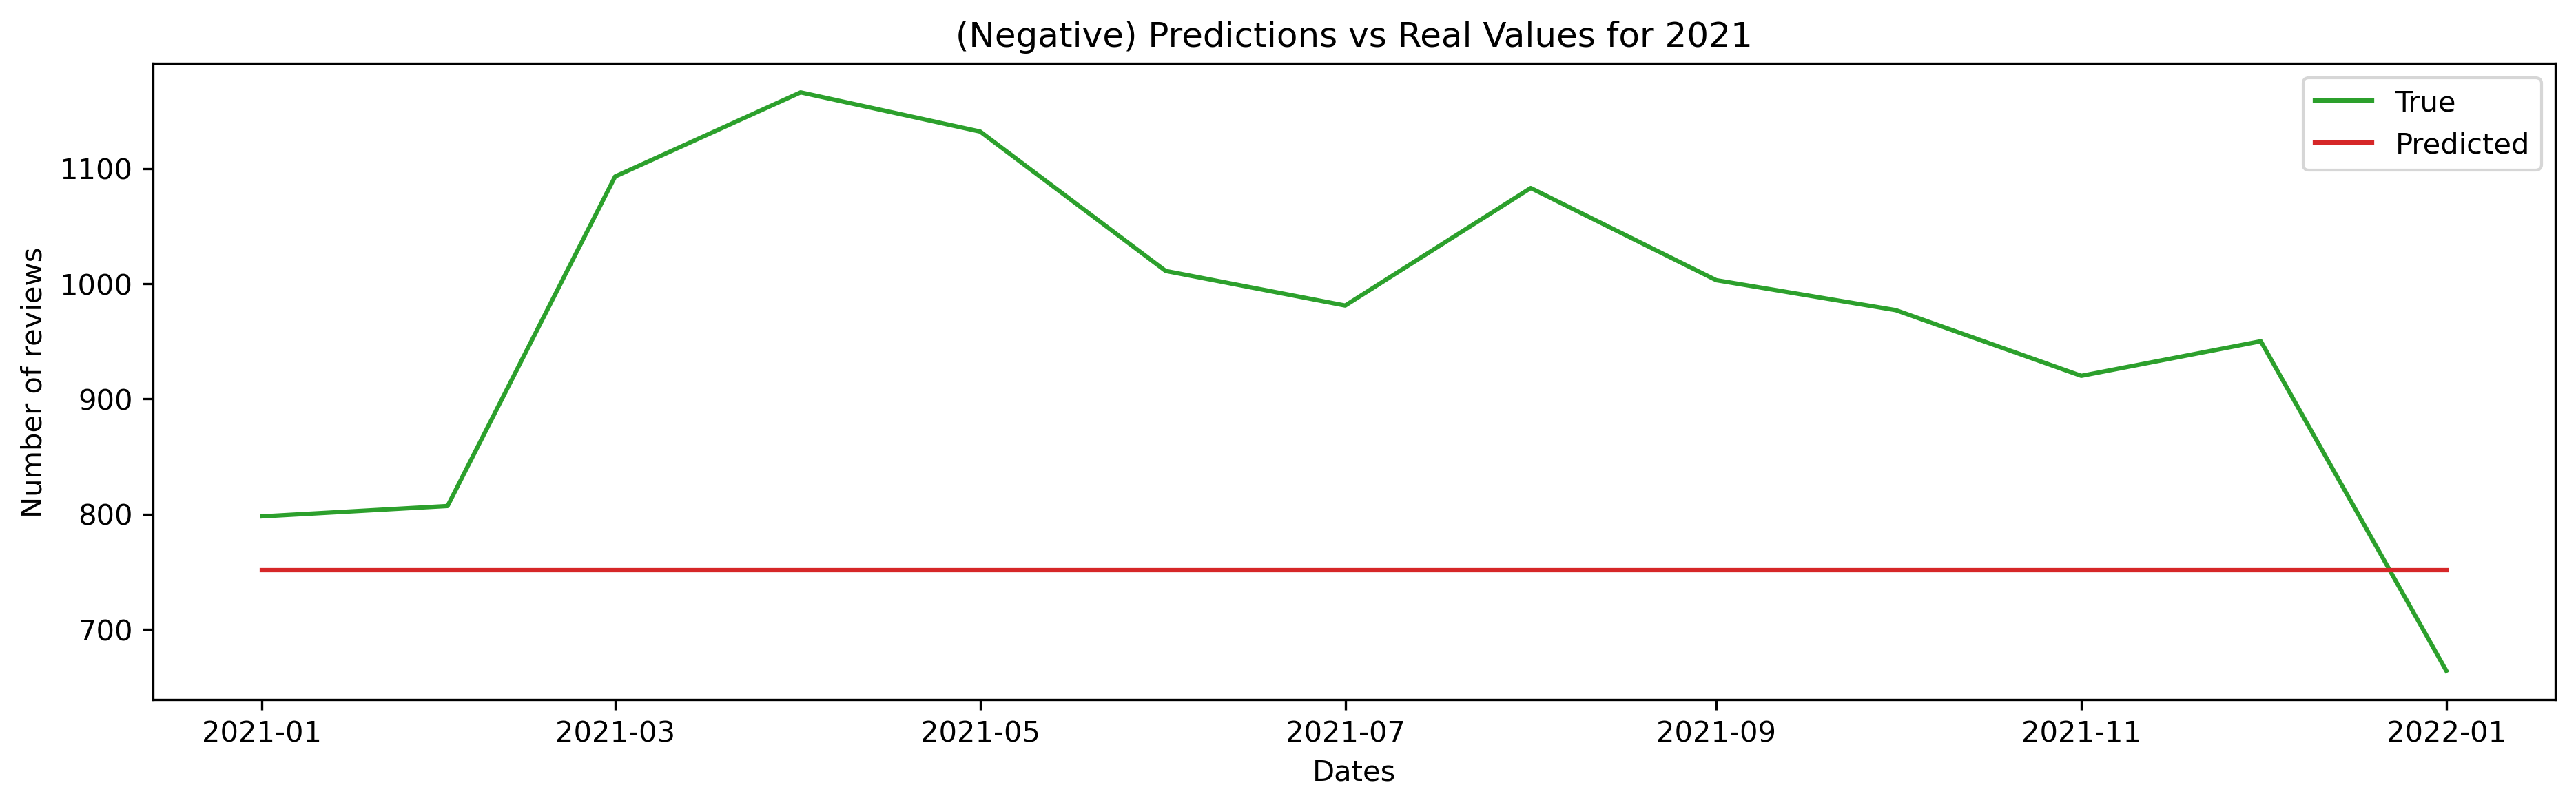

None

In [40]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_SimpleExpSmooth_pos, title = '(Positive) Predictions vs Real Values for 2021 with Simple Exponential Smoothing'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_SimpleExpSmooth_neg, title = '(Negative) Predictions vs Real Values for 2021 with Simple Exponential Smoothing'))

### 4.2.2. ME - Exponential Smoothing - Holt Exponential Smoothing

In [41]:
print('Positive Sentiment')
y_hat_Holt_NotDamped_pos = utils.EvaluateETS(Holt_NotDamped_pos_results, y_true_pos)
y_hat_Holt_Damped_pos = utils.EvaluateETS(Holt_Damped_pos_results, y_true_pos)
print('\nNegative Sentiment')
y_hat_Holt_NotDamped_neg = utils.EvaluateETS(Holt_NotDamped_neg_results, y_true_neg)
y_hat_Holt_Damped_neg = utils.EvaluateETS(Holt_Damped_neg_results, y_true_neg)

Positive Sentiment
RMSE: 387.96
MAE: 365.13
MAPE: 0.18
RMSE: 375.30
MAE: 350.58
MAPE: 0.18

Negative Sentiment
RMSE: 366.27
MAE: 339.25
MAPE: 0.34
RMSE: 337.93
MAE: 308.75
MAPE: 0.30


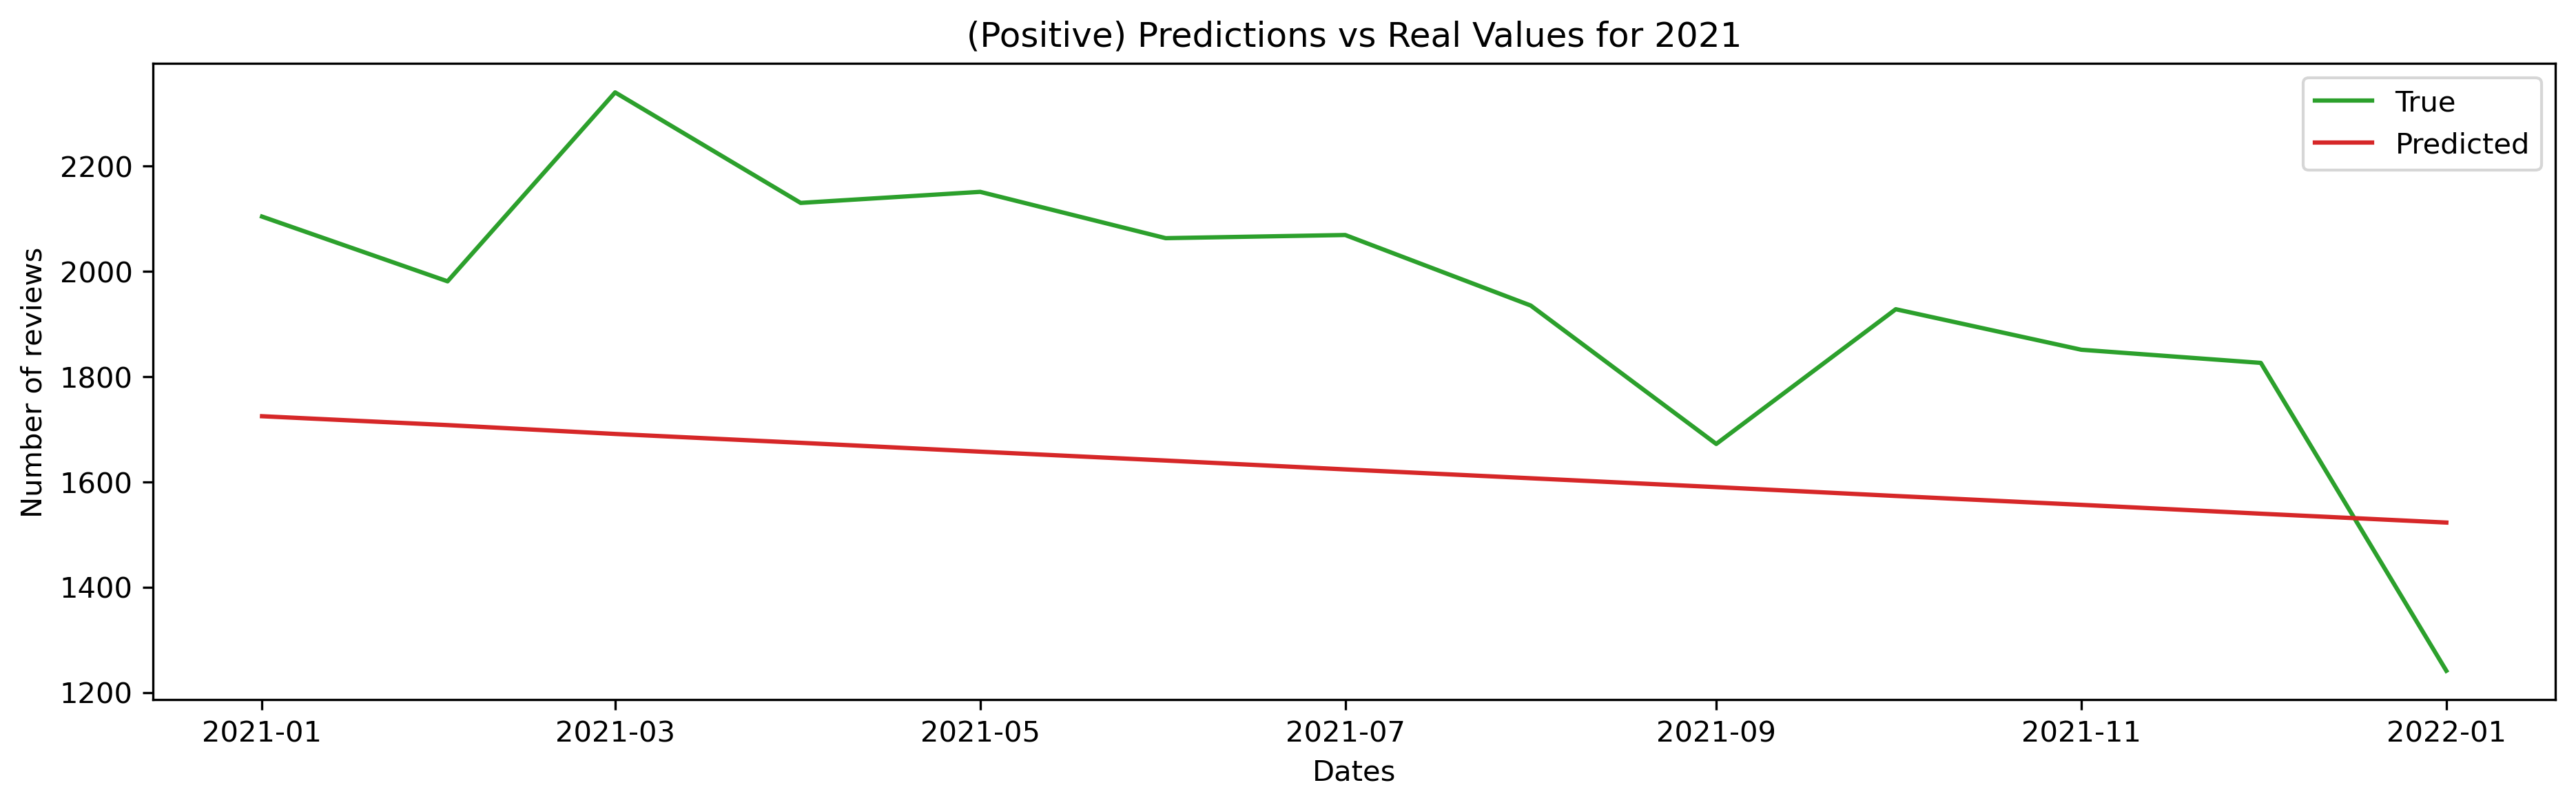

None

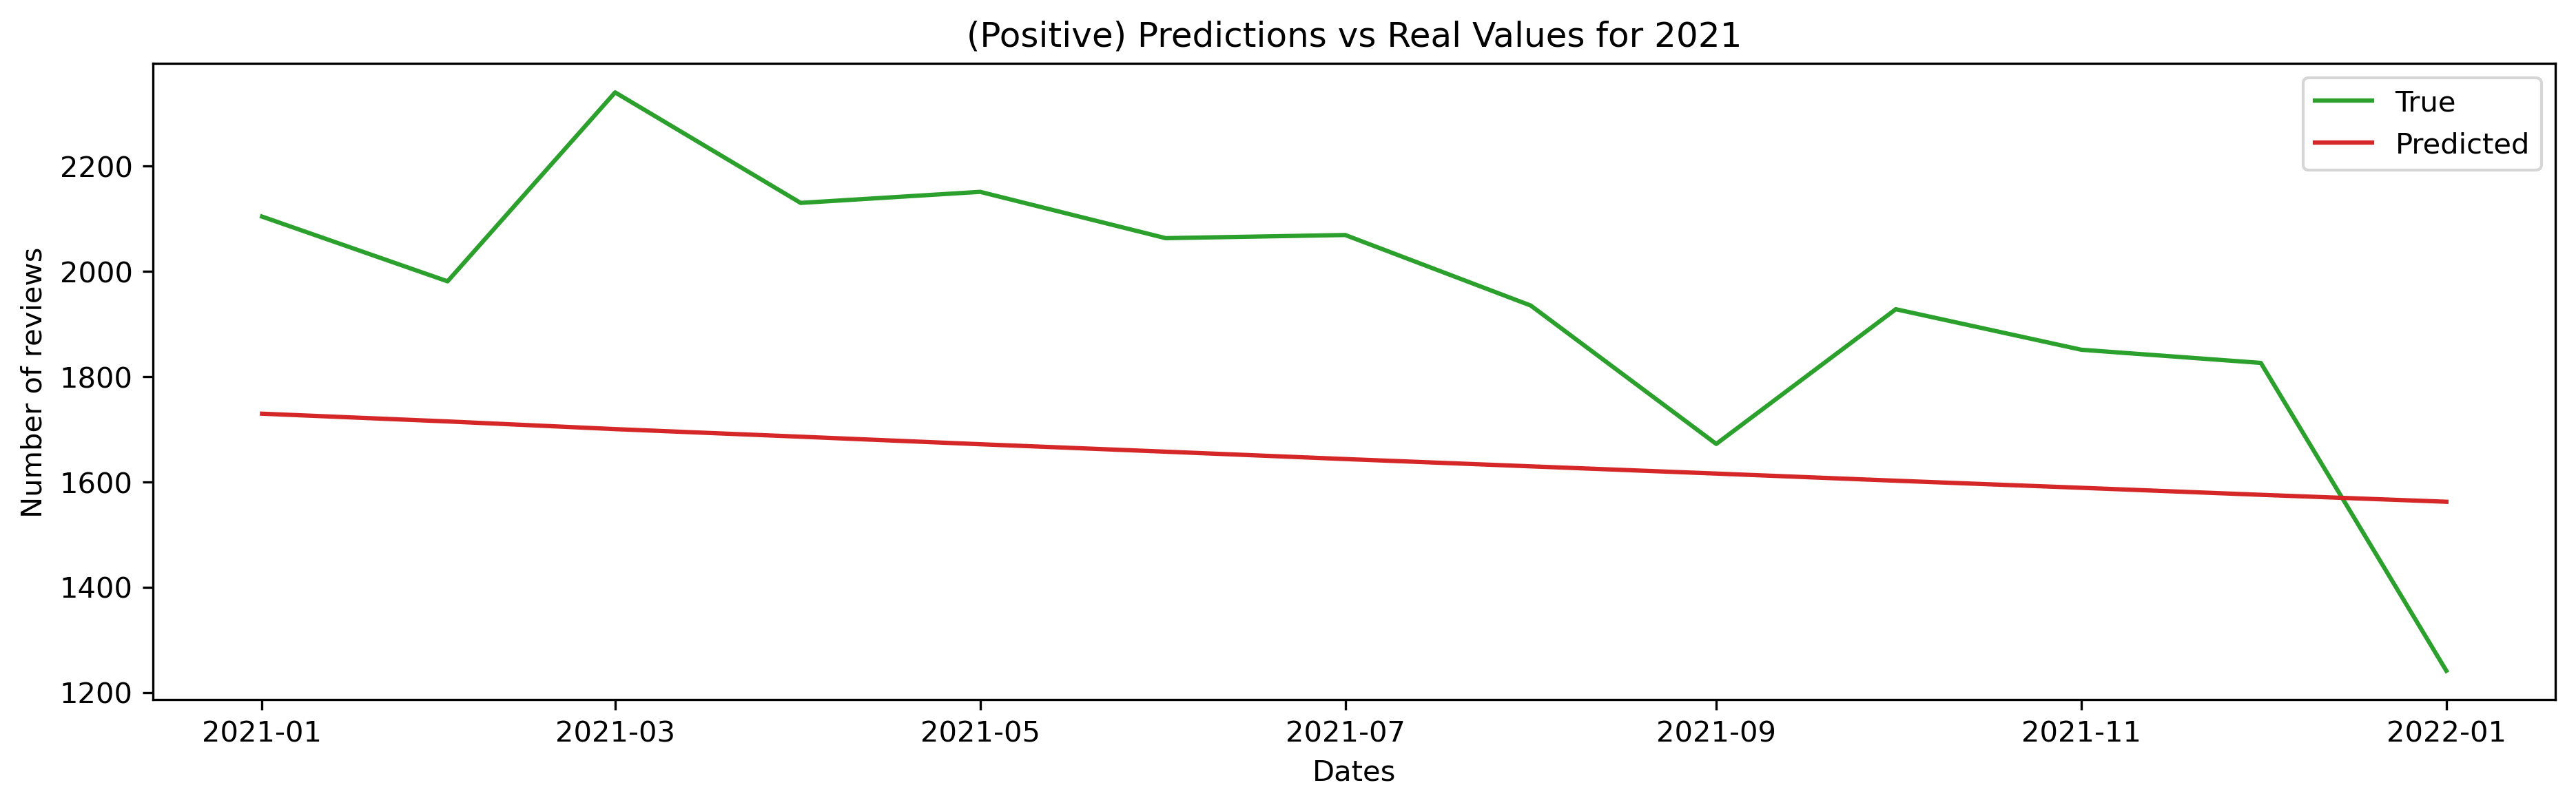

None

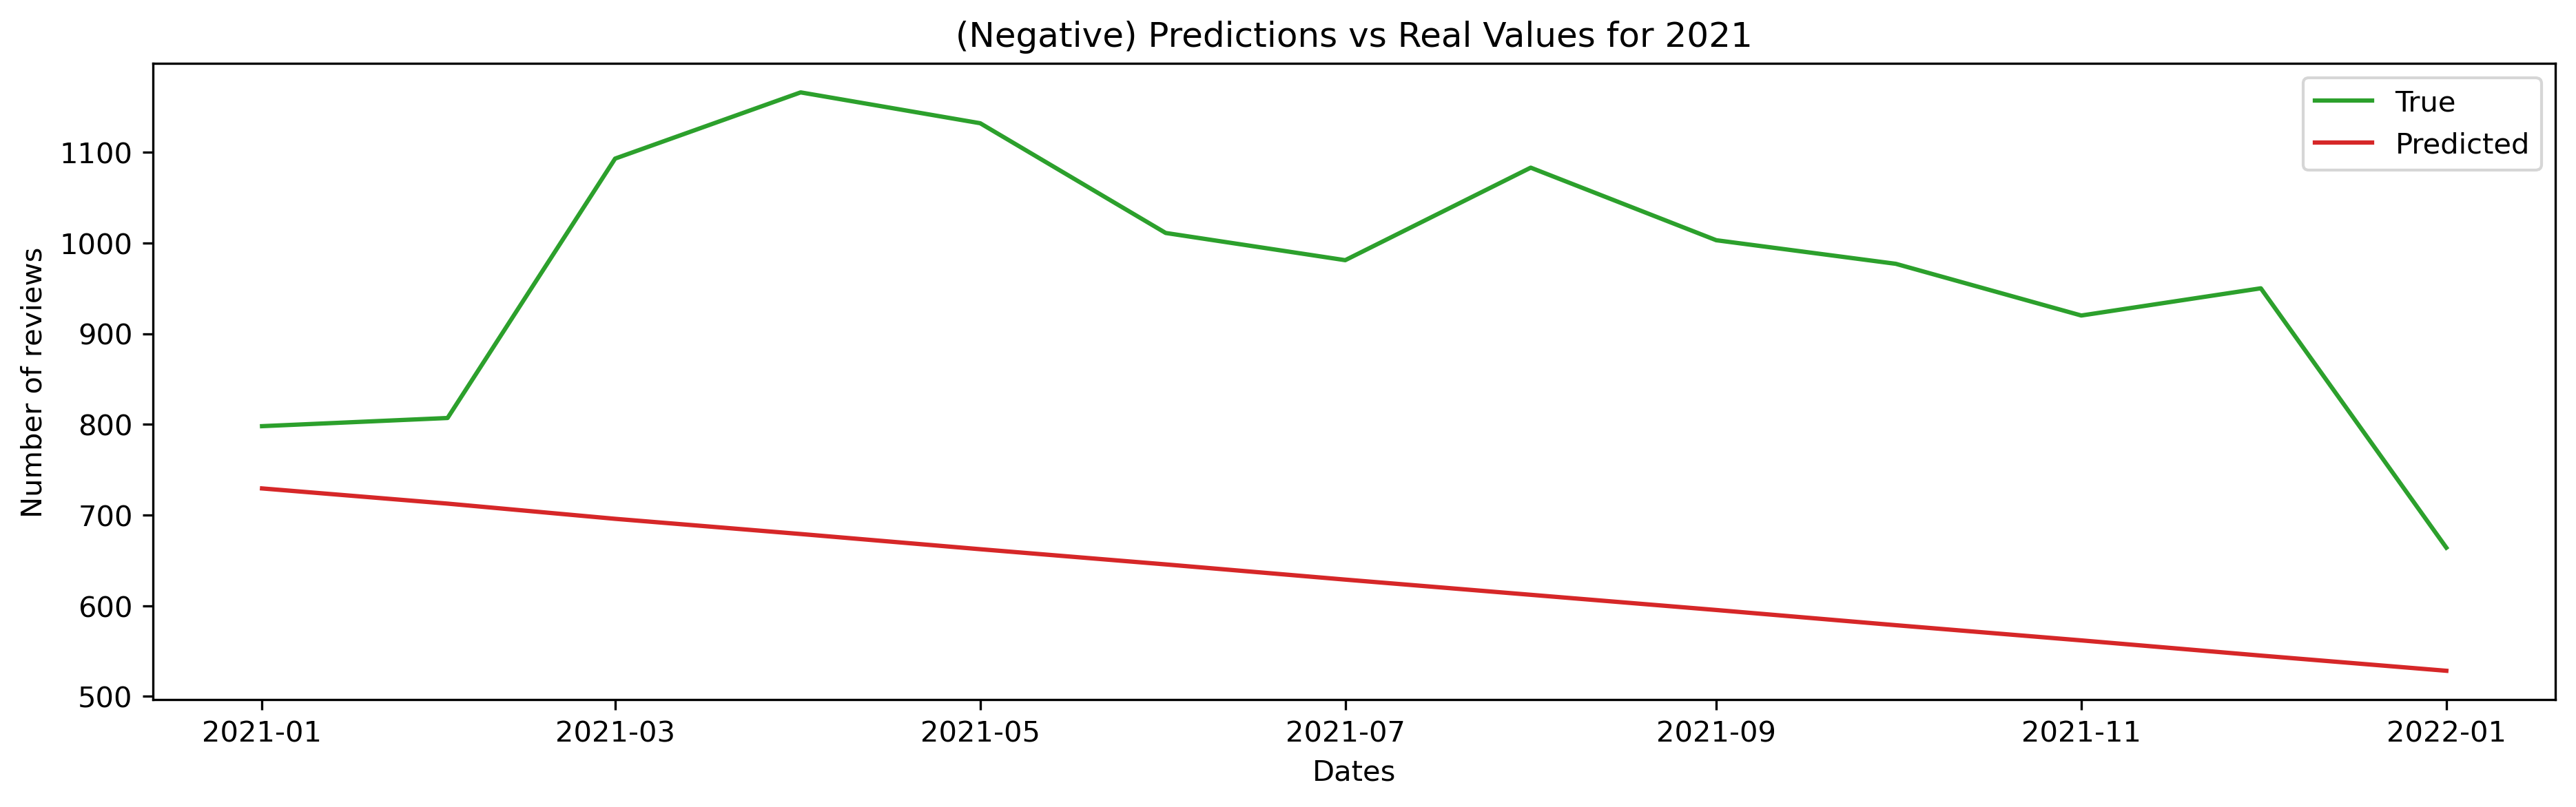

None

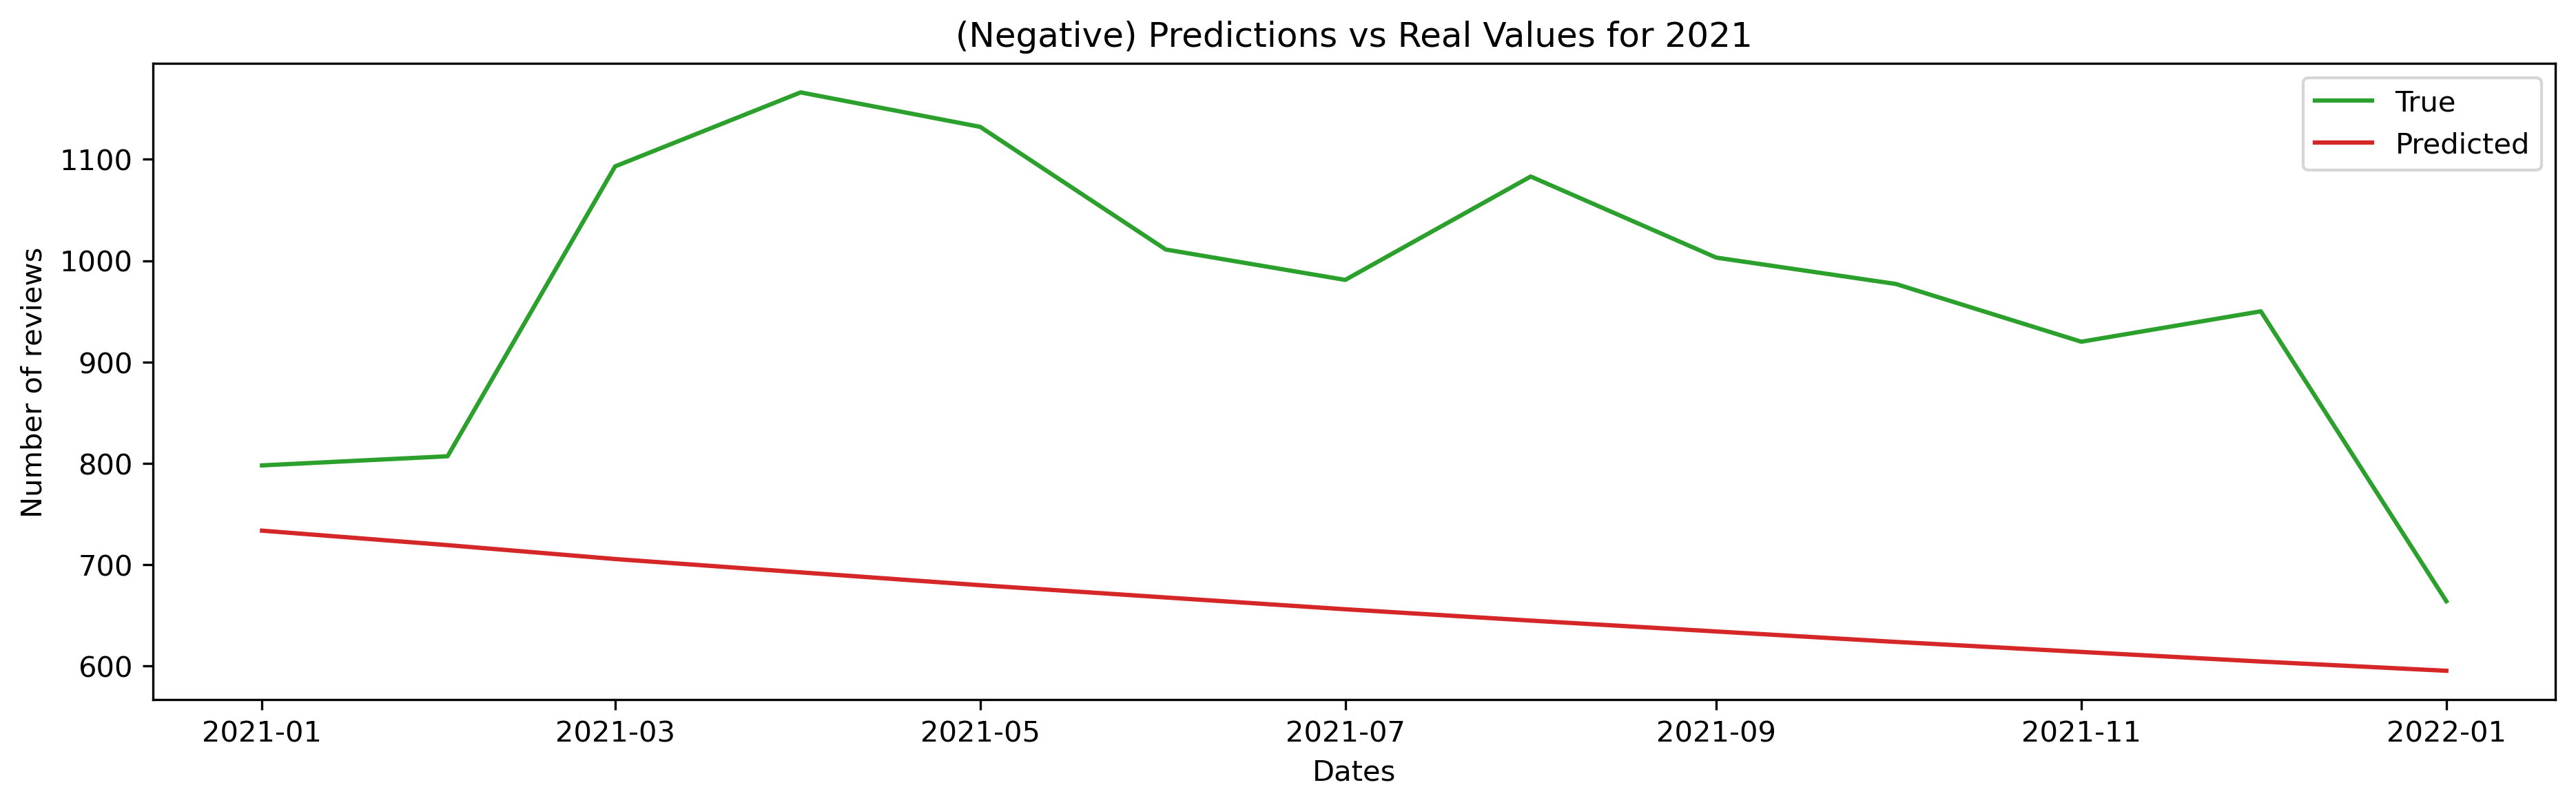

None

In [42]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_Holt_NotDamped_pos, title = '(Positive) Predictions vs Real Values for 2021 with Holt Exponential Smoothing'))
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_Holt_Damped_pos, title = '(Positive) Predictions vs Real Values for 2021 with Damped Holt Exponential Smoothing'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_Holt_NotDamped_neg, title = '(Negative) Predictions vs Real Values for 2021 with Holt Exponential Smoothing'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_Holt_Damped_neg, title = '(Negative) Predictions vs Real Values for 2021 with Damped Holt Exponential Smoothing'))

### 4.2.3. ME - Exponential Smoothing - Holt-Winters Exponential Smoothing

In [43]:
print('Positive Sentiment')
y_hat_HoltWinters_Add_NotDamped_pos = utils.EvaluateETS(HoltWinters_Add_NotDamped_pos_results, y_true_pos)
y_hat_HoltWinters_Add_Damped_pos = utils.EvaluateETS(HoltWinters_Add_Damped_pos_results, y_true_pos)
y_hat_HoltWinters_Multi_NotDamped_pos = utils.EvaluateETS(HoltWinters_Multi_NotDamped_pos_results, y_true_pos)
y_hat_HoltWinters_Multi_Damped_pos = utils.EvaluateETS(HoltWinters_Multi_Damped_pos_results, y_true_pos)
print('\nNegative Sentiment')
y_hat_HoltWinters_Add_NotDamped_neg = utils.EvaluateETS(HoltWinters_Add_NotDamped_neg_results, y_true_neg)
y_hat_HoltWinters_Add_Damped_neg = utils.EvaluateETS(HoltWinters_Add_Damped_neg_results, y_true_neg)
y_hat_HoltWinters_Multi_NotDamped_neg = utils.EvaluateETS(HoltWinters_Multi_NotDamped_neg_results, y_true_neg)
y_hat_HoltWinters_Multi_Damped_neg = utils.EvaluateETS(HoltWinters_Multi_Damped_neg_results, y_true_neg)

Positive Sentiment
RMSE: 387.96
MAE: 365.13
MAPE: 0.18
RMSE: 375.30
MAE: 350.58
MAPE: 0.18
RMSE: 387.96
MAE: 365.13
MAPE: 0.18
RMSE: 375.30
MAE: 350.58
MAPE: 0.18

Negative Sentiment
RMSE: 366.27
MAE: 339.25
MAPE: 0.34
RMSE: 337.93
MAE: 308.75
MAPE: 0.30
RMSE: 366.27
MAE: 339.25
MAPE: 0.34
RMSE: 337.93
MAE: 308.75
MAPE: 0.30


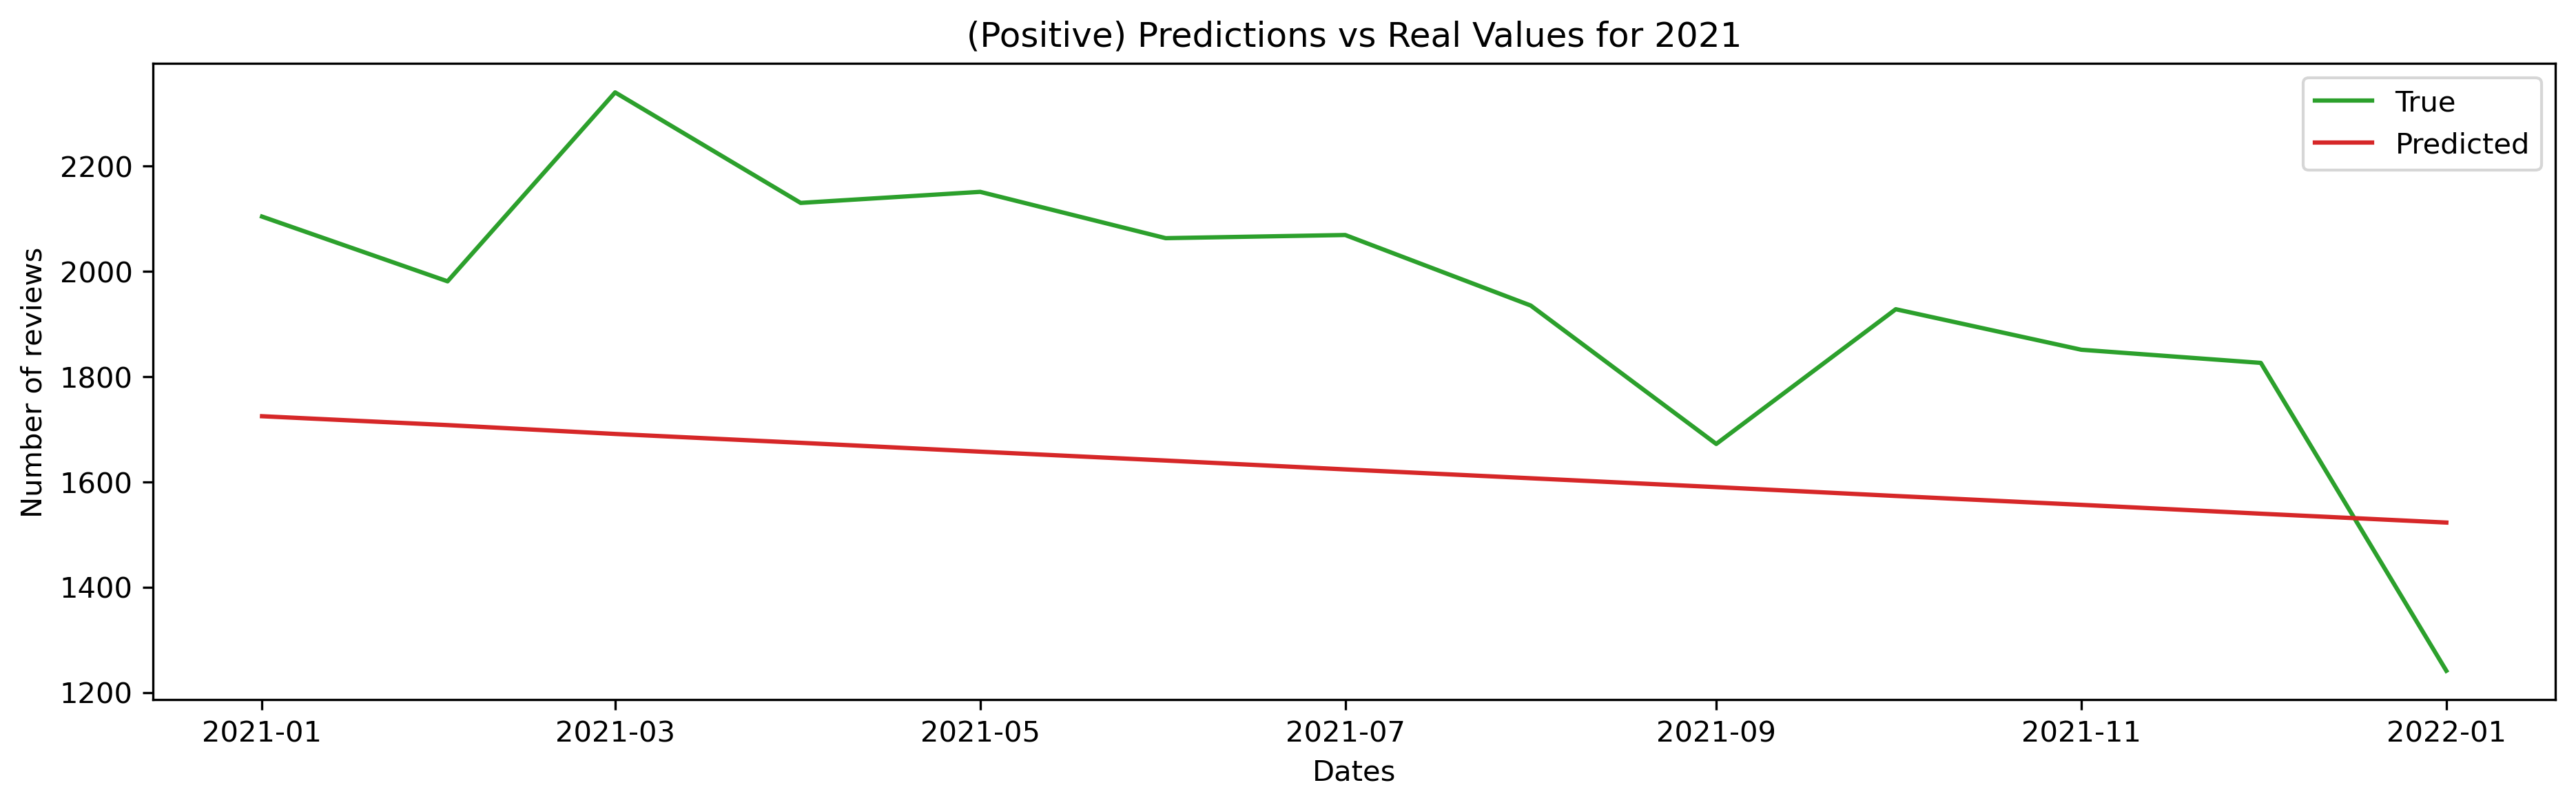

None

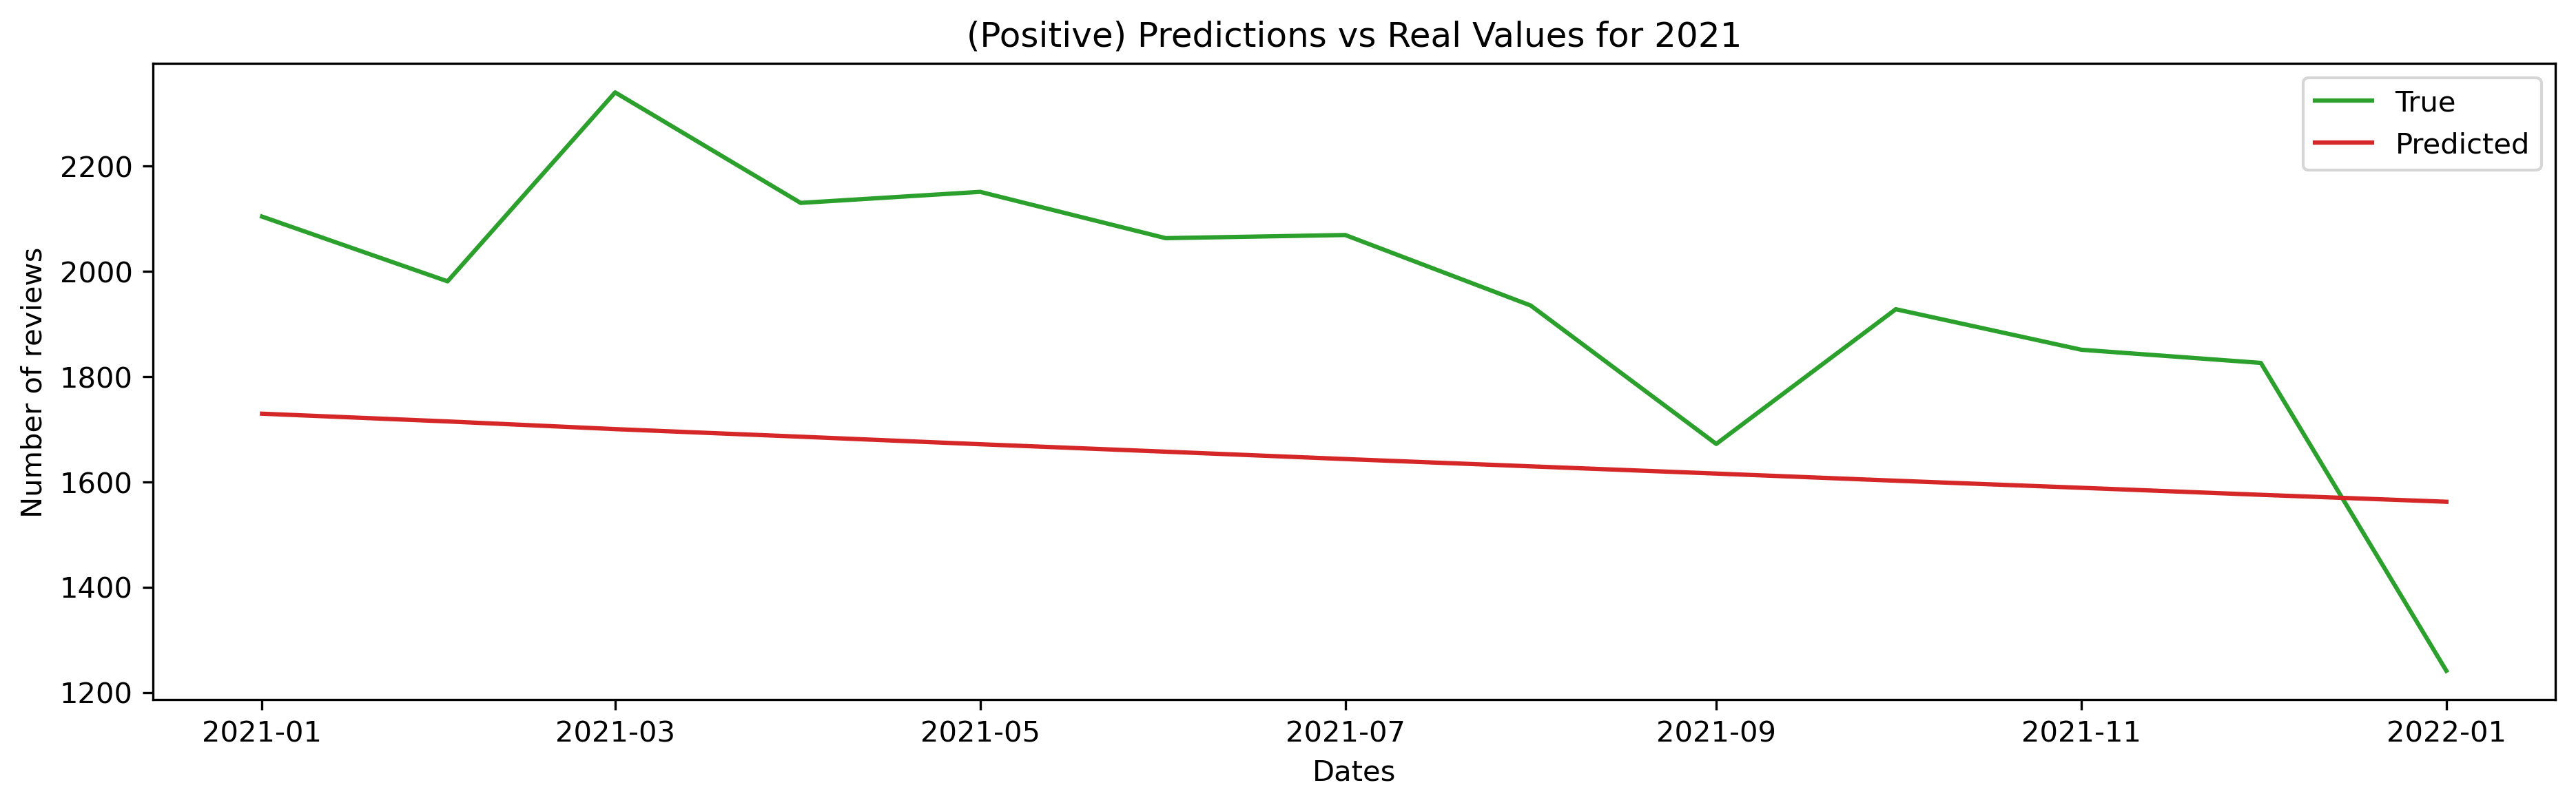

None

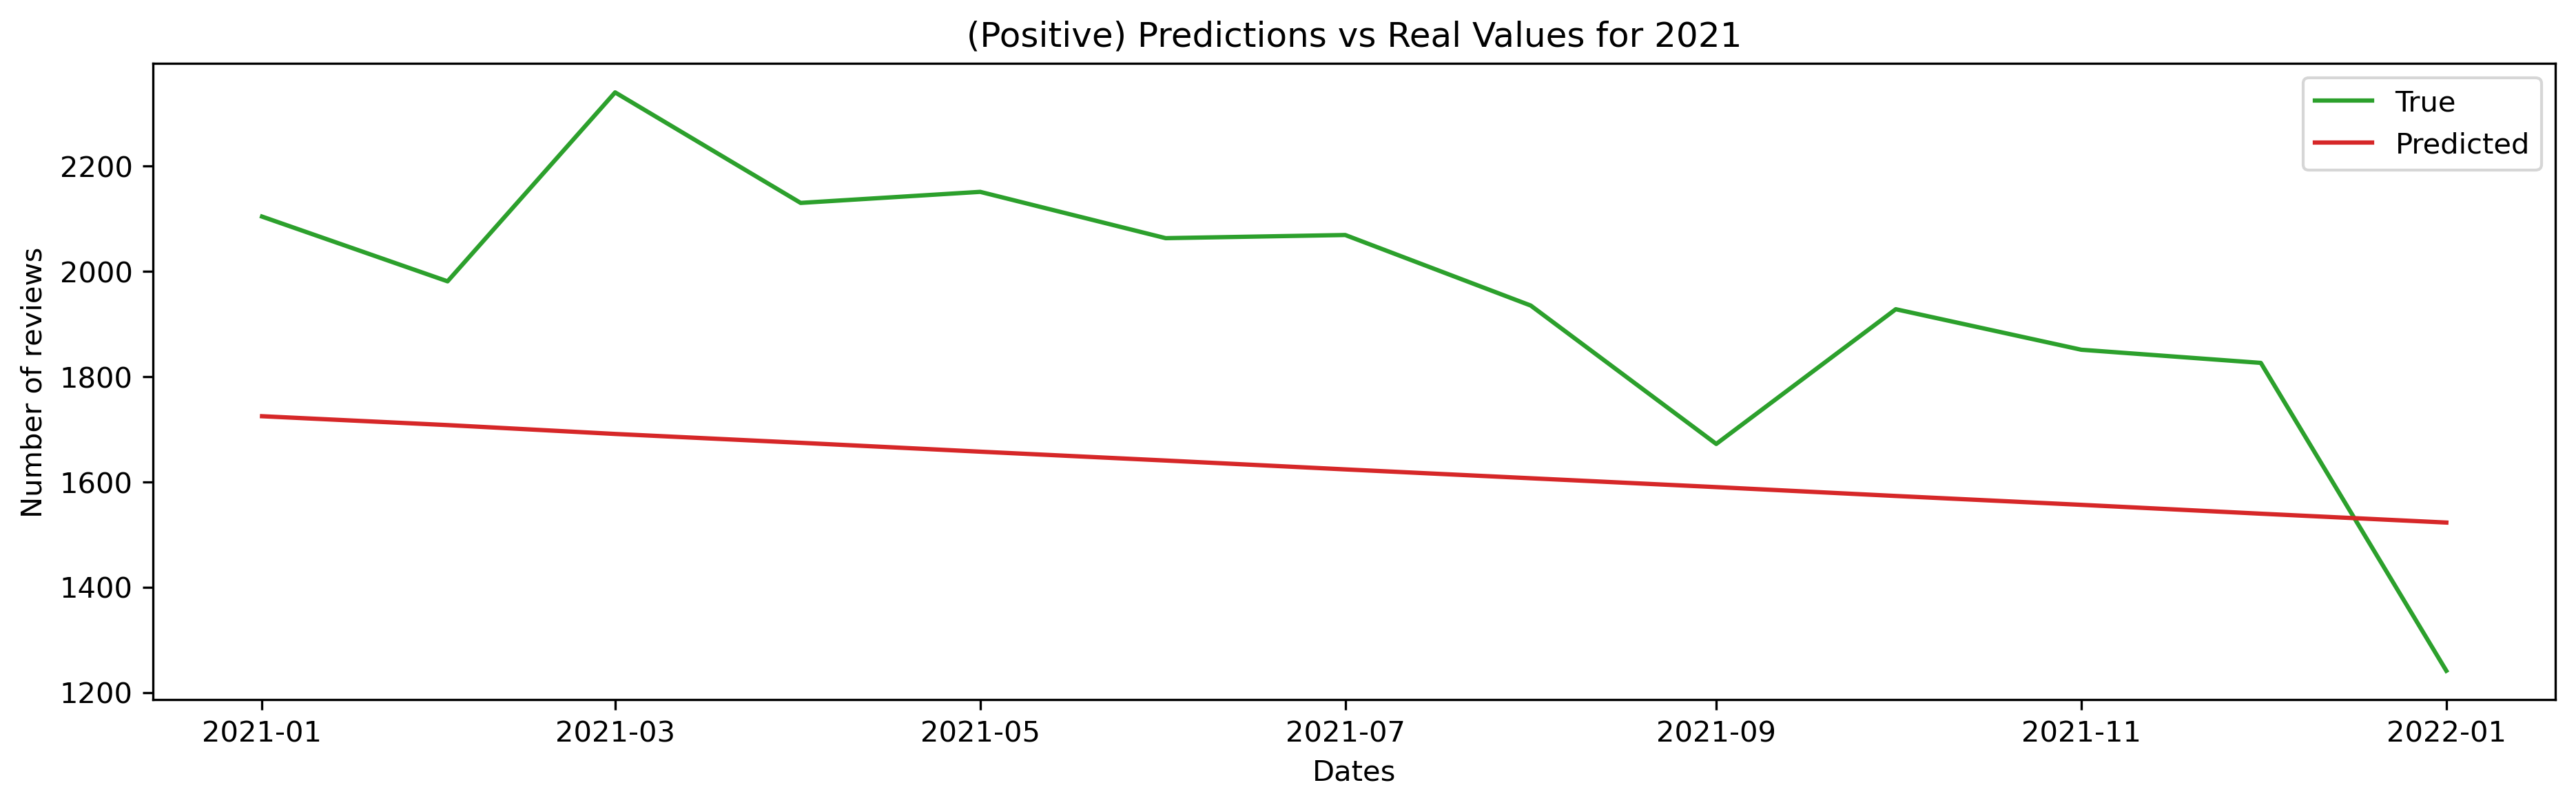

None

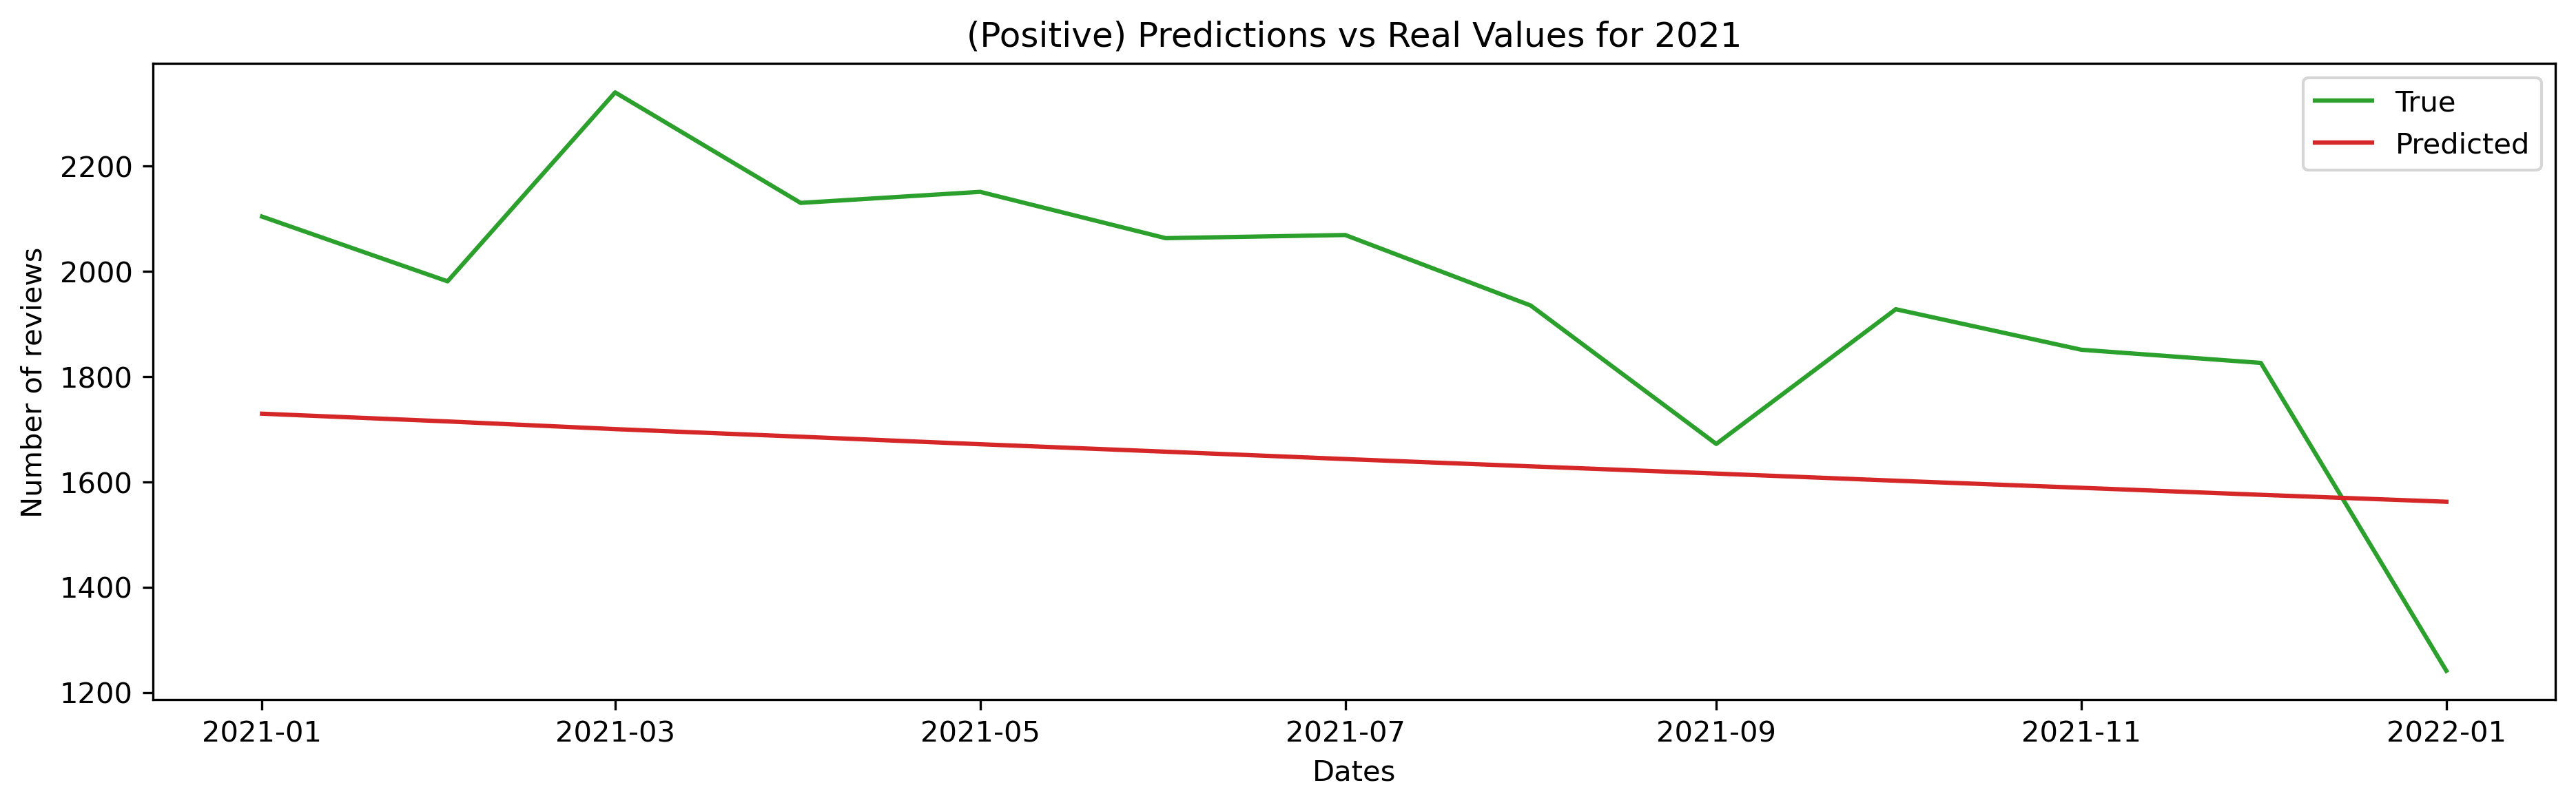

None

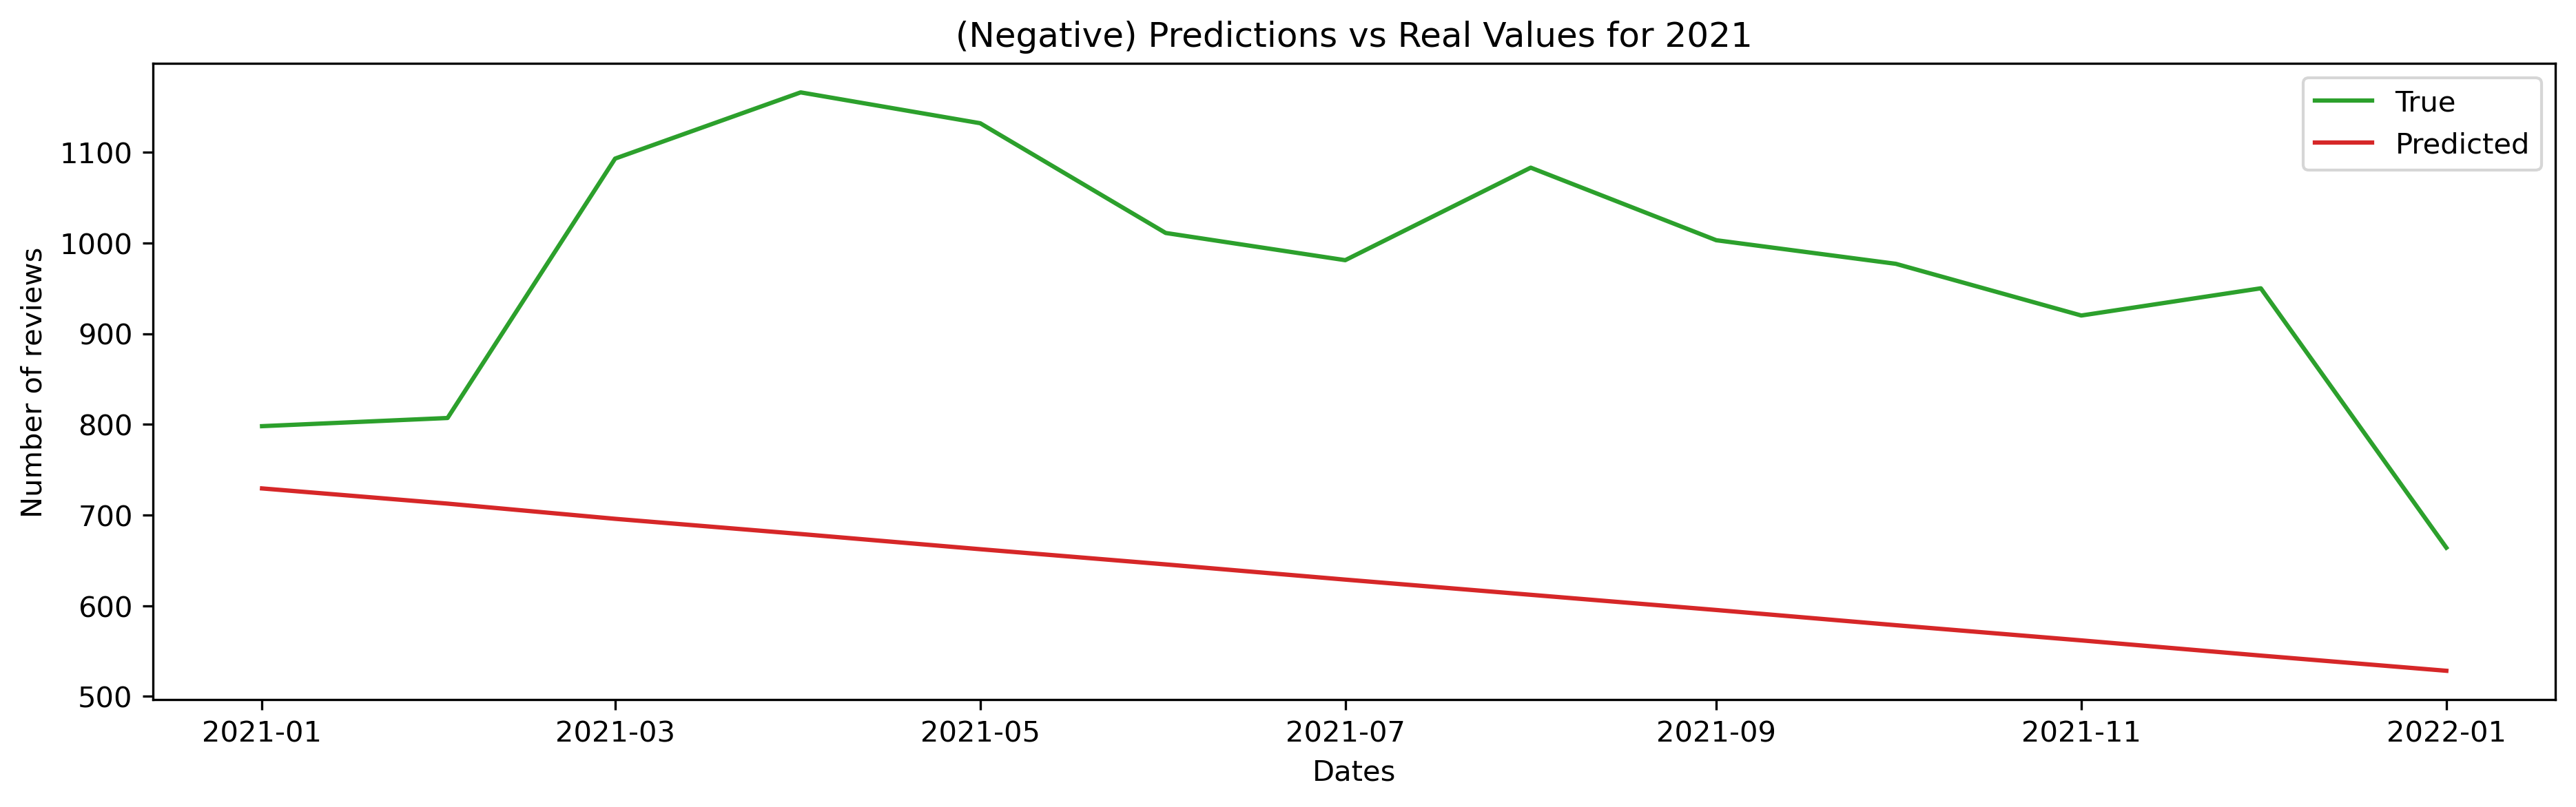

None

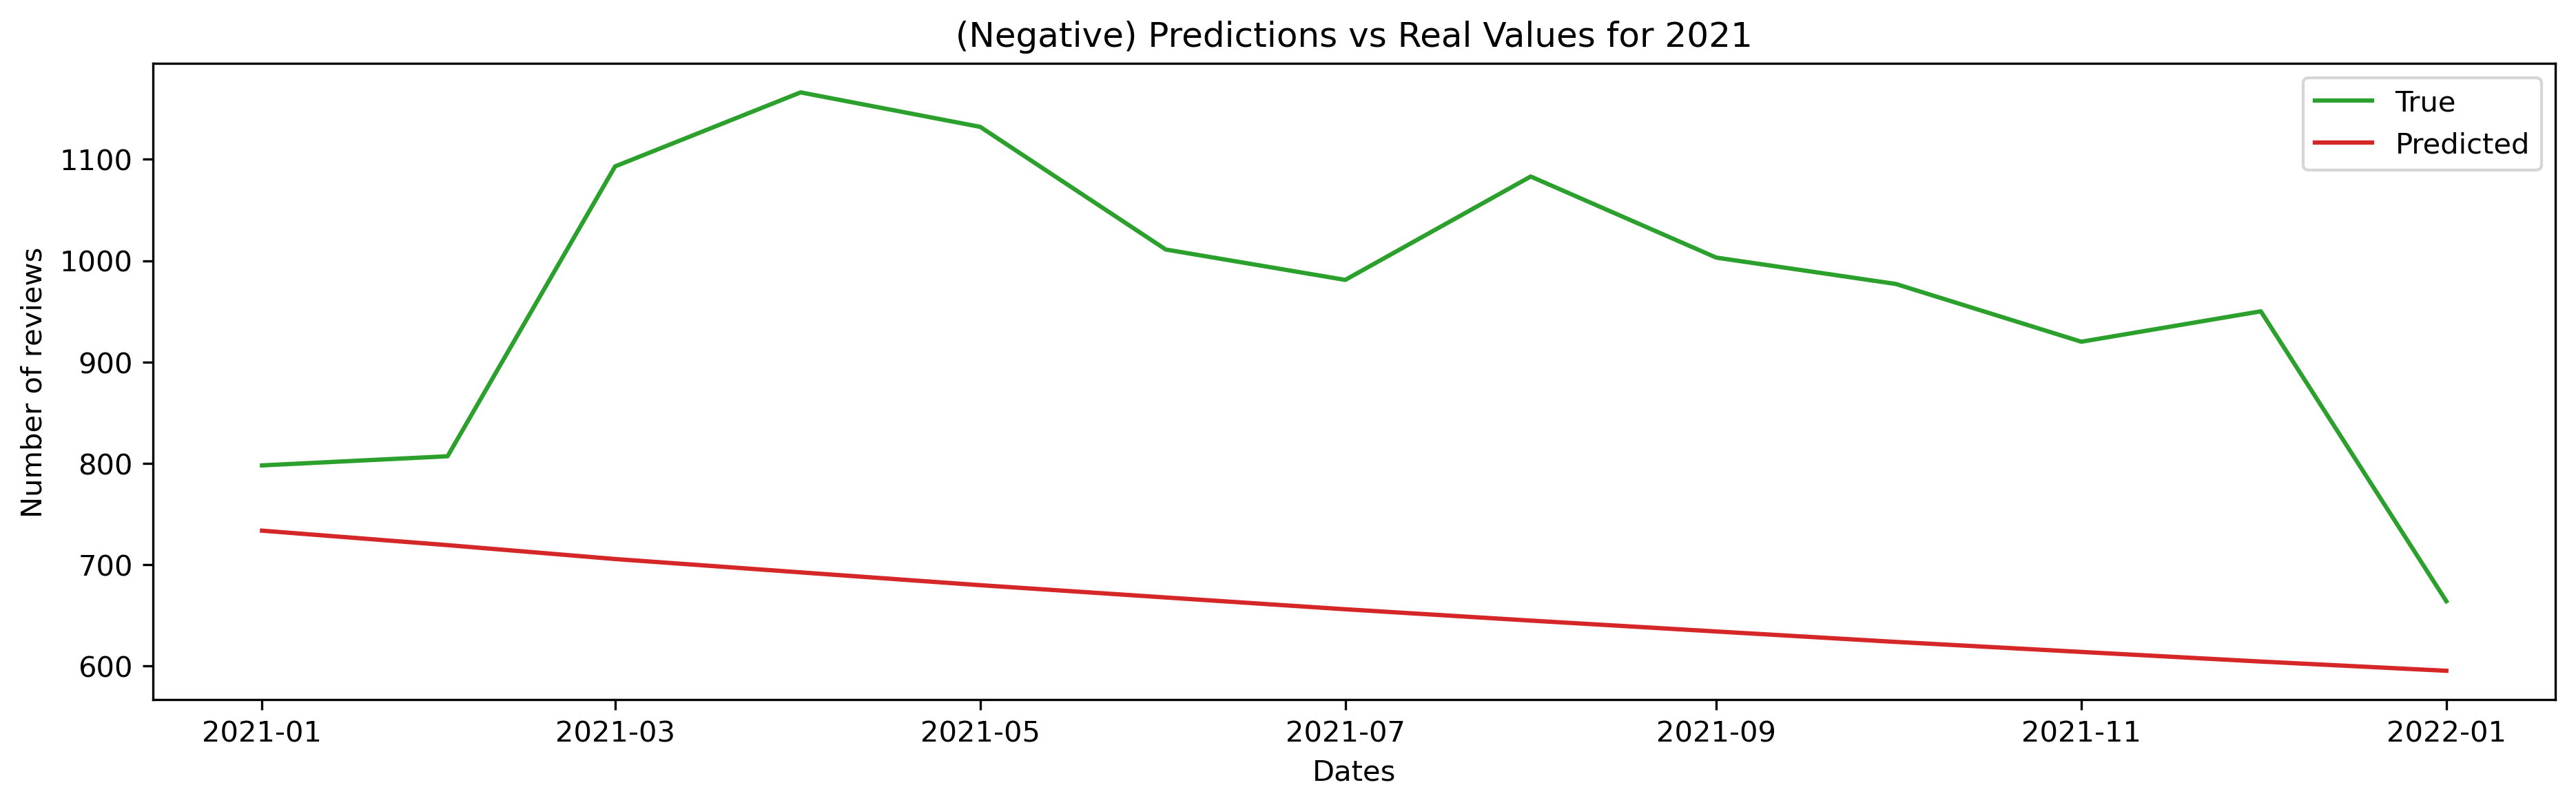

None

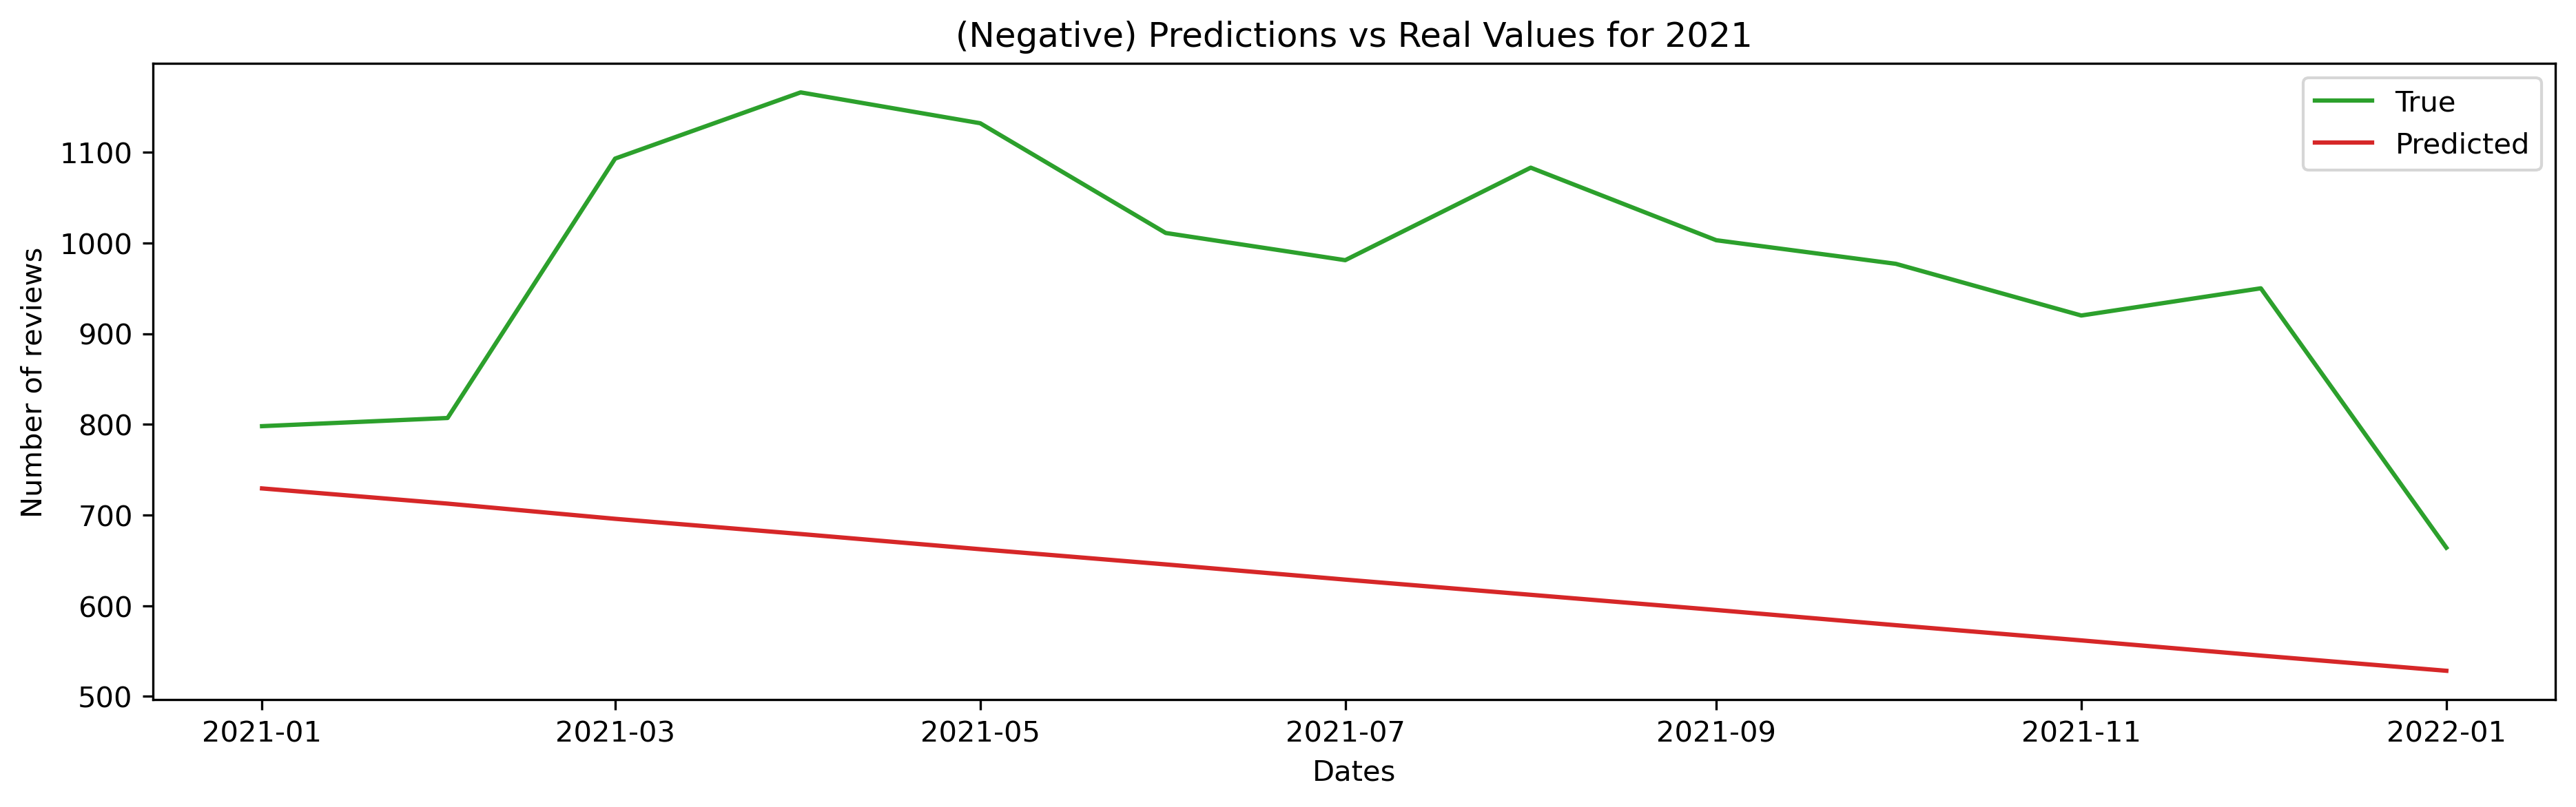

None

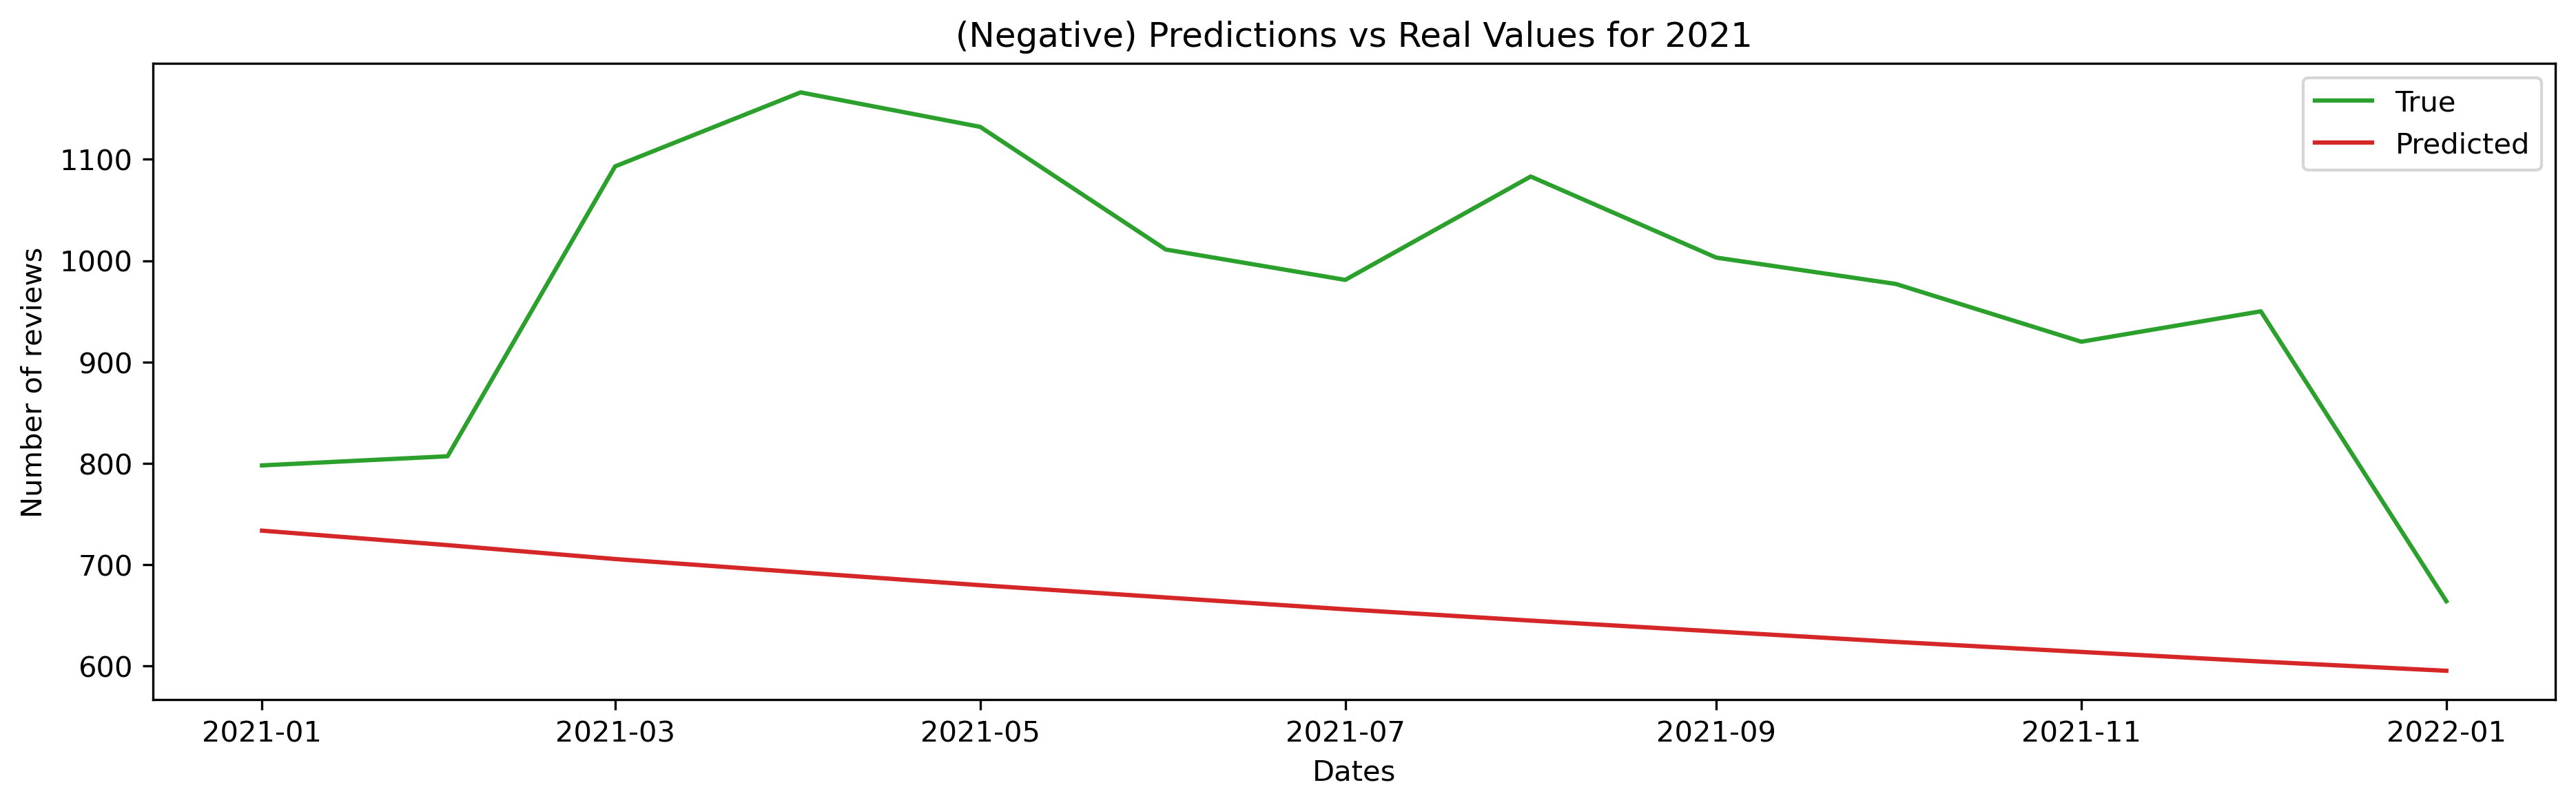

None

In [44]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_HoltWinters_Add_NotDamped_pos, 
                              title = '(Positive) Predictions vs Real Values for 2021 with Additive Holt-Winters Exponential Smoothing'))
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_HoltWinters_Add_Damped_pos, 
                              title = '(Positive) Predictions vs Real Values for 2021 with Additive Damped Holt-Winters Exponential Smoothing'))
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_HoltWinters_Multi_NotDamped_pos, 
                              title = '(Positive) Predictions vs Real Values for 2021 with Multiplicative Holt-Winters Exponential Smoothing'))
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_HoltWinters_Multi_Damped_pos, 
                              title = '(Positive) Predictions vs Real Values for 2021 with Multiplicative Damped Holt-Winters Exponential Smoothing'))

display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_HoltWinters_Add_NotDamped_neg, 
                              title = '(Negative) Predictions vs Real Values for 2021 with Additive Holt-Winters Exponential Smoothing'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_HoltWinters_Add_Damped_neg, 
                              title = '(Negative) Predictions vs Real Values for 2021 with Additive Damped Holt-Winters Exponential Smoothing'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_HoltWinters_Multi_NotDamped_neg, 
                              title = '(Negative) Predictions vs Real Values for 2021 with Multiplicative Holt-Winters Exponential Smoothing'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_HoltWinters_Multi_Damped_neg, 
                              title = '(Negative) Predictions vs Real Values for 2021 with Multiplicative Damped Holt-Winters Exponential Smoothing'))

## 4.3. ME - ARIMA

In [45]:
print('Positive Sentiment')
y_hat_ARIMA_pos = utils.EvaluateETS(arima_results_pos, y_true_pos)
print('\nNegative Sentiment')
y_hat_ARIMA_neg = utils.EvaluateETS(arima_results_neg, y_true_neg)

Positive Sentiment
RMSE: 308.04
MAE: 267.31
MAPE: 0.14

Negative Sentiment
RMSE: 255.96
MAE: 229.98
MAPE: 0.23


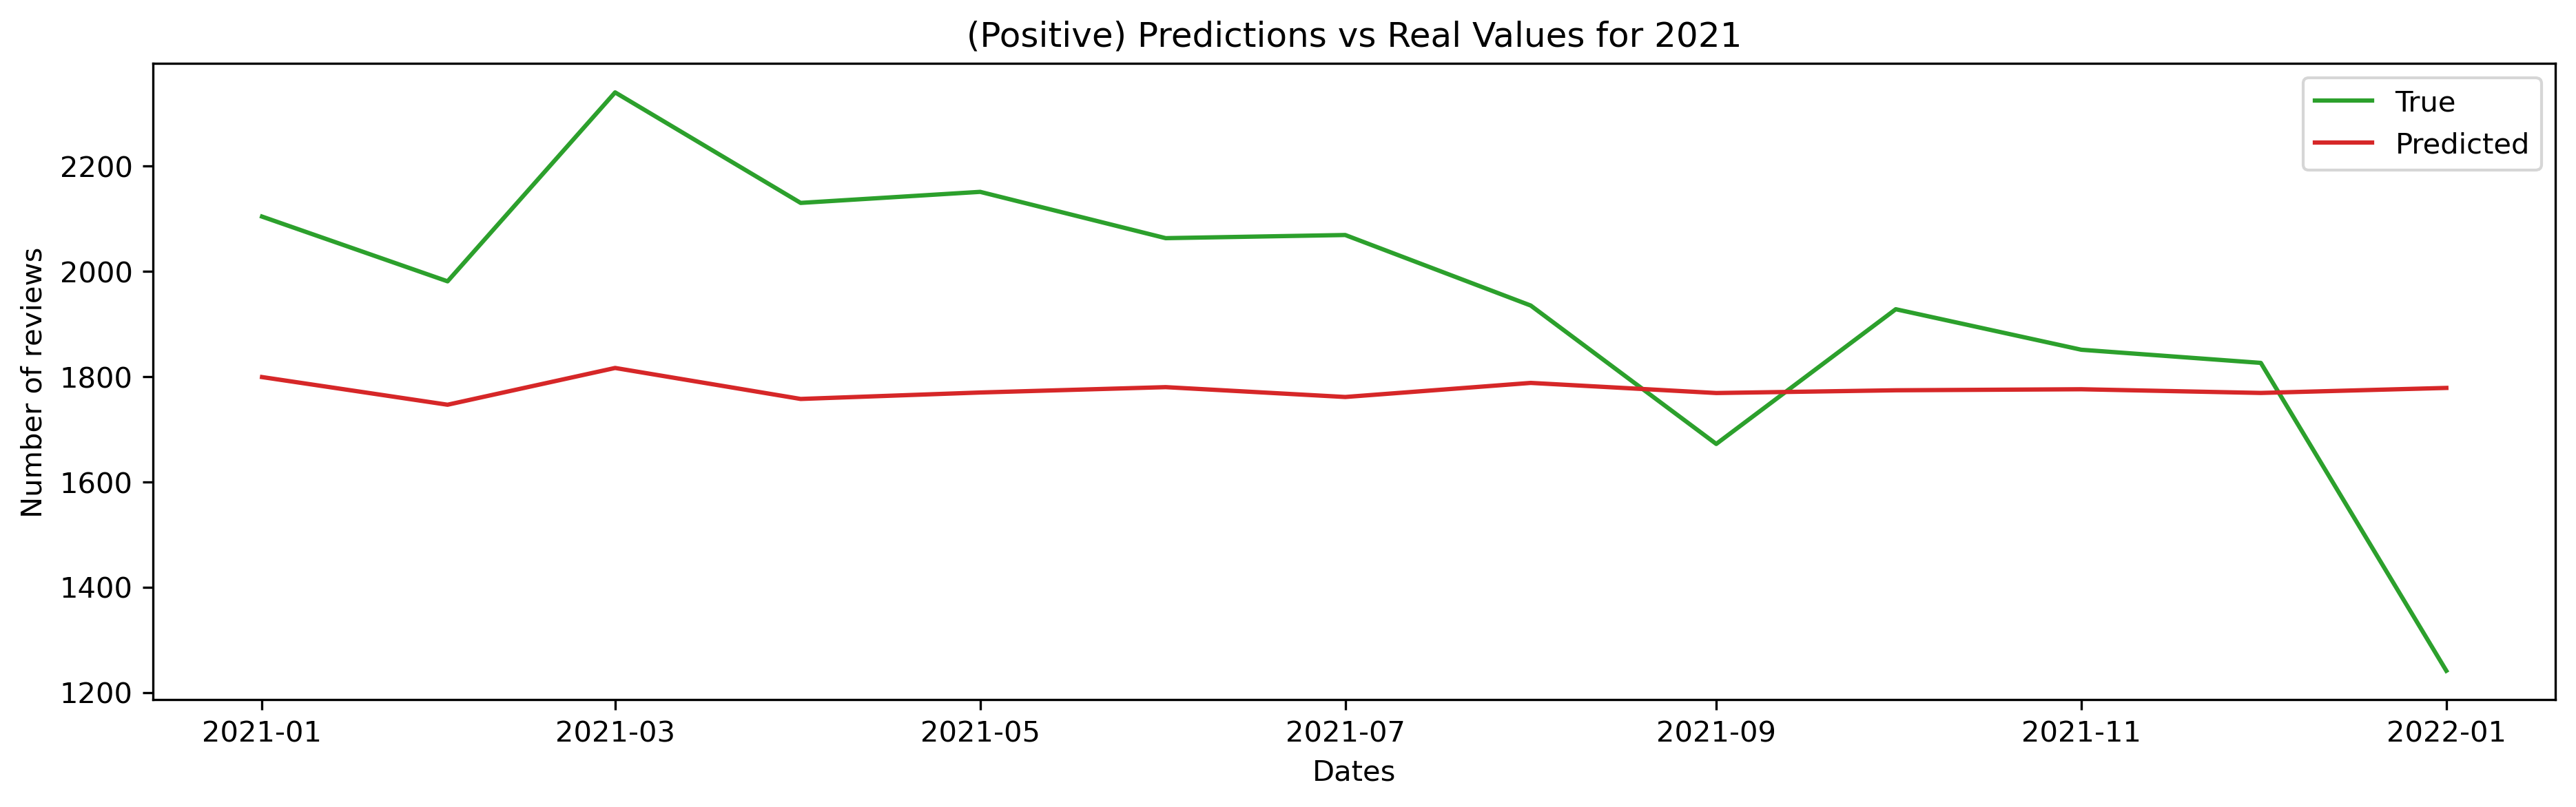

None

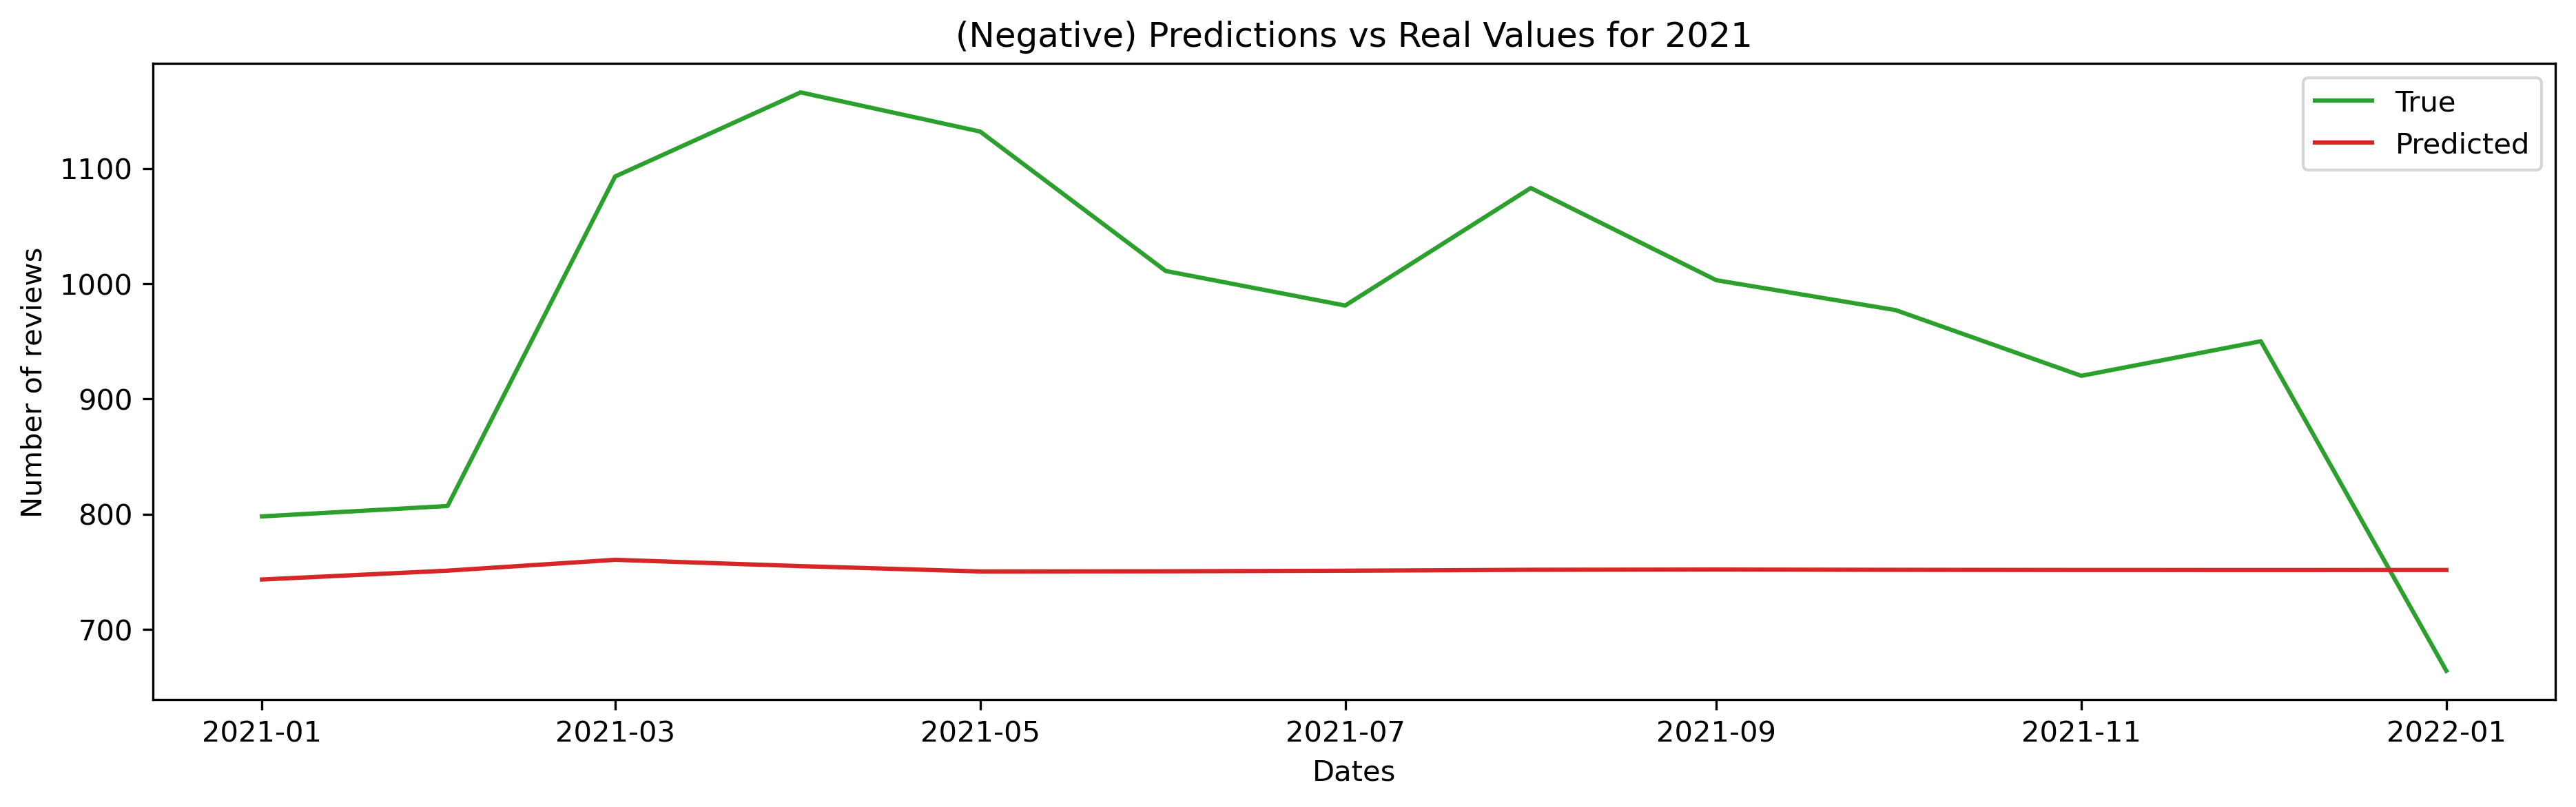

None

In [46]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_ARIMA_pos, title = '(Positive) Predictions vs Real Values for 2021'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_ARIMA_neg, title = '(Negative) Predictions vs Real Values for 2021'))

## 4.4. ME - Regression

In [47]:
X_test_pos, y_test_pos = pos_pp_reg_test.drop(columns=['review_id', 'date']), pos_pp_reg_test['review_id']
X_test_neg, y_test_neg = neg_pp_reg_test.drop(columns=['review_id', 'date']), neg_pp_reg_test['review_id']

X_test_pos = scaler_pos.transform(X_test_pos)
X_test_neg = scaler_neg.transform(X_test_neg)

In [48]:
print('Positive Sentiment')
y_hat_reg_pos = utils.EvaluateRegression(LineaRegression_pos, X_test_pos, y_true_pos)
print('\nNegative Sentiment')
y_hat_reg_neg = utils.EvaluateRegression(LineaRegression_neg, X_test_neg, y_true_neg)

Positive Sentiment
RMSE: 553.24
MAE: 456.60
MAPE: 0.24

Negative Sentiment
RMSE: 111.34
MAE: 69.02
MAPE: 0.08


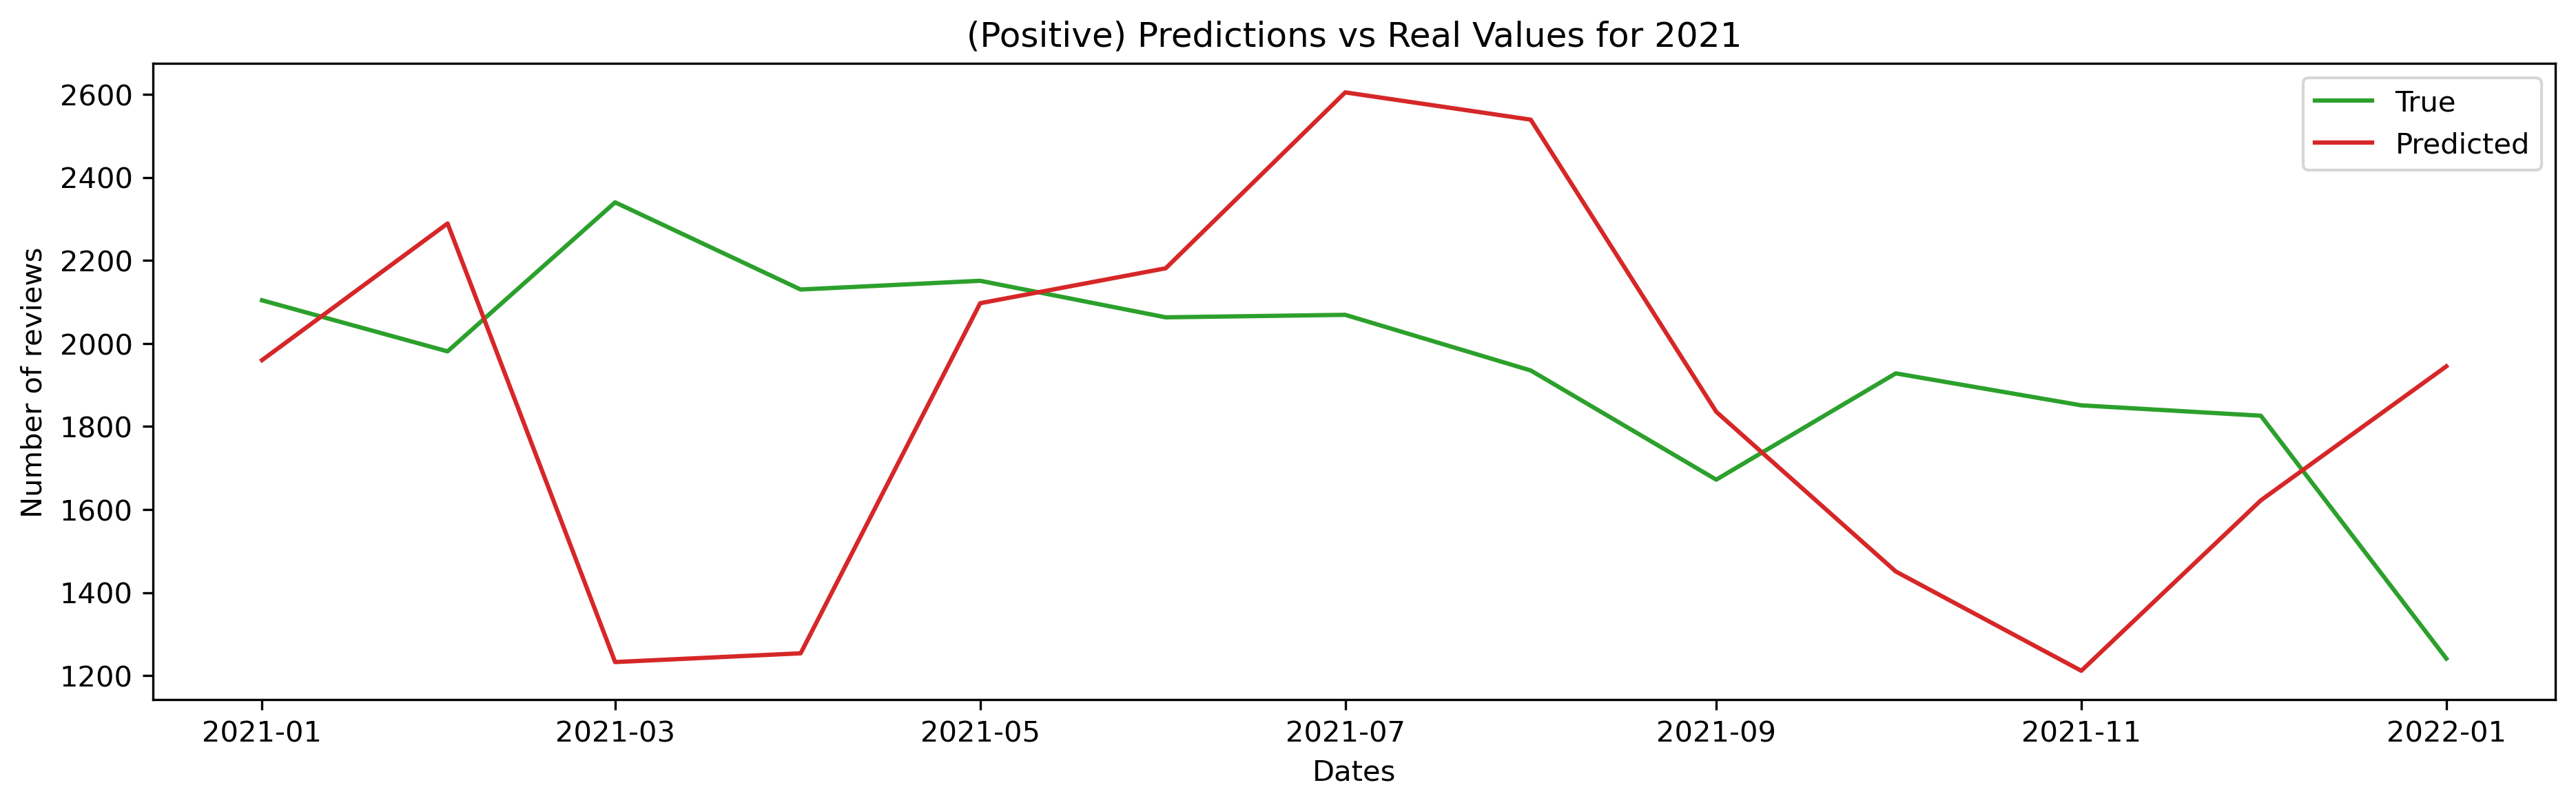

None

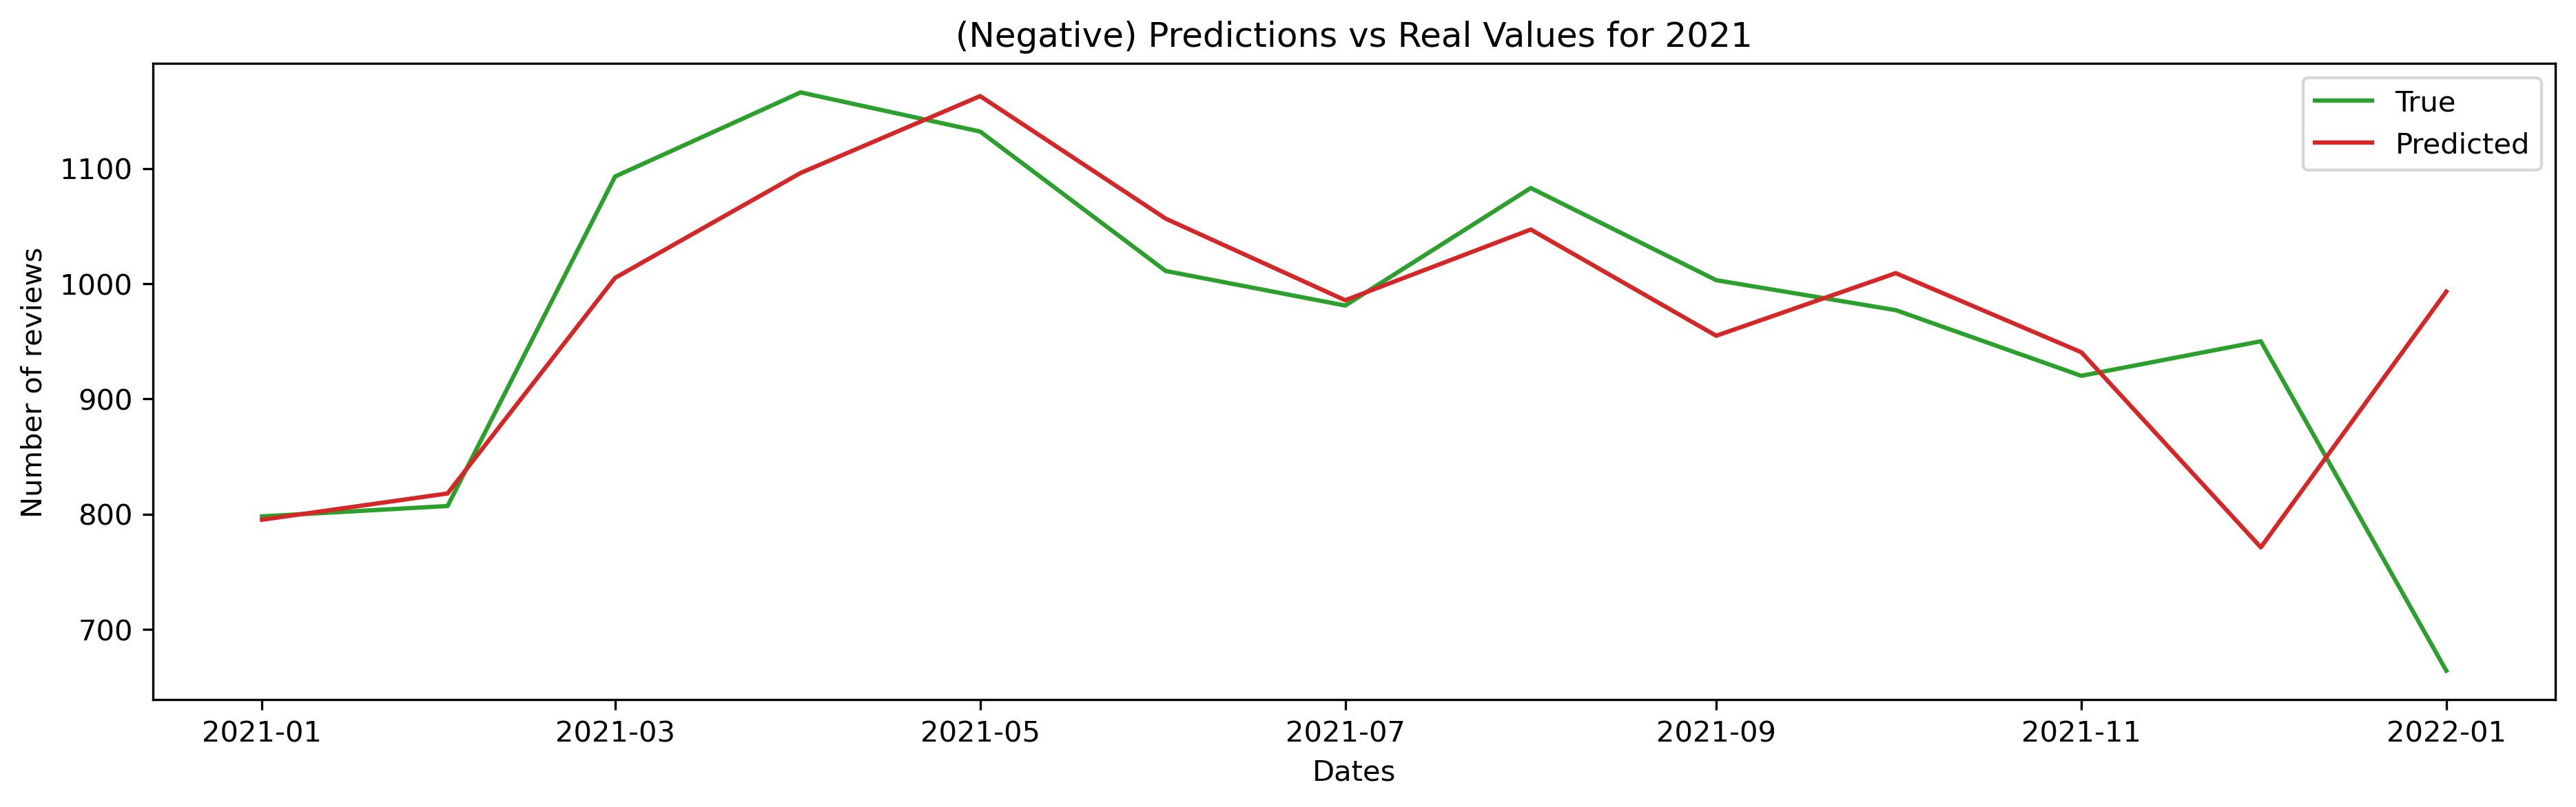

None

In [49]:
display(utils.PlotPredictions(pos_test['date'], y_true_pos, y_hat_reg_pos, title = '(Positive) Predictions vs Real Values for 2021'))
display(utils.PlotPredictions(neg_test['date'], y_true_neg, y_hat_reg_neg, title = '(Negative) Predictions vs Real Values for 2021'))